<a href="https://www.kaggle.com/code/dataranch/media-cost-feature-importance-28-models?scriptVersionId=106684008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Media Cost Dataset Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.
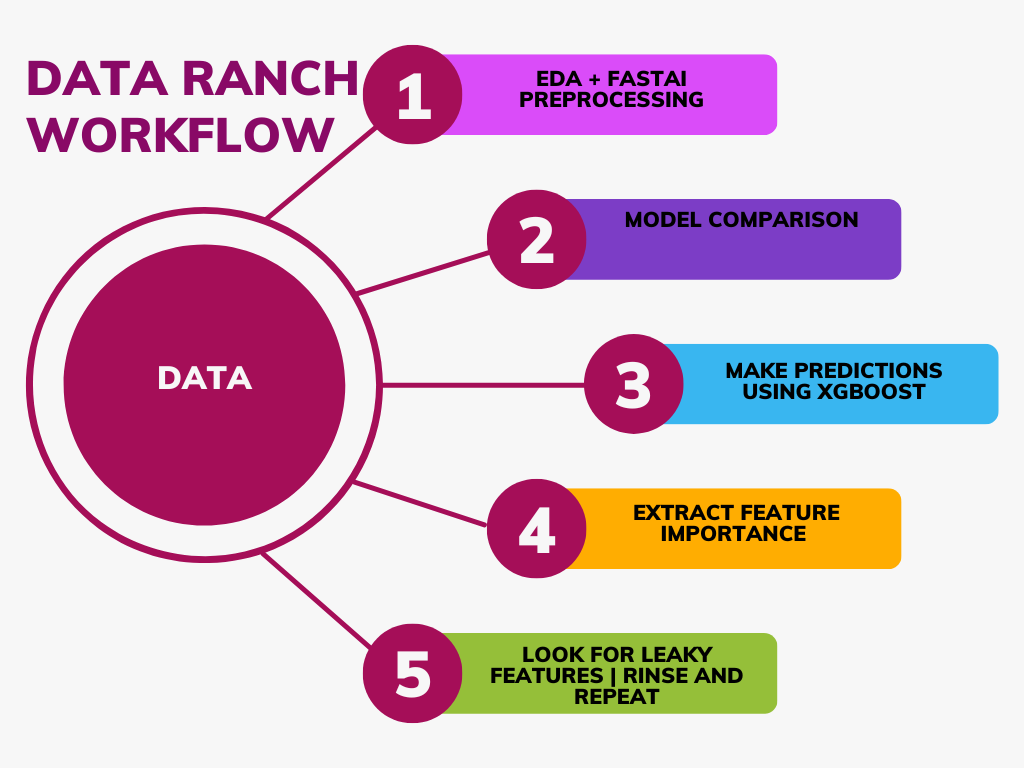

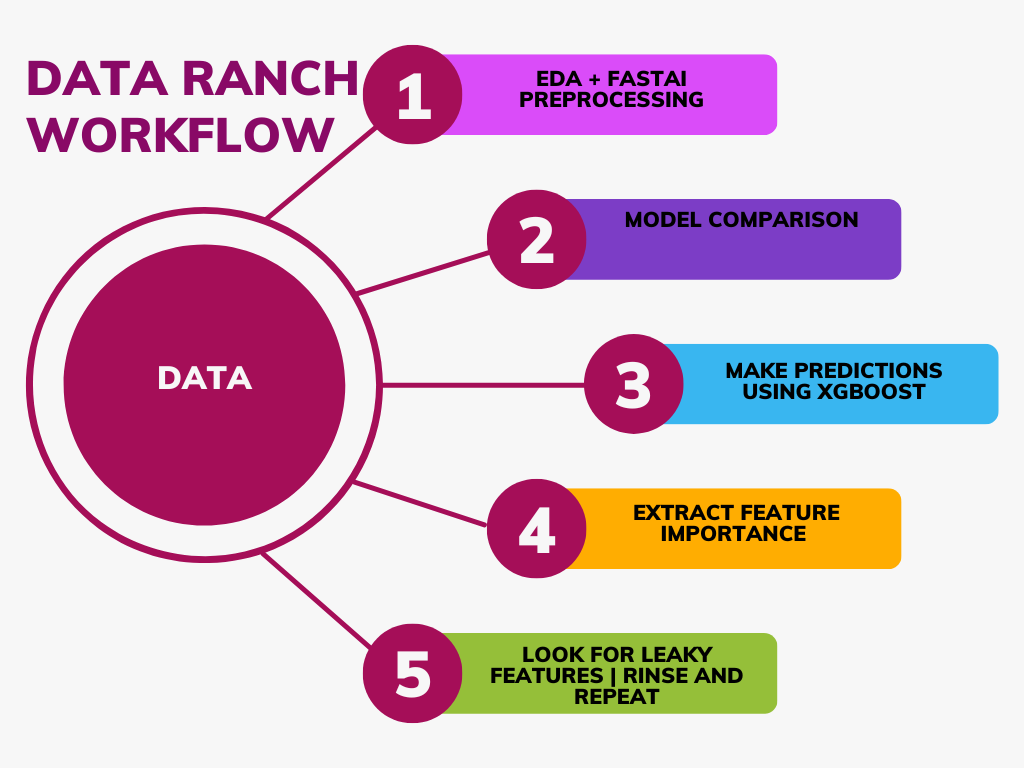

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 623.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x8

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is i

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 960.3 kB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'medias-cost-prediction-in-foodmart'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/medias-cost-prediction-in-foodmart
CSV!


In [9]:
df

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.72,4.00,Bag Stuffers,USA,M,F,...,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.59,3.00,Cash Register Lottery,USA,M,M,...,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.36,2.00,High Roller Savings,USA,S,F,...,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.18,2.00,Cash Register Lottery,USA,M,F,...,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.43,3.00,Double Down Sale,USA,M,M,...,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Specialty,Produce,Food,11.04,5.52,3.00,Best Savings,USA,S,F,...,13305.00,4746.00,3164.00,1.00,0.00,0.00,0.00,0.00,Street Handout,114.01
19996,Specialty,Produce,Food,14.72,6.77,4.00,Sales Galore,USA,S,F,...,13305.00,4746.00,3164.00,1.00,0.00,0.00,0.00,0.00,Bulk Mail,142.45
19997,Specialty,Produce,Food,8.44,2.70,4.00,Two Day Sale,USA,S,F,...,13305.00,4746.00,3164.00,1.00,0.00,0.00,0.00,0.00,Radio,91.28
19998,Specialty,Produce,Food,10.17,4.98,3.00,Unbeatable Price Savers,USA,M,F,...,13305.00,4746.00,3164.00,1.00,0.00,0.00,0.00,0.00,Bulk Mail,66.78


In [10]:
df.isna().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

<AxesSubplot:>

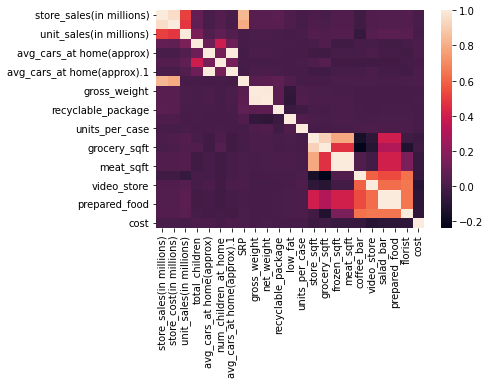

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.72,4.00,Bag Stuffers,USA,M,F,1.00,Partial High School,Normal,Skilled Manual,Y,1.00,$10K - $30K,1.00,1.00,Carrington,1.84,19.70,17.70,1.00,0.00,17.00,Deluxe Supermarket,Salem,OR,27694.00,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.59,3.00,Cash Register Lottery,USA,M,M,0.00,Bachelors Degree,Silver,Professional,Y,4.00,$50K - $70K,0.00,4.00,Carrington,1.84,19.70,17.70,1.00,0.00,17.00,Deluxe Supermarket,Salem,OR,27694.00,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.36,2.00,High Roller Savings,USA,S,F,4.00,Partial High School,Normal,Manual,N,1.00,$10K - $30K,0.00,1.00,Carrington,1.84,19.70,17.70,1.00,0.00,17.00,Deluxe Supermarket,Salem,OR,27694.00,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.18,2.00,Cash Register Lottery,USA,M,F,2.00,High School Degree,Bronze,Manual,Y,2.00,$30K - $50K,2.00,2.00,Carrington,1.84,19.70,17.70,1.00,0.00,17.00,Deluxe Supermarket,Salem,OR,27694.00,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.43,3.00,Double Down Sale,USA,M,M,0.00,Partial High School,Bronze,Skilled Manual,N,2.00,$30K - $50K,0.00,2.00,Golden,1.36,7.12,5.11,0.00,1.00,29.00,Deluxe Supermarket,Salem,OR,27694.00,18670.00,5415.00,3610.00,1.00,1.00,1.00,1.00,1.00,Radio,50.79


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),20000.00,6.57,3.44,0.51,3.87,5.91,8.76,19.80
store_cost(in millions),20000.00,2.63,1.44,0.18,1.52,2.39,3.51,9.28
unit_sales(in millions),20000.00,3.10,0.82,1.00,3.00,3.00,4.00,6.00
total_children,20000.00,2.55,1.49,0.00,1.00,3.00,4.00,5.00
avg_cars_at home(approx),20000.00,2.20,1.11,0.00,1.00,2.00,3.00,4.00
num_children_at_home,20000.00,0.82,1.31,0.00,0.00,0.00,1.00,5.00
avg_cars_at home(approx).1,20000.00,2.20,1.11,0.00,1.00,2.00,3.00,4.00
SRP,20000.00,2.12,0.92,0.50,1.39,2.14,2.81,3.97
gross_weight,20000.00,14.12,4.56,6.09,10.00,14.10,18.20,21.90
net_weight,20000.00,12.08,4.62,3.09,7.94,12.10,16.20,20.80


In [14]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

Target Variable: cost
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_family', 

  2%|▏         | 1/42 [00:00<00:26,  1.57it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.08588449886343796, 'Adjusted R-Squared': 0.07664867667463726, 'RMSE': 91.82851162454492, 'Time taken': 0.6372778415679932}


  5%|▍         | 2/42 [00:01<00:38,  1.04it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9965980132244193, 'Adjusted R-Squared': 0.9965636410417916, 'RMSE': 5.602002766868292, 'Time taken': 1.184257984161377}
{'Model': 'BayesianRidge', 'R-Squared': 0.024590524985484974, 'Adjusted R-Squared': 0.014735415361696091, 'RMSE': 94.85724203685133, 'Time taken': 0.0984346866607666}


 10%|▉         | 4/42 [00:02<00:17,  2.12it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9948047302186812, 'Adjusted R-Squared': 0.9947522394909083, 'RMSE': 6.922788455528596, 'Time taken': 0.2633059024810791}
{'Model': 'DummyRegressor', 'R-Squared': -2.5743114373755205e-05, 'Adjusted R-Squared': -0.010129564716943706, 'RMSE': 96.04673330421059, 'Time taken': 0.02771615982055664}
{'Model': 'ElasticNet', 'R-Squared': 0.020986631238005038, 'Adjusted R-Squared': 0.011095109452079477, 'RMSE': 95.03231, 'Time taken': 0.04327678680419922}


 19%|█▉        | 8/42 [00:03<00:10,  3.39it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.024621571684930954, 'Adjusted R-Squared': 0.014766775743379479, 'RMSE': 94.855736, 'Time taken': 0.6233806610107422}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9801516574426102, 'Adjusted R-Squared': 0.9799511184928008, 'RMSE': 13.531287817499116, 'Time taken': 0.1466965675354004}


 24%|██▍       | 10/42 [00:08<00:36,  1.15s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9955196773915921, 'Adjusted R-Squared': 0.9954744101765539, 'RMSE': 6.428825709256707, 'Time taken': 5.424989223480225}
{'Model': 'GammaRegressor', 'R-Squared': 0.01843791439147746, 'Adjusted R-Squared': 0.00852064148813303, 'RMSE': 95.1559382515753, 'Time taken': 0.1035311222076416}


 26%|██▌       | 11/42 [01:55<15:04, 29.18s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.6475730102249186, 'Adjusted R-Squared': -2.6844264884792746, 'RMSE': 183.4336489017748, 'Time taken': 107.36964082717896}


 29%|██▊       | 12/42 [01:56<10:37, 21.26s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.018659985200993545, 'Adjusted R-Squared': 0.008744956003731597, 'RMSE': 95.14517349614911, 'Time taken': 0.26614999771118164}


 31%|███       | 13/42 [02:01<08:02, 16.65s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5456665191714576, 'Adjusted R-Squared': 0.54107613290393, 'RMSE': 64.73876041714003, 'Time taken': 4.842300176620483}


 33%|███▎      | 14/42 [02:02<05:42, 12.25s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.972604358986671, 'Adjusted R-Squared': 0.9723275654427121, 'RMSE': 15.897093983727343, 'Time taken': 1.2949483394622803}


 36%|███▌      | 15/42 [02:03<04:00,  8.92s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.01601071309257318, 'Adjusted R-Squared': 0.0060689168116192516, 'RMSE': 95.27351614898888, 'Time taken': 0.7866475582122803}


 38%|███▊      | 16/42 [02:10<03:39,  8.42s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.03377918068353869, 'Adjusted R-Squared': 0.02401690920774735, 'RMSE': 94.40939270009102, 'Time taken': 7.225859880447388}


 43%|████▎     | 18/42 [02:36<03:48,  9.52s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.7231115698770987, 'Adjusted R-Squared': -2.7607282566149323, 'RMSE': 185.3233, 'Time taken': 25.511154413223267}
{'Model': 'Lars', 'R-Squared': -0.015516443652525025, 'Adjusted R-Squared': -0.02577677650074439, 'RMSE': 96.7877710490442, 'Time taken': 0.159318208694458}


 48%|████▊     | 20/42 [02:36<01:46,  4.83s/it]

{'Model': 'LarsCV', 'R-Squared': 0.024202705685981818, 'Adjusted R-Squared': 0.014343677706047386, 'RMSE': 94.87609761196472, 'Time taken': 0.41113758087158203}
{'Model': 'Lasso', 'R-Squared': 0.025313150827494968, 'Adjusted R-Squared': 0.015465342298346285, 'RMSE': 94.822105, 'Time taken': 0.15000677108764648}


 50%|█████     | 21/42 [02:37<01:19,  3.76s/it]

{'Model': 'LassoCV', 'R-Squared': 0.024949035372825668, 'Adjusted R-Squared': 0.015097547980785553, 'RMSE': 94.839806, 'Time taken': 1.2569379806518555}
{'Model': 'LassoLars', 'R-Squared': -2.574257269638558e-05, 'Adjusted R-Squared': -0.010129564169793603, 'RMSE': 96.04673327819809, 'Time taken': 0.054961442947387695}


 60%|█████▉    | 25/42 [02:38<00:22,  1.30s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.025469628966366065, 'Adjusted R-Squared': 0.015623401423717653, 'RMSE': 94.81448656916632, 'Time taken': 0.23918867111206055}
{'Model': 'LassoLarsIC', 'R-Squared': 0.025469628966366065, 'Adjusted R-Squared': 0.015623401423717653, 'RMSE': 94.81448656916632, 'Time taken': 0.0911092758178711}
{'Model': 'LinearRegression', 'R-Squared': 0.024459890263549222, 'Adjusted R-Squared': 0.01460346076381247, 'RMSE': 94.863594, 'Time taken': 0.08908486366271973}


 62%|██████▏   | 26/42 [02:38<00:16,  1.05s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.008706957137883276, 'Adjusted R-Squared': -0.018898489920281536, 'RMSE': 96.46272284671014, 'Time taken': 0.16290760040283203}


 64%|██████▍   | 27/42 [03:12<02:12,  8.85s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.24379414785068032, 'Adjusted R-Squared': 0.2361537755127231, 'RMSE': 83.52125768793866, 'Time taken': 33.5776743888855}


 71%|███████▏  | 30/42 [03:37<01:29,  7.50s/it]

{'Model': 'NuSVR', 'R-Squared': 0.025267271503589317, 'Adjusted R-Squared': 0.015418999429869684, 'RMSE': 94.82432998893745, 'Time taken': 24.72069478034973}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.02026840767577298, 'Adjusted R-Squared': 0.010369629273911718, 'RMSE': 95.06716975110511, 'Time taken': 0.03891444206237793}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.0236837724707033, 'Adjusted R-Squared': 0.01381950141711108, 'RMSE': 94.90132201802352, 'Time taken': 0.1379692554473877}


 74%|███████▍  | 31/42 [03:37<01:03,  5.80s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.3511419239670106, 'Adjusted R-Squared': -0.3647932694983771, 'RMSE': 111.64197051517809, 'Time taken': 0.15630340576171875}


 76%|███████▌  | 32/42 [03:37<00:44,  4.50s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.022053568507801824, 'Adjusted R-Squared': 0.012172826588204066, 'RMSE': 94.98051971012725, 'Time taken': 0.5551142692565918}


 79%|███████▊  | 33/42 [03:38<00:30,  3.44s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -1.546623772377064, 'Adjusted R-Squared': -1.5723537422924672, 'RMSE': 153.2708, 'Time taken': 0.4501636028289795}


 86%|████████▌ | 36/42 [03:50<00:19,  3.27s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9973378343490148, 'Adjusted R-Squared': 0.9973109369946225, 'RMSE': 4.955580624407195, 'Time taken': 11.912212610244751}
{'Model': 'Ridge', 'R-Squared': 0.024484859920085644, 'Adjusted R-Squared': 0.014628682702809481, 'RMSE': 94.86237, 'Time taken': 0.04815173149108887}
{'Model': 'RidgeCV', 'R-Squared': 0.024485448176990166, 'Adjusted R-Squared': 0.014629276903203814, 'RMSE': 94.86235118746539, 'Time taken': 0.13792872428894043}


 88%|████████▊ | 37/42 [03:50<00:12,  2.54s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.017632923180141202, 'Adjusted R-Squared': 0.007707516998581743, 'RMSE': 95.1949495359705, 'Time taken': 0.1964709758758545}


 90%|█████████ | 38/42 [04:14<00:32,  8.00s/it]

{'Model': 'SVR', 'R-Squared': 0.01682415169402196, 'Adjusted R-Squared': 0.00689057404000859, 'RMSE': 95.23412792595362, 'Time taken': 24.057159900665283}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.024459890263549222, 'Adjusted R-Squared': 0.01460346076381247, 'RMSE': 94.863594, 'Time taken': 0.05353736877441406}


 95%|█████████▌| 40/42 [04:14<00:09,  4.69s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.018659985200993545, 'Adjusted R-Squared': 0.008744956003731597, 'RMSE': 95.14517349614911, 'Time taken': 0.19037532806396484}


 98%|█████████▊| 41/42 [04:18<00:04,  4.44s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9963805391691596, 'Adjusted R-Squared': 0.9963439697240387, 'RMSE': 5.778285, 'Time taken': 3.5888662338256836}


100%|██████████| 42/42 [04:19<00:00,  6.17s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9733699043517272, 'Adjusted R-Squared': 0.9731008455424494, 'RMSE': 15.673405567607013, 'Time taken': 0.8149690628051758}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: cost
cost
Target Standard Deviation: 96.1633153383924
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RandomForestRegressor                        1.00       1.00   4.96   
BaggingRegressor                             1.00       1.00   5.60   
XGBRegressor                                 1.00       1.00   5.78   
ExtraTreesRegressor                          1.00       1.00   6.43   
DecisionTreeRegressor                        0.99       0.99   6.92   
ExtraTreeRegressor                           0.98       0.98  13.53   
LGBMRegressor                                0.97       0.97  15.67   
HistGradientBoostingRegressor                0.97       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,10264.679688,10699.033203,103.436127,00:13
1,8911.805664,8677.841797,93.154930,00:13
2,1070.953857,1861.067871,43.140099,00:12
3,1075.297241,1841.737427,42.915470,00:13
4,482.906677,963.728210,31.043970,00:13
5,508.146454,896.285828,29.938034,00:13
6,374.313171,631.807800,25.135784,00:13
7,331.071442,280.457092,16.746853,00:12
8,279.695221,111.687347,10.568222,00:13
9,227.214417,120.226303,10.964776,00:13


Better model found at epoch 0 with _rmse value: 103.43612670898438.
Better model found at epoch 1 with _rmse value: 93.1549301147461.
Better model found at epoch 2 with _rmse value: 43.140098571777344.
Better model found at epoch 3 with _rmse value: 42.915470123291016.
Better model found at epoch 4 with _rmse value: 31.043970108032227.
Better model found at epoch 5 with _rmse value: 29.938034057617188.
Better model found at epoch 6 with _rmse value: 25.135784149169922.
Better model found at epoch 7 with _rmse value: 16.74685287475586.
Better model found at epoch 8 with _rmse value: 10.568222045898438.
No improvement since epoch 8: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     288     288.12
1     150     153.10
2      35      34.71
3     209     206.05
4     125     127.59
XGBoost RMSE:  5.7787766


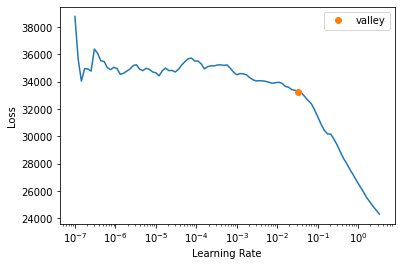

<Figure size 720x720 with 0 Axes>

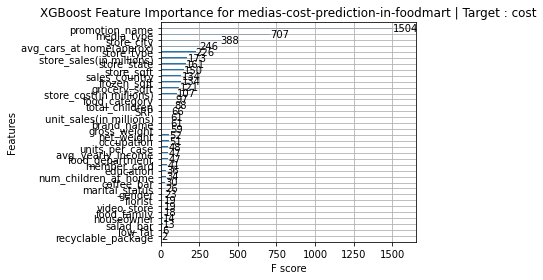

Target Variable: florist
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_family

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06634974479675293}


 10%|▉         | 4/42 [00:00<00:04,  8.87it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2231311798095703}
{'Model': 'BayesianRidge', 'R-Squared': 0.8572155490931537, 'Adjusted R-Squared': 0.8557729176113973, 'RMSE': 0.18729347725271456, 'Time taken': 0.08479595184326172}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09467196464538574}
{'Model': 'DummyRegressor', 'R-Squared': -5.348741779998001e-05, 'Adjusted R-Squared': -0.010157589336646122, 'RMSE': 0.4956713408348317, 'Time taken': 0.04621243476867676}
{'Model': 'ElasticNet', 'R-Squared': -5.3489902166914405e-05, 'Adjusted R-Squared': -0.010157591846113867, 'RMSE': 0.4956714, 'Time taken': 0.03792619705200195}


 17%|█▋        | 7/42 [00:01<00:07,  4.48it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8559877376246838, 'Adjusted R-Squared': 0.8545327008742386, 'RMSE': 0.18809703, 'Time taken': 0.8448367118835449}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07570481300354004}


 24%|██▍       | 10/42 [00:02<00:10,  2.95it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.2894396781921387}
{'Model': 'GammaRegressor', 'R-Squared': 0.6839541946011503, 'Adjusted R-Squared': 0.6807610063677696, 'RMSE': 0.27864882124299467, 'Time taken': 0.15400171279907227}


 29%|██▊       | 12/42 [01:51<09:11, 18.39s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -9.663308285025705, 'Adjusted R-Squared': -9.771045676134829, 'RMSE': 1.6185576675186746, 'Time taken': 108.09541630744934}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6863240063978826, 'Adjusted R-Squared': 0.6831547617037466, 'RMSE': 0.27760215682778444, 'Time taken': 0.1334676742553711}


 31%|███       | 13/42 [01:55<07:05, 14.69s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944544, 'Adjusted R-Squared': 0.9999999992873259, 'RMSE': 1.3165724201042649e-05, 'Time taken': 3.88668155670166}


 33%|███▎      | 14/42 [01:55<05:06, 10.94s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998891142101, 'Adjusted R-Squared': 0.9999998879938687, 'RMSE': 0.00016505175333788718, 'Time taken': 0.6492033004760742}


 36%|███▌      | 15/42 [01:57<03:45,  8.36s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8018998756502396, 'Adjusted R-Squared': 0.7998983588596383, 'RMSE': 0.2206096821733315, 'Time taken': 1.6015005111694336}


 38%|███▊      | 16/42 [02:03<03:20,  7.73s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.996662283369598, 'Adjusted R-Squared': 0.996628560544335, 'RMSE': 0.0286356421265527, 'Time taken': 6.12626314163208}


 43%|████▎     | 18/42 [02:29<03:41,  9.23s/it]

{'Model': 'KernelRidge', 'R-Squared': -9.165908698121406, 'Adjusted R-Squared': -9.268620581911467, 'RMSE': 1.5803573, 'Time taken': 25.949876070022583}
{'Model': 'Lars', 'R-Squared': 0.8510519005315185, 'Adjusted R-Squared': 0.8495469942474216, 'RMSE': 0.19129326418842332, 'Time taken': 0.11006426811218262}


 45%|████▌     | 19/42 [02:29<02:31,  6.61s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8150919057319327, 'Adjusted R-Squared': 0.8132236754286433, 'RMSE': 0.21313764172182278, 'Time taken': 0.301586389541626}
{'Model': 'Lasso', 'R-Squared': -5.3489902166914405e-05, 'Adjusted R-Squared': -0.010157591846113867, 'RMSE': 0.4956714, 'Time taken': 0.060512542724609375}


 50%|█████     | 21/42 [02:30<01:19,  3.81s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8565614423406124, 'Adjusted R-Squared': 0.8551122020510505, 'RMSE': 0.187722, 'Time taken': 0.8940615653991699}
{'Model': 'LassoLars', 'R-Squared': -5.348854353481869e-05, 'Adjusted R-Squared': -0.010157590473754752, 'RMSE': 0.49567134111381406, 'Time taken': 0.093536376953125}


 60%|█████▉    | 25/42 [02:31<00:26,  1.55s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8454507280622963, 'Adjusted R-Squared': 0.8438892299876541, 'RMSE': 0.19485684956528923, 'Time taken': 0.2559664249420166}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8454507280622963, 'Adjusted R-Squared': 0.8438892299876541, 'RMSE': 0.19485684956528923, 'Time taken': 0.08516836166381836}
{'Model': 'LinearRegression', 'R-Squared': 0.8572278814152589, 'Adjusted R-Squared': 0.8557853745338773, 'RMSE': 0.1872854, 'Time taken': 0.0829770565032959}


 62%|██████▏   | 26/42 [02:35<00:33,  2.07s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7397001456793122, 'Adjusted R-Squared': 0.7370701900913286, 'RMSE': 0.25288272191117117, 'Time taken': 4.079840421676636}


 64%|██████▍   | 27/42 [02:41<00:44,  2.99s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9908594151473126, 'Adjusted R-Squared': 0.9907670626860579, 'RMSE': 0.04738808809782397, 'Time taken': 6.140834331512451}


 67%|██████▋   | 28/42 [15:13<43:23, 185.96s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9980472186026187, 'Adjusted R-Squared': 0.9980274885556636, 'RMSE': 0.02190327266222111, 'Time taken': 751.7930698394775}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.794986510870161, 'Adjusted R-Squared': 0.7929151444732948, 'RMSE': 0.22442612627679598, 'Time taken': 0.06241202354431152}


 74%|███████▍  | 31/42 [15:13<15:31, 84.71s/it] 

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8015714216546544, 'Adjusted R-Squared': 0.7995665863089071, 'RMSE': 0.2207924940761423, 'Time taken': 0.14564037322998047}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7042628837153224, 'Adjusted R-Squared': 0.7012748855715015, 'RMSE': 0.2695473780876026, 'Time taken': 0.11297059059143066}


 76%|███████▌  | 32/42 [15:13<10:40, 64.00s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7097339648509061, 'Adjusted R-Squared': 0.7068012441118398, 'RMSE': 0.26704245088692685, 'Time taken': 0.14661192893981934}


 79%|███████▊  | 33/42 [15:14<07:07, 47.52s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [15:16<01:59, 19.90s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.8687677383422852}
{'Model': 'Ridge', 'R-Squared': 0.8572106472899536, 'Adjusted R-Squared': 0.855767966282527, 'RMSE': 0.1872967, 'Time taken': 0.05602145195007324}
{'Model': 'RidgeCV', 'R-Squared': 0.8572259898473781, 'Adjusted R-Squared': 0.855783463854424, 'RMSE': 0.18728662944505695, 'Time taken': 0.12135791778564453}


 88%|████████▊ | 37/42 [15:16<01:16, 15.21s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8414093253889414, 'Adjusted R-Squared': 0.8398069947538209, 'RMSE': 0.1973881233876645, 'Time taken': 0.1429908275604248}


 95%|█████████▌| 40/42 [15:20<00:14,  7.14s/it]

{'Model': 'SVR', 'R-Squared': 0.9838849843788098, 'Adjusted R-Squared': 0.9837221653273202, 'RMSE': 0.06292128165874143, 'Time taken': 3.4538795948028564}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8572278814152589, 'Adjusted R-Squared': 0.8557853745338773, 'RMSE': 0.1872854, 'Time taken': 0.054215192794799805}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6863240063978826, 'Adjusted R-Squared': 0.6831547617037466, 'RMSE': 0.27760215682778444, 'Time taken': 0.13832759857177734}


 98%|█████████▊| 41/42 [15:21<00:05,  5.81s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999999259274, 'Adjusted R-Squared': 0.99999999925179, 'RMSE': 1.348997e-05, 'Time taken': 1.3610072135925293}


100%|██████████| 42/42 [15:21<00:00, 21.95s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944544, 'Adjusted R-Squared': 0.9999999992873259, 'RMSE': 1.3165723918728341e-05, 'Time taken': 0.45157623291015625}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: florist
florist
Target Standard Deviation: 0.4951637197685226
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
ExtraTreeRegressor                           1.00       1.00  0.00        0.08
RandomForestRegressor                        1.00       1.00  0.00        1.87
DecisionTreeRegressor                        1.00       1.00  0.00        0.09
BaggingRegressor                             1.00       1.00  0.00        0.22
ExtraTreesRegressor                          1.00       1.00  0.00        1.29
GradientBoostingRegressor                    1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.557833,0.353828,0.594834,00:13
1,0.093058,0.057086,0.238928,00:12
2,0.025573,0.030160,0.173667,00:13
3,0.012354,0.019256,0.138767,00:12
4,0.008520,0.001837,0.042861,00:13
5,0.001716,0.000402,0.020051,00:13
6,0.002594,0.000039,0.006214,00:13
7,0.001279,0.000826,0.028741,00:13


Better model found at epoch 0 with _rmse value: 0.5948339700698853.
Better model found at epoch 1 with _rmse value: 0.23892763257026672.
Better model found at epoch 2 with _rmse value: 0.17366662621498108.
Better model found at epoch 3 with _rmse value: 0.1387666016817093.
Better model found at epoch 4 with _rmse value: 0.042861465364694595.
Better model found at epoch 5 with _rmse value: 0.02005096897482872.
Better model found at epoch 6 with _rmse value: 0.006214129738509655.
No improvement since epoch 6: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       1       1.00
2       2       2.00
3       2       2.00
4       2       2.00
XGBoost RMSE:  1.348997e-05


<Figure size 432x288 with 0 Axes>

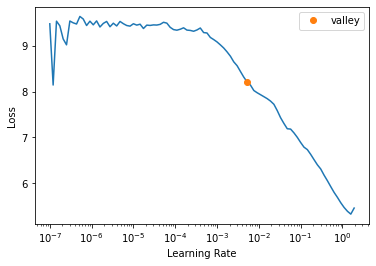

<Figure size 720x720 with 0 Axes>

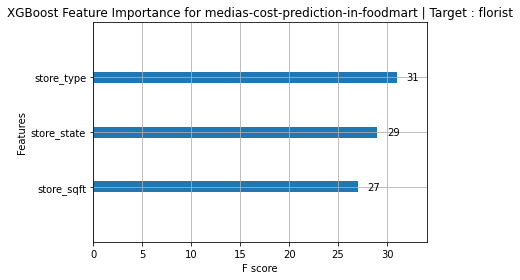

Target Variable: prepared_food
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_

  5%|▍         | 2/42 [00:00<00:04,  8.90it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05761218070983887}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1668870449066162}


 10%|▉         | 4/42 [00:00<00:03, 10.63it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999999977701914, 'Adjusted R-Squared': 0.9999999977476625, 'RMSE': 2.3209512598211552e-05, 'Time taken': 0.08237171173095703}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07847023010253906}
{'Model': 'DummyRegressor', 'R-Squared': -4.672974568409316e-06, 'Adjusted R-Squared': -0.01010828169368505, 'RMSE': 0.4915110033419903, 'Time taken': 0.047246694564819336}
{'Model': 'ElasticNet', 'R-Squared': -4.649510269461032e-06, 'Adjusted R-Squared': -0.010108257992313074, 'RMSE': 0.49151096, 'Time taken': 0.03736424446105957}


 19%|█▉        | 8/42 [00:00<00:04,  7.79it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999976716078344, 'Adjusted R-Squared': 0.9999976480827809, 'RMSE': 0.00074999826, 'Time taken': 0.4112095832824707}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10453152656555176}


 24%|██▍       | 10/42 [00:01<00:06,  4.75it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.6278612613677979}
{'Model': 'GammaRegressor', 'R-Squared': 0.8316641708912965, 'Adjusted R-Squared': 0.8299633794883291, 'RMSE': 0.20166034748246736, 'Time taken': 0.10588526725769043}


 29%|██▊       | 12/42 [01:51<10:29, 20.98s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -10.173467767031294, 'Adjusted R-Squared': -10.28635958584444, 'RMSE': 1.6429570876176949, 'Time taken': 109.42041659355164}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8398375318294847, 'Adjusted R-Squared': 0.8382193204814623, 'RMSE': 0.19670373503168453, 'Time taken': 0.14210033416748047}


 31%|███       | 13/42 [01:54<07:44, 16.01s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944888, 'Adjusted R-Squared': 0.9999999992873606, 'RMSE': 1.3055219817353386e-05, 'Time taken': 3.2182717323303223}


 33%|███▎      | 14/42 [01:54<05:23, 11.56s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998891088862, 'Adjusted R-Squared': 0.9999998879884909, 'RMSE': 0.00016367434172984374, 'Time taken': 0.42560243606567383}


 36%|███▌      | 15/42 [01:57<03:58,  8.82s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999999694230681, 'Adjusted R-Squared': 0.9999999691141322, 'RMSE': 8.594669529993676e-05, 'Time taken': 2.086705207824707}


 38%|███▊      | 16/42 [02:03<03:29,  8.07s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9917212353676069, 'Adjusted R-Squared': 0.9916375903599546, 'RMSE': 0.04472135954999579, 'Time taken': 6.2719316482543945}


 40%|████      | 17/42 [02:29<05:35, 13.41s/it]

{'Model': 'KernelRidge', 'R-Squared': -9.50713331902216, 'Adjusted R-Squared': -9.61329278675666, 'RMSE': 1.5932149, 'Time taken': 26.1844322681427}
{'Model': 'Lars', 'R-Squared': 0.9999999999999812, 'Adjusted R-Squared': 0.999999999999981, 'RMSE': 6.729691395571648e-08, 'Time taken': 0.09296226501464844}


 45%|████▌     | 19/42 [02:29<02:48,  7.33s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999999999999812, 'Adjusted R-Squared': 0.999999999999981, 'RMSE': 6.729691395571648e-08, 'Time taken': 0.14368534088134766}
{'Model': 'Lasso', 'R-Squared': -4.649510269461032e-06, 'Adjusted R-Squared': -0.010108257992313074, 'RMSE': 0.49151096, 'Time taken': 0.05868673324584961}


 52%|█████▏    | 22/42 [02:30<01:11,  3.57s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999989975161926, 'Adjusted R-Squared': 0.9999989873875358, 'RMSE': 0.00049211987, 'Time taken': 0.44345641136169434}
{'Model': 'LassoLars', 'R-Squared': -4.673310122216279e-06, 'Adjusted R-Squared': -0.010108282032629035, 'RMSE': 0.49151100342445414, 'Time taken': 0.11467289924621582}


 60%|█████▉    | 25/42 [02:30<00:28,  1.66s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999999999999812, 'Adjusted R-Squared': 0.999999999999981, 'RMSE': 6.729691395571648e-08, 'Time taken': 0.1371908187866211}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999999999999812, 'Adjusted R-Squared': 0.999999999999981, 'RMSE': 6.729691395571648e-08, 'Time taken': 0.063018798828125}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999998083, 'Adjusted R-Squared': 0.9999999999998064, 'RMSE': 2.1520908e-07, 'Time taken': 0.06558775901794434}


 62%|██████▏   | 26/42 [02:30<00:21,  1.32s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999999707, 'Adjusted R-Squared': 0.9999999999999704, 'RMSE': 8.413256812738894e-08, 'Time taken': 0.15278315544128418}


 64%|██████▍   | 27/42 [02:36<00:34,  2.28s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9889084239160583, 'Adjusted R-Squared': 0.988796359494902, 'RMSE': 0.05176412309976196, 'Time taken': 5.271633625030518}


 67%|██████▋   | 28/42 [14:20<42:45, 183.24s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9987003462003213, 'Adjusted R-Squared': 0.9986872150682206, 'RMSE': 0.017719279979886537, 'Time taken': 704.3315596580505}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999999999976243, 'Adjusted R-Squared': 0.9999999999976004, 'RMSE': 7.575670256243325e-07, 'Time taken': 0.06394076347351074}


 74%|███████▍  | 31/42 [14:20<14:51, 81.07s/it] 

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999999999976243, 'Adjusted R-Squared': 0.9999999999976004, 'RMSE': 7.575670256243325e-07, 'Time taken': 0.1623680591583252}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.990518609723326, 'Adjusted R-Squared': 0.9904228139135086, 'RMSE': 0.047859509329208336, 'Time taken': 0.15187788009643555}


 76%|███████▌  | 32/42 [14:20<10:08, 60.89s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8698624486596787, 'Adjusted R-Squared': 0.8685475959055455, 'RMSE': 0.17731012885422126, 'Time taken': 0.13067841529846191}


 79%|███████▊  | 33/42 [14:21<06:45, 45.05s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [14:23<01:51, 18.65s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.377018928527832}
{'Model': 'Ridge', 'R-Squared': 0.9999999846736081, 'Adjusted R-Squared': 0.9999999845187569, 'RMSE': 6.0848823e-05, 'Time taken': 0.03680682182312012}
{'Model': 'RidgeCV', 'R-Squared': 0.9999999998314264, 'Adjusted R-Squared': 0.9999999998297232, 'RMSE': 6.381562108395185e-06, 'Time taken': 0.11103653907775879}


 88%|████████▊ | 37/42 [14:23<01:11, 14.25s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9999949548363818, 'Adjusted R-Squared': 0.9999949038622609, 'RMSE': 0.0011040019936049542, 'Time taken': 0.15189838409423828}


 95%|█████████▌| 40/42 [14:25<00:13,  6.56s/it]

{'Model': 'SVR', 'R-Squared': 0.9855543671698218, 'Adjusted R-Squared': 0.9854084148300373, 'RMSE': 0.05907456277898353, 'Time taken': 2.533406972885132}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999998083, 'Adjusted R-Squared': 0.9999999999998064, 'RMSE': 2.1520908e-07, 'Time taken': 0.04889678955078125}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8398375318294847, 'Adjusted R-Squared': 0.8382193204814623, 'RMSE': 0.19670373503168453, 'Time taken': 0.09389781951904297}


 98%|█████████▊| 41/42 [14:27<00:05,  5.32s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999996310925, 'Adjusted R-Squared': 0.9999999996273653, 'RMSE': 9.440412e-06, 'Time taken': 1.1662952899932861}


100%|██████████| 42/42 [14:27<00:00, 20.65s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944888, 'Adjusted R-Squared': 0.9999999992873606, 'RMSE': 1.3055219536467465e-05, 'Time taken': 0.3996925354003906}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: prepared_food
prepared_food
Target Standard Deviation: 0.4913103294698271
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.06
RandomForestRegressor                        1.00       1.00  0.00        1.38
BaggingRegressor                             1.00       1.00  0.00        0.17
ExtraTreeRegressor                           1.00       1.00  0.00        0.10
ExtraTreesRegressor                          1.00       1.00  0.00        0.63
DecisionTreeRegressor                        1.00       1.00  0.00        0.08
Lars                                   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.394652,0.270486,0.520083,00:13
1,0.058519,0.095020,0.308254,00:13
2,0.020900,0.040411,0.201026,00:13
3,0.010643,0.002441,0.049402,00:13
4,0.005221,0.008718,0.093368,00:13


Better model found at epoch 0 with _rmse value: 0.5200830698013306.
Better model found at epoch 1 with _rmse value: 0.3082539439201355.
Better model found at epoch 2 with _rmse value: 0.20102600753307343.
Better model found at epoch 3 with _rmse value: 0.049401529133319855.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       2       2.00
2       2       2.00
3       2       2.00
4       1       1.00
XGBoost RMSE:  9.440412e-06


<Figure size 432x288 with 0 Axes>

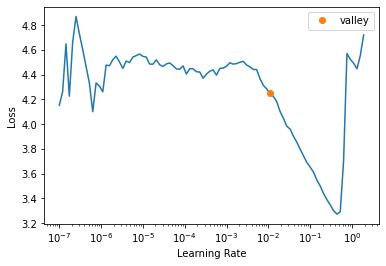

<Figure size 720x720 with 0 Axes>

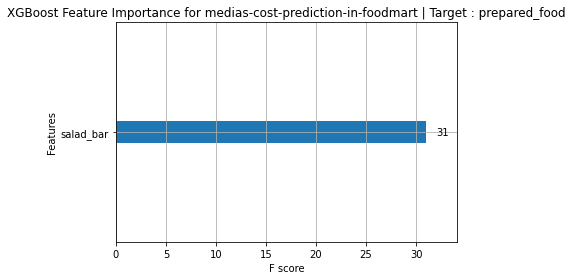

Target Variable: salad_bar
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_fami

  5%|▍         | 2/42 [00:00<00:04,  9.33it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.053534746170043945}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16064953804016113}


 10%|▉         | 4/42 [00:00<00:04,  9.00it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999999961146384, 'Adjusted R-Squared': 0.9999999960753824, 'RMSE': 3.0501154946321305e-05, 'Time taken': 0.08583831787109375}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14060163497924805}
{'Model': 'DummyRegressor', 'R-Squared': -0.0006722812293873393, 'Adjusted R-Squared': -0.0107826351695679, 'RMSE': 0.4894930133885978, 'Time taken': 0.028702974319458008}
{'Model': 'ElasticNet', 'R-Squared': -0.000672304575256577, 'Adjusted R-Squared': -0.010782658751313567, 'RMSE': 0.48949307, 'Time taken': 0.038065195083618164}


 19%|█▉        | 8/42 [00:01<00:05,  5.90it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999977032155468, 'Adjusted R-Squared': 0.9999976800098438, 'RMSE': 0.00074158463, 'Time taken': 0.6262359619140625}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13021278381347656}


 24%|██▍       | 10/42 [00:02<00:09,  3.39it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9101970195770264}
{'Model': 'GammaRegressor', 'R-Squared': 0.8351236891998498, 'Adjusted R-Squared': 0.8334578512528921, 'RMSE': 0.19869168514056024, 'Time taken': 0.14906620979309082}


 29%|██▊       | 12/42 [01:51<10:29, 20.97s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -10.390108369143219, 'Adjusted R-Squared': -10.505189029604377, 'RMSE': 1.6514464300414962, 'Time taken': 109.10417342185974}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8458652733221308, 'Adjusted R-Squared': 0.8443079636310182, 'RMSE': 0.19211037103484363, 'Time taken': 0.14629387855529785}


 31%|███       | 13/42 [01:54<07:42, 15.96s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992940178, 'Adjusted R-Squared': 0.9999999992868849, 'RMSE': 1.3001619181204577e-05, 'Time taken': 3.053351402282715}


 33%|███▎      | 14/42 [01:55<05:22, 11.52s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998890197889, 'Adjusted R-Squared': 0.9999998878984935, 'RMSE': 0.00016301341132042959, 'Time taken': 0.4253416061401367}


 36%|███▌      | 15/42 [01:56<03:55,  8.72s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999999059231833, 'Adjusted R-Squared': 0.9999999049726724, 'RMSE': 0.00015008658266424805, 'Time taken': 1.8640108108520508}


 38%|███▊      | 16/42 [02:03<03:27,  7.99s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9940277921702998, 'Adjusted R-Squared': 0.9939674516011692, 'RMSE': 0.03781534080237806, 'Time taken': 6.218076467514038}


 43%|████▎     | 18/42 [02:28<03:43,  9.33s/it]

{'Model': 'KernelRidge', 'R-Squared': -9.624230683362885, 'Adjusted R-Squared': -9.731573251520125, 'RMSE': 1.5949582, 'Time taken': 25.693763732910156}
{'Model': 'Lars', 'R-Squared': 0.9999999993676556, 'Adjusted R-Squared': 0.9999999993612667, 'RMSE': 1.2304880697097414e-05, 'Time taken': 0.11371874809265137}


 48%|████▊     | 20/42 [02:29<01:43,  4.69s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999999993676556, 'Adjusted R-Squared': 0.9999999993612667, 'RMSE': 1.2304880697097414e-05, 'Time taken': 0.2479403018951416}
{'Model': 'Lasso', 'R-Squared': -0.000672304575256577, 'Adjusted R-Squared': -0.010782658751313567, 'RMSE': 0.48949307, 'Time taken': 0.1079251766204834}


 52%|█████▏    | 22/42 [02:30<00:49,  2.45s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999990061423436, 'Adjusted R-Squared': 0.9999989961008416, 'RMSE': 0.00048782345, 'Time taken': 0.5489370822906494}
{'Model': 'LassoLars', 'R-Squared': -0.0006722813304533837, 'Adjusted R-Squared': -0.010782635271655128, 'RMSE': 0.48949301341331675, 'Time taken': 0.11713123321533203}


 60%|█████▉    | 25/42 [02:30<00:16,  1.01it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999999993676556, 'Adjusted R-Squared': 0.9999999993612667, 'RMSE': 1.2304880697097414e-05, 'Time taken': 0.13907361030578613}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999999993676556, 'Adjusted R-Squared': 0.9999999993612667, 'RMSE': 1.2304880697097414e-05, 'Time taken': 0.07015538215637207}
{'Model': 'LinearRegression', 'R-Squared': 0.999999999999536, 'Adjusted R-Squared': 0.9999999999995314, 'RMSE': 3.3331736e-07, 'Time taken': 0.0954885482788086}


 62%|██████▏   | 26/42 [02:30<00:12,  1.27it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999999458, 'Adjusted R-Squared': 0.9999999999999453, 'RMSE': 1.1384537635203358e-07, 'Time taken': 0.15758395195007324}


 64%|██████▍   | 27/42 [02:35<00:29,  1.94s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9883341837412396, 'Adjusted R-Squared': 0.9882163174491582, 'RMSE': 0.052851598655336174, 'Time taken': 5.213285207748413}


 69%|██████▉   | 29/42 [14:13<29:49, 137.62s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9988509283053957, 'Adjusted R-Squared': 0.9988393185888551, 'RMSE': 0.0165872398975331, 'Time taken': 697.412132024765}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999999999660691, 'Adjusted R-Squared': 0.9999999999657263, 'RMSE': 2.8503470424756126e-06, 'Time taken': 0.09897661209106445}


 74%|███████▍  | 31/42 [14:13<12:49, 69.91s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999999999660691, 'Adjusted R-Squared': 0.9999999999657263, 'RMSE': 2.8503470424756126e-06, 'Time taken': 0.14377284049987793}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9903980188617773, 'Adjusted R-Squared': 0.9903010046547732, 'RMSE': 0.04794915816325752, 'Time taken': 0.15325593948364258}


 76%|███████▌  | 32/42 [14:13<08:14, 49.50s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8738008024646986, 'Adjusted R-Squared': 0.8725257411104648, 'RMSE': 0.17383165266543532, 'Time taken': 0.1585245132446289}


 79%|███████▊  | 33/42 [14:14<05:15, 35.02s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [14:15<01:21, 13.59s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.2900354862213135}
{'Model': 'Ridge', 'R-Squared': 0.9999999857175154, 'Adjusted R-Squared': 0.9999999855732113, 'RMSE': 5.8479338e-05, 'Time taken': 0.039934396743774414}
{'Model': 'RidgeCV', 'R-Squared': 0.9999999998338945, 'Adjusted R-Squared': 0.9999999998322163, 'RMSE': 6.306560471498943e-06, 'Time taken': 0.10896134376525879}


 88%|████████▊ | 37/42 [14:15<00:51, 10.27s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9999934821768227, 'Adjusted R-Squared': 0.9999934163235954, 'RMSE': 0.0012492571667893726, 'Time taken': 0.1511228084564209}


 95%|█████████▌| 40/42 [14:18<00:09,  4.75s/it]

{'Model': 'SVR', 'R-Squared': 0.986711201919198, 'Adjusted R-Squared': 0.9865769377304554, 'RMSE': 0.05640835225312411, 'Time taken': 2.42219877243042}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.999999999999536, 'Adjusted R-Squared': 0.9999999999995314, 'RMSE': 3.3331736e-07, 'Time taken': 0.04654955863952637}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8458652733221308, 'Adjusted R-Squared': 0.8443079636310182, 'RMSE': 0.19211037103484363, 'Time taken': 0.10482287406921387}


 98%|█████████▊| 41/42 [14:19<00:03,  3.91s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.99999999963281, 'Adjusted R-Squared': 0.9999999996291001, 'RMSE': 9.376612e-06, 'Time taken': 1.1503918170928955}


100%|██████████| 42/42 [14:19<00:00, 20.47s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992940178, 'Adjusted R-Squared': 0.9999999992868849, 'RMSE': 1.3001619177830938e-05, 'Time taken': 0.3841543197631836}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: salad_bar
salad_bar
Target Standard Deviation: 0.49182186418839696
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.05
RandomForestRegressor                        1.00       1.00  0.00        1.29
BaggingRegressor                             1.00       1.00  0.00        0.16
ExtraTreeRegressor                           1.00       1.00  0.00        0.13
ExtraTreesRegressor                          1.00       1.00  0.00        0.91
DecisionTreeRegressor                        1.00       1.00  0.00        0.14
LinearSVR                                    1

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.458722,0.335501,0.579225,00:13
1,0.067694,0.050601,0.224946,00:12
2,0.018513,0.038335,0.195793,00:13
3,0.014457,0.020374,0.142737,00:13
4,0.006524,0.007572,0.087015,00:13
5,0.002349,0.001095,0.033084,00:13
6,0.001568,0.000070,0.008364,00:13
7,0.000967,0.000297,0.017238,00:13


Better model found at epoch 0 with _rmse value: 0.5792247653007507.
Better model found at epoch 1 with _rmse value: 0.22494558990001678.
Better model found at epoch 2 with _rmse value: 0.19579319655895233.
Better model found at epoch 3 with _rmse value: 0.14273692667484283.
Better model found at epoch 4 with _rmse value: 0.08701463043689728.
Better model found at epoch 5 with _rmse value: 0.03308427333831787.
Better model found at epoch 6 with _rmse value: 0.008363869041204453.
No improvement since epoch 6: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       2       2.00
4       1       1.00
XGBoost RMSE:  9.376612e-06


<Figure size 432x288 with 0 Axes>

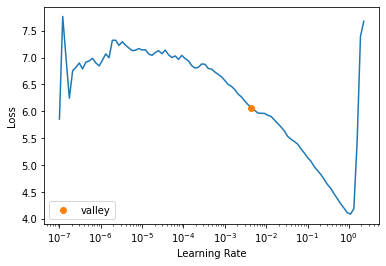

<Figure size 720x720 with 0 Axes>

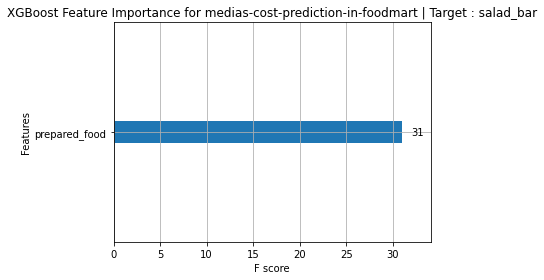

Target Variable: video_store
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_fa

  2%|▏         | 1/42 [00:00<00:04,  9.02it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.892670120367418, 'Adjusted R-Squared': 0.8915857063271797, 'RMSE': 0.15684113957961815, 'Time taken': 0.11069345474243164}


 10%|▉         | 4/42 [00:00<00:05,  7.42it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.25893712043762207}
{'Model': 'BayesianRidge', 'R-Squared': 0.6951787977044588, 'Adjusted R-Squared': 0.6920990179389065, 'RMSE': 0.2643152699811241, 'Time taken': 0.08119654655456543}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11122608184814453}
{'Model': 'DummyRegressor', 'R-Squared': -2.8650249749739842e-05, 'Adjusted R-Squared': -0.010132501224740853, 'RMSE': 0.47874680563555727, 'Time taken': 0.03894495964050293}
{'Model': 'ElasticNet', 'R-Squared': -2.8649232377997436e-05, 'Adjusted R-Squared': -0.01013250019709, 'RMSE': 0.47874683, 'Time taken': 0.036791324615478516}


 19%|█▉        | 8/42 [00:01<00:05,  5.88it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6953624175444311, 'Adjusted R-Squared': 0.6922844929932255, 'RMSE': 0.26423565, 'Time taken': 0.5928010940551758}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10921430587768555}


 21%|██▏       | 9/42 [00:02<00:13,  2.36it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.2481310367584229}
{'Model': 'GammaRegressor', 'R-Squared': 0.6035224761832259, 'Adjusted R-Squared': 0.5995166411358223, 'RMSE': 0.30144560348223504, 'Time taken': 0.09156060218811035}


 29%|██▊       | 12/42 [01:49<08:25, 16.85s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.761630262773474, 'Adjusted R-Squared': -7.850153933021248, 'RMSE': 1.4170726924133734, 'Time taken': 106.54818367958069}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5962655925301861, 'Adjusted R-Squared': 0.5921864371124562, 'RMSE': 0.30419183270334715, 'Time taken': 0.12797069549560547}


 31%|███       | 13/42 [01:54<06:46, 14.03s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999973678884, 'Adjusted R-Squared': 0.9999999973412946, 'RMSE': 2.4561326498869754e-05, 'Time taken': 5.129577398300171}


 33%|███▎      | 14/42 [01:55<04:55, 10.57s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998891169517, 'Adjusted R-Squared': 0.999999887996638, 'RMSE': 0.0001594161242536439, 'Time taken': 0.5363352298736572}


 36%|███▌      | 15/42 [01:56<03:40,  8.17s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5075002202995927, 'Adjusted R-Squared': 0.5025242184839787, 'RMSE': 0.3359716933431439, 'Time taken': 1.6383991241455078}


 38%|███▊      | 16/42 [02:03<03:19,  7.67s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.933287356585133, 'Adjusted R-Squared': 0.9326133212892009, 'RMSE': 0.12365273955719704, 'Time taken': 6.3558738231658936}


 40%|████      | 17/42 [02:28<05:18, 12.74s/it]

{'Model': 'KernelRidge', 'R-Squared': -7.327132543439605, 'Adjusted R-Squared': -7.41126623925612, 'RMSE': 1.3814889, 'Time taken': 25.56249737739563}
{'Model': 'Lars', 'R-Squared': -75.79564927427961, 'Adjusted R-Squared': -76.57155884007177, 'RMSE': 4.195347857894816, 'Time taken': 0.07707428932189941}


 45%|████▌     | 19/42 [02:29<02:44,  7.13s/it]

{'Model': 'LarsCV', 'R-Squared': -42.882585495631226, 'Adjusted R-Squared': -43.32595589720365, 'RMSE': 3.1713616621654994, 'Time taken': 0.3353080749511719}
{'Model': 'Lasso', 'R-Squared': -2.8649232377997436e-05, 'Adjusted R-Squared': -0.01013250019709, 'RMSE': 0.47874683, 'Time taken': 0.07458066940307617}


 52%|█████▏    | 22/42 [02:29<01:10,  3.53s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6953826856471264, 'Adjusted R-Squared': 0.692304965875943, 'RMSE': 0.26422685, 'Time taken': 0.57855224609375}
{'Model': 'LassoLars', 'R-Squared': -2.8649972521721523e-05, 'Adjusted R-Squared': -0.010132500944711742, 'RMSE': 0.47874680556919813, 'Time taken': 0.12338542938232422}


 60%|█████▉    | 25/42 [02:30<00:28,  1.68s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6946471466211968, 'Adjusted R-Squared': 0.6915619952862253, 'RMSE': 0.26454567107976146, 'Time taken': 0.2520465850830078}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6946471466211968, 'Adjusted R-Squared': 0.6915619952862253, 'RMSE': 0.26454567107976146, 'Time taken': 0.08324432373046875}
{'Model': 'LinearRegression', 'R-Squared': 0.6950447426992783, 'Adjusted R-Squared': 0.6919636085007361, 'RMSE': 0.2643734, 'Time taken': 0.09364533424377441}


 62%|██████▏   | 26/42 [02:34<00:34,  2.15s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.4793208207412486, 'Adjusted R-Squared': 0.47406010662901066, 'RMSE': 0.3454496633523082, 'Time taken': 3.7779674530029297}


 64%|██████▍   | 27/42 [02:39<00:43,  2.91s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9929441345761066, 'Adjusted R-Squared': 0.9928728452058223, 'RMSE': 0.0402137721090843, 'Time taken': 5.271459579467773}


 67%|██████▋   | 28/42 [16:03<48:45, 208.94s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9973667436578573, 'Adjusted R-Squared': 0.9973401383904449, 'RMSE': 0.024566666908432237, 'Time taken': 803.8857369422913}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6343400254180867, 'Adjusted R-Squared': 0.6306455573748241, 'RMSE': 0.2894932089715223, 'Time taken': 0.0514371395111084}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6403859617490154, 'Adjusted R-Squared': 0.6367525791953303, 'RMSE': 0.28708994788905845, 'Time taken': 0.14749526977539062}


 76%|███████▌  | 32/42 [16:03<11:34, 69.49s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5655330836078791, 'Adjusted R-Squared': 0.5611434203960366, 'RMSE': 0.31555714909911436, 'Time taken': 0.10337948799133301}
{'Model': 'PoissonRegressor', 'R-Squared': 0.640822599501792, 'Adjusted R-Squared': 0.6371936285444977, 'RMSE': 0.2869156048847775, 'Time taken': 0.12656116485595703}


 79%|███████▊  | 33/42 [16:04<07:42, 51.36s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [16:06<05:03, 37.94s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.179403781890869}
{'Model': 'Ridge', 'R-Squared': 0.6950646374076674, 'Adjusted R-Squared': 0.6919837042165351, 'RMSE': 0.26436475, 'Time taken': 0.052098989486694336}


 88%|████████▊ | 37/42 [16:06<01:21, 16.32s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.6950640241154152, 'Adjusted R-Squared': 0.6919830847278469, 'RMSE': 0.2643650262921351, 'Time taken': 0.18279600143432617}
{'Model': 'SGDRegressor', 'R-Squared': 0.6940565407977516, 'Adjusted R-Squared': 0.6909654222405175, 'RMSE': 0.2648013862879413, 'Time taken': 0.14446640014648438}


 95%|█████████▌| 40/42 [16:11<00:15,  7.85s/it]

{'Model': 'SVR', 'R-Squared': 0.9793690069243691, 'Adjusted R-Squared': 0.9791605604169114, 'RMSE': 0.0687637788050724, 'Time taken': 5.175194025039673}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6950447426992783, 'Adjusted R-Squared': 0.6919636085007361, 'RMSE': 0.2643734, 'Time taken': 0.04742145538330078}
{'Model': 'TweedieRegressor', 'R-Squared': 0.5962655925301861, 'Adjusted R-Squared': 0.5921864371124562, 'RMSE': 0.30419183270334715, 'Time taken': 0.09925651550292969}


 98%|█████████▊| 41/42 [16:13<00:06,  6.37s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999998932546, 'Adjusted R-Squared': 0.999999998921761, 'RMSE': 1.5641352e-05, 'Time taken': 1.4528968334197998}


100%|██████████| 42/42 [16:13<00:00, 23.19s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944718, 'Adjusted R-Squared': 0.9999999992873435, 'RMSE': 1.2716185120269259e-05, 'Time taken': 0.47687315940856934}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: video_store
video_store
Target Standard Deviation: 0.47950459053459543
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.11
RandomForestRegressor                        1.00       1.00  0.00        2.18
ExtraTreeRegressor                           1.00       1.00  0.00        0.11
ExtraTreesRegressor                          1.00       1.00  0.00        1.25
BaggingRegressor                             1.00       1.00  0.00        0.26
LGBMRegressor                                1.00       1.00  0.00        0.48
XGBRegressor                             

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.474138,0.397499,0.630475,00:12
1,0.110174,0.072473,0.269208,00:13
2,0.024084,0.024160,0.155434,00:13
3,0.009789,0.004656,0.068236,00:13
4,0.002051,0.025832,0.160722,00:14


Better model found at epoch 0 with _rmse value: 0.6304751634597778.
Better model found at epoch 1 with _rmse value: 0.2692081332206726.
Better model found at epoch 2 with _rmse value: 0.15543422102928162.
Better model found at epoch 3 with _rmse value: 0.06823591887950897.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       2       2.00
3       2       2.00
4       1       1.00
XGBoost RMSE:  1.5641352e-05


<Figure size 432x288 with 0 Axes>

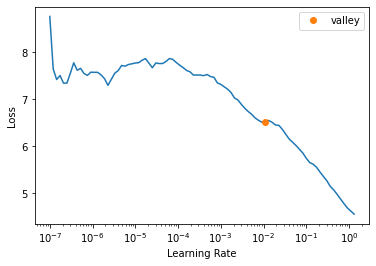

<Figure size 720x720 with 0 Axes>

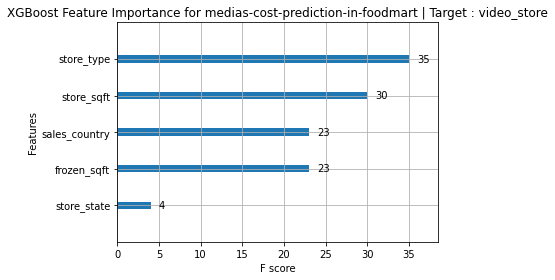

Target Variable: coffee_bar
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_fam

  2%|▏         | 1/42 [00:00<00:04,  9.07it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9206577660165096, 'Adjusted R-Squared': 0.9198561268754791, 'RMSE': 0.13725993411328624, 'Time taken': 0.11014103889465332}


 10%|▉         | 4/42 [00:00<00:04,  7.66it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.25733494758605957}
{'Model': 'BayesianRidge', 'R-Squared': 0.8633979382898562, 'Adjusted R-Squared': 0.8620177709575991, 'RMSE': 0.1801026906113396, 'Time taken': 0.07754874229431152}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10282135009765625}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002737513739388131, 'Adjusted R-Squared': -0.010380078743213117, 'RMSE': 0.4873612663171439, 'Time taken': 0.04070329666137695}
{'Model': 'ElasticNet', 'R-Squared': -0.0002737455825567725, 'Adjusted R-Squared': -0.010380072893317438, 'RMSE': 0.48736125, 'Time taken': 0.03541874885559082}


 17%|█▋        | 7/42 [00:01<00:09,  3.51it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8628400084379424, 'Adjusted R-Squared': 0.8614542040271108, 'RMSE': 0.18047012, 'Time taken': 1.1218175888061523}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07146787643432617}


 21%|██▏       | 9/42 [00:03<00:14,  2.31it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.3370914459228516}
{'Model': 'GammaRegressor', 'R-Squared': 0.6325485505242596, 'Adjusted R-Squared': 0.6288359822042219, 'RMSE': 0.2953871212268934, 'Time taken': 0.09836697578430176}


 29%|██▊       | 12/42 [01:50<07:22, 14.75s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -10.602305257037491, 'Adjusted R-Squared': -10.71952986180675, 'RMSE': 1.659830412155138, 'Time taken': 106.95605111122131}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.635657335658734, 'Adjusted R-Squared': 0.6319761771405095, 'RMSE': 0.2941349209186486, 'Time taken': 0.1607494354248047}


 31%|███       | 13/42 [01:55<06:06, 12.63s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999992577089128, 'Adjusted R-Squared': 0.9999992502091292, 'RMSE': 0.00041983505377757524, 'Time taken': 4.963363409042358}


 33%|███▎      | 14/42 [01:55<04:33,  9.78s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998890848292, 'Adjusted R-Squared': 0.9999998879641909, 'RMSE': 0.00016228823988901687, 'Time taken': 0.5654242038726807}


 36%|███▌      | 15/42 [01:57<03:30,  7.81s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7278846898513361, 'Adjusted R-Squared': 0.7251353560786797, 'RMSE': 0.2541956197235923, 'Time taken': 1.9783451557159424}


 38%|███▊      | 16/42 [02:04<03:11,  7.37s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9540125328481909, 'Adjusted R-Squared': 0.9535478956453436, 'RMSE': 0.10449880382090504, 'Time taken': 6.117666006088257}


 43%|████▎     | 18/42 [02:29<03:34,  8.95s/it]

{'Model': 'KernelRidge', 'R-Squared': -10.079677500794112, 'Adjusted R-Squared': -10.19162170388372, 'RMSE': 1.6220161, 'Time taken': 25.680627584457397}
{'Model': 'Lars', 'R-Squared': 0.8585457728533747, 'Adjusted R-Squared': 0.8571165813691957, 'RMSE': 0.18327344314255964, 'Time taken': 0.16094398498535156}


 48%|████▊     | 20/42 [02:30<01:42,  4.64s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8553759902961906, 'Adjusted R-Squared': 0.8539147727189862, 'RMSE': 0.18531551162336027, 'Time taken': 0.41123056411743164}
{'Model': 'Lasso', 'R-Squared': -0.0002737455825567725, 'Adjusted R-Squared': -0.010380072893317438, 'RMSE': 0.48736125, 'Time taken': 0.09660124778747559}


 50%|█████     | 21/42 [02:31<01:15,  3.57s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8633090860283508, 'Adjusted R-Squared': 0.8619280209718047, 'RMSE': 0.18016125, 'Time taken': 1.0006334781646729}
{'Model': 'LassoLars', 'R-Squared': -0.00027374936633695057, 'Adjusted R-Squared': -0.01038007671532748, 'RMSE': 0.48736126582806405, 'Time taken': 0.05864977836608887}


 60%|█████▉    | 25/42 [02:31<00:21,  1.26s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8485655512683457, 'Adjusted R-Squared': 0.8470355240015444, 'RMSE': 0.18962863301206312, 'Time taken': 0.3022127151489258}
{'Model': 'LassoLarsIC', 'R-Squared': 0.84851649570642, 'Adjusted R-Squared': 0.8469859728037317, 'RMSE': 0.18965934460378253, 'Time taken': 0.08821940422058105}
{'Model': 'LinearRegression', 'R-Squared': 0.8633927588864578, 'Adjusted R-Squared': 0.86201253922378, 'RMSE': 0.1801061, 'Time taken': 0.0914618968963623}


 62%|██████▏   | 26/42 [02:36<00:30,  1.88s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7361501441601808, 'Adjusted R-Squared': 0.7334843209135042, 'RMSE': 0.25030527634930133, 'Time taken': 4.081611394882202}


 64%|██████▍   | 27/42 [02:42<00:44,  2.95s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9908991607019809, 'Adjusted R-Squared': 0.9908072098123824, 'RMSE': 0.04648708311295116, 'Time taken': 6.363232135772705}


 67%|██████▋   | 28/42 [15:50<47:20, 202.89s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9965176052207921, 'Adjusted R-Squared': 0.9964824206309543, 'RMSE': 0.028756139078318095, 'Time taken': 788.4859611988068}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7682910458150469, 'Adjusted R-Squared': 0.7659499601450803, 'RMSE': 0.23456487679305743, 'Time taken': 0.0662221908569336}


 74%|███████▍  | 31/42 [15:51<16:34, 90.37s/it] 

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7748479629823259, 'Adjusted R-Squared': 0.7725731255282449, 'RMSE': 0.23122219206224304, 'Time taken': 0.16857504844665527}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8028957059631512, 'Adjusted R-Squared': 0.8009042506053654, 'RMSE': 0.21634139050309806, 'Time taken': 0.1054069995880127}


 76%|███████▌  | 32/42 [15:51<11:19, 67.97s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.666437715418455, 'Adjusted R-Squared': 0.6630675483602935, 'RMSE': 0.28143625538937833, 'Time taken': 0.13239240646362305}


 79%|███████▊  | 33/42 [15:51<07:32, 50.29s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [15:54<02:05, 21.00s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.47780179977417}
{'Model': 'Ridge', 'R-Squared': 0.8634001223108686, 'Adjusted R-Squared': 0.8620199770450021, 'RMSE': 0.18010126, 'Time taken': 0.03649115562438965}
{'Model': 'RidgeCV', 'R-Squared': 0.8633952412601933, 'Adjusted R-Squared': 0.8620150466783312, 'RMSE': 0.18010446854900508, 'Time taken': 0.10561203956604004}


 88%|████████▊ | 37/42 [15:54<01:20, 16.04s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8444018984197678, 'Adjusted R-Squared': 0.8428298034303237, 'RMSE': 0.19221785247170886, 'Time taken': 0.14976024627685547}


 90%|█████████ | 38/42 [15:59<00:52, 13.15s/it]

{'Model': 'SVR', 'R-Squared': 0.9784132014559781, 'Adjusted R-Squared': 0.9781950979091832, 'RMSE': 0.07159549451654942, 'Time taken': 4.6783435344696045}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8633927588864578, 'Adjusted R-Squared': 0.86201253922378, 'RMSE': 0.1801061, 'Time taken': 0.05121135711669922}


 95%|█████████▌| 40/42 [15:59<00:15,  7.67s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.635657335658734, 'Adjusted R-Squared': 0.6319761771405095, 'RMSE': 0.2941349209186486, 'Time taken': 0.17096185684204102}


 98%|█████████▊| 41/42 [16:00<00:06,  6.24s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999993151314, 'Adjusted R-Squared': 0.9999999993082118, 'RMSE': 1.2752496e-05, 'Time taken': 1.4720871448516846}


100%|██████████| 42/42 [16:01<00:00, 22.89s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999294299, 'Adjusted R-Squared': 0.9999999992871689, 'RMSE': 1.294499685355842e-05, 'Time taken': 0.49060702323913574}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: coffee_bar
coffee_bar
Target Standard Deviation: 0.48537098810471774
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.10
RandomForestRegressor                        1.00       1.00  0.00        2.48
ExtraTreeRegressor                           1.00       1.00  0.00        0.07
ExtraTreesRegressor                          1.00       1.00  0.00        1.34
BaggingRegressor                             1.00       1.00  0.00        0.26
XGBRegressor                                 1.00       1.00  0.00        1.47
LGBMRegressor                                

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.421075,0.319936,0.565629,00:13
1,0.102329,0.124703,0.353134,00:13
2,0.030402,0.014109,0.118780,00:13
3,0.013315,0.002272,0.047665,00:13
4,0.005719,0.055152,0.234844,00:12


Better model found at epoch 0 with _rmse value: 0.5656288862228394.
Better model found at epoch 1 with _rmse value: 0.3531337380409241.
Better model found at epoch 2 with _rmse value: 0.11878041923046112.
Better model found at epoch 3 with _rmse value: 0.0476648323237896.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       2       2.00
2       1       1.00
3       2       2.00
4       2       2.00
XGBoost RMSE:  1.2752496e-05


<Figure size 432x288 with 0 Axes>

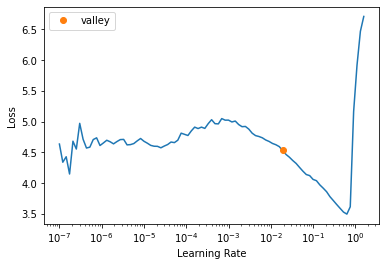

<Figure size 720x720 with 0 Axes>

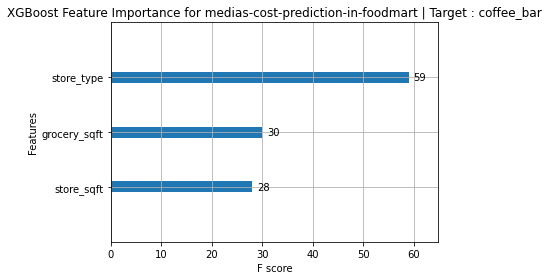

Target Variable: meat_sqft
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_fami

  2%|▏         | 1/42 [00:00<00:27,  1.50it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.989772513302605, 'Adjusted R-Squared': 0.9896691792617118, 'RMSE': 0.5768666108658967, 'Time taken': 0.6672115325927734}


  5%|▍         | 2/42 [00:01<00:22,  1.81it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.4715569019317627}


 10%|▉         | 4/42 [00:01<00:11,  3.25it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999999999999906, 'Adjusted R-Squared': 0.9999999999999905, 'RMSE': 5.541595667073625e-07, 'Time taken': 0.2347397804260254}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1526334285736084}
{'Model': 'DummyRegressor', 'R-Squared': -0.001204132503052735, 'Adjusted R-Squared': -0.01131986003528862, 'RMSE': 5.707583289265804, 'Time taken': 0.026284456253051758}
{'Model': 'ElasticNet', 'R-Squared': 0.8719682191776389, 'Adjusted R-Squared': 0.8706746422054503, 'RMSE': 2.041032, 'Time taken': 0.037953853607177734}


 19%|█▉        | 8/42 [00:02<00:09,  3.67it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9998732573144083, 'Adjusted R-Squared': 0.9998719767618891, 'RMSE': 0.06421735, 'Time taken': 0.8428878784179688}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15753936767578125}


 24%|██▍       | 10/42 [00:05<00:21,  1.51it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.628715991973877}
{'Model': 'GammaRegressor', 'R-Squared': 0.8246046806753751, 'Adjusted R-Squared': 0.822832563278814, 'RMSE': 2.3889108377420096, 'Time taken': 0.10346531867980957}


 29%|██▊       | 12/42 [01:51<10:31, 21.06s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.7143376528687666, 'Adjusted R-Squared': -3.761969253301894, 'RMSE': 12.385150355791277, 'Time taken': 105.57480692863464}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8230028414085531, 'Adjusted R-Squared': 0.8212145397304379, 'RMSE': 2.3997946911993613, 'Time taken': 0.16289734840393066}


 31%|███       | 13/42 [01:55<07:55, 16.38s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999990081325, 'Adjusted R-Squared': 0.9999999989981111, 'RMSE': 0.0001796460934519484, 'Time taken': 4.673309087753296}


 33%|███▎      | 14/42 [01:57<05:39, 12.13s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.99999999912798, 'Adjusted R-Squared': 0.9999999991191695, 'RMSE': 0.00016844346053984698, 'Time taken': 1.6955208778381348}


 36%|███▌      | 15/42 [01:59<04:04,  9.04s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9998934461688919, 'Adjusted R-Squared': 0.9998923695957056, 'RMSE': 0.05888104046112248, 'Time taken': 1.57468843460083}


 38%|███▊      | 16/42 [02:05<03:31,  8.14s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9749828871548925, 'Adjusted R-Squared': 0.9747301252165737, 'RMSE': 0.9022139435854447, 'Time taken': 5.998110771179199}


 43%|████▎     | 18/42 [02:30<03:43,  9.31s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.98298401956005, 'Adjusted R-Squared': -3.0232263435768223, 'RMSE': 11.384008, 'Time taken': 25.227607250213623}
{'Model': 'Lars', 'R-Squared': 0.999999999994572, 'Adjusted R-Squared': 0.9999999999945172, 'RMSE': 1.3289562616549917e-05, 'Time taken': 0.09978199005126953}


 45%|████▌     | 19/42 [02:30<02:31,  6.58s/it]

{'Model': 'LarsCV', 'R-Squared': 0.999999999994572, 'Adjusted R-Squared': 0.9999999999945172, 'RMSE': 1.3289562616549917e-05, 'Time taken': 0.16331934928894043}
{'Model': 'Lasso', 'R-Squared': 0.9685144280006501, 'Adjusted R-Squared': 0.968196311587421, 'RMSE': 1.0121542, 'Time taken': 0.05749773979187012}


 50%|█████     | 21/42 [02:31<01:17,  3.69s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999989986183392, 'Adjusted R-Squared': 0.999998988500818, 'RMSE': 0.0057080896, 'Time taken': 0.509326696395874}
{'Model': 'LassoLars', 'R-Squared': -0.001204134638035148, 'Adjusted R-Squared': -0.011319862191842, 'RMSE': 5.707583295351271, 'Time taken': 0.06526494026184082}


 60%|█████▉    | 25/42 [02:31<00:25,  1.47s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.999999999994572, 'Adjusted R-Squared': 0.9999999999945172, 'RMSE': 1.3289562616549917e-05, 'Time taken': 0.14812493324279785}
{'Model': 'LassoLarsIC', 'R-Squared': 0.999999999994572, 'Adjusted R-Squared': 0.9999999999945172, 'RMSE': 1.3289562616549917e-05, 'Time taken': 0.0646829605102539}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999996915, 'Adjusted R-Squared': 0.9999999999996884, 'RMSE': 3.1681693e-06, 'Time taken': 0.06980228424072266}


 62%|██████▏   | 26/42 [02:31<00:19,  1.19s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999993981, 'Adjusted R-Squared': 0.999999999999392, 'RMSE': 4.4251455107475645e-06, 'Time taken': 0.11327767372131348}


 64%|██████▍   | 27/42 [02:48<01:12,  4.82s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9998889918670658, 'Adjusted R-Squared': 0.9998878702895672, 'RMSE': 0.060099151443219354, 'Time taken': 17.194390535354614}


 67%|██████▋   | 28/42 [04:02<05:01, 21.57s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9955659642929368, 'Adjusted R-Squared': 0.9955211647404532, 'RMSE': 0.3798311112269746, 'Time taken': 73.25237894058228}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999999999950566, 'Adjusted R-Squared': 0.9999999999950067, 'RMSE': 1.2682474976339377e-05, 'Time taken': 0.06069779396057129}


 74%|███████▍  | 31/42 [04:02<01:48,  9.87s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.999999999999618, 'Adjusted R-Squared': 0.9999999999996141, 'RMSE': 3.525450183825026e-06, 'Time taken': 0.1682586669921875}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9997692013858703, 'Adjusted R-Squared': 0.9997668694978771, 'RMSE': 0.0866577760629936, 'Time taken': 0.10570859909057617}


 76%|███████▌  | 32/42 [04:02<01:15,  7.53s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9582102408563737, 'Adjusted R-Squared': 0.957788015454569, 'RMSE': 1.1660733638368235, 'Time taken': 0.2868988513946533}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999999999998245, 'Adjusted R-Squared': 0.9999999999998227, 'RMSE': 2.3899247e-06, 'Time taken': 0.08668231964111328}


 81%|████████  | 34/42 [04:07<00:42,  5.37s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 4.513180732727051}
{'Model': 'Ridge', 'R-Squared': 0.9999998967021498, 'Adjusted R-Squared': 0.9999998956584737, 'RMSE': 0.0018333128, 'Time taken': 0.05573105812072754}


 88%|████████▊ | 37/42 [04:07<00:13,  2.75s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9999999989104477, 'Adjusted R-Squared': 0.9999999988994394, 'RMSE': 0.00018828467789903182, 'Time taken': 0.1704094409942627}
{'Model': 'SGDRegressor', 'R-Squared': 0.9997827444962475, 'Adjusted R-Squared': 0.999780549441903, 'RMSE': 0.08407683111943333, 'Time taken': 0.18445754051208496}


 90%|█████████ | 38/42 [04:44<00:42, 10.66s/it]

{'Model': 'SVR', 'R-Squared': 0.9954369354278815, 'Adjusted R-Squared': 0.9953908322243238, 'RMSE': 0.38531795640410055, 'Time taken': 37.135950803756714}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999996915, 'Adjusted R-Squared': 0.9999999999996884, 'RMSE': 3.1681693e-06, 'Time taken': 0.06401181221008301}


 95%|█████████▌| 40/42 [04:45<00:12,  6.48s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.8230028414085531, 'Adjusted R-Squared': 0.8212145397304379, 'RMSE': 2.3997946911993613, 'Time taken': 0.1844499111175537}


 98%|█████████▊| 41/42 [04:46<00:05,  5.43s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999964484, 'Adjusted R-Squared': 0.9999999999964125, 'RMSE': 1.0749907e-05, 'Time taken': 1.7203810214996338}


100%|██████████| 42/42 [04:47<00:00,  6.85s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992936426, 'Adjusted R-Squared': 0.9999999992865058, 'RMSE': 0.0001516013973537835, 'Time taken': 0.8496503829956055}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: meat_sqft
meat_sqft
Target Standard Deviation: 5.639051421435502
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          1.00       1.00  0.00        2.63
ExtraTreeRegressor                           1.00       1.00  0.00        0.16
BaggingRegressor                             1.00       1.00  0.00        0.47
RandomForestRegressor                        1.00       1.00  0.00        4.51
DecisionTreeRegressor                        1.00       1.00  0.00        0.15
BayesianRidge                                1.00       1.00  0.00        0.23
RANSACRegressor                              1.00

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,34.400425,30.033806,5.480310,00:12
1,12.116718,12.284670,3.504949,00:13
2,3.081311,1.564128,1.250651,00:13
3,2.965415,6.649503,2.578663,00:14


Better model found at epoch 0 with _rmse value: 5.480310440063477.
Better model found at epoch 1 with _rmse value: 3.5049493312835693.
Better model found at epoch 2 with _rmse value: 1.2506508827209473.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       5       5.00
1      10      10.00
2      12      12.00
3       8       8.00
4      18      18.00
XGBoost RMSE:  1.0749907e-05


<Figure size 432x288 with 0 Axes>

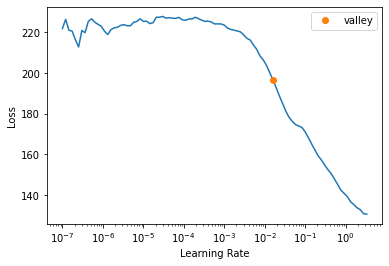

<Figure size 720x720 with 0 Axes>

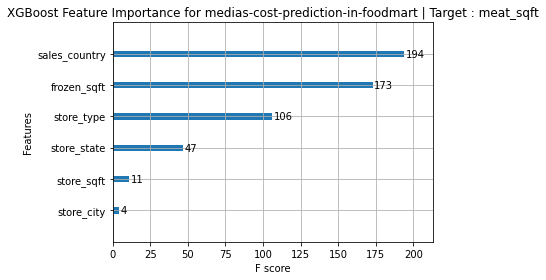

Target Variable: frozen_sqft
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_fa

  2%|▏         | 1/42 [00:00<00:24,  1.69it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9889056515479467, 'Adjusted R-Squared': 0.9887935591159988, 'RMSE': 0.5945911135644889, 'Time taken': 0.5914390087127686}


  5%|▍         | 2/42 [00:01<00:21,  1.85it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5027904510498047}


 10%|▉         | 4/42 [00:01<00:11,  3.22it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999964330719624, 'Adjusted R-Squared': 0.9999963970332856, 'RMSE': 0.010661411026819029, 'Time taken': 0.24725842475891113}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1610720157623291}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002478701338015643, 'Adjusted R-Squared': -0.010353936010374376, 'RMSE': 5.645745938591729, 'Time taken': 0.028283357620239258}
{'Model': 'ElasticNet', 'R-Squared': 0.8728742559808534, 'Adjusted R-Squared': 0.8715898332072324, 'RMSE': 2.0127242, 'Time taken': 0.04293537139892578}


 17%|█▋        | 7/42 [00:02<00:08,  3.99it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9998743917348434, 'Adjusted R-Squared': 0.9998731226440107, 'RMSE': 0.06326691, 'Time taken': 0.5693919658660889}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09370303153991699}


 24%|██▍       | 10/42 [00:05<00:19,  1.66it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.9802277088165283}
{'Model': 'GammaRegressor', 'R-Squared': 0.8253028596521543, 'Adjusted R-Squared': 0.823537796349827, 'RMSE': 2.359448004255944, 'Time taken': 0.10693717002868652}


 29%|██▊       | 12/42 [01:53<09:36, 19.23s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.8370232878539268, 'Adjusted R-Squared': -3.885894450145959, 'RMSE': 12.415282392910468, 'Time taken': 108.22908973693848}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8248890396403621, 'Adjusted R-Squared': 0.8231197952820934, 'RMSE': 2.362240864145217, 'Time taken': 0.16640090942382812}


 31%|███       | 13/42 [01:58<07:29, 15.48s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999990007366, 'Adjusted R-Squared': 0.9999999989906404, 'RMSE': 0.00017844628976252798, 'Time taken': 4.942397832870483}


 33%|███▎      | 14/42 [02:00<05:27, 11.70s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992943431, 'Adjusted R-Squared': 0.9999999992872135, 'RMSE': 0.00014995615405639614, 'Time taken': 1.5977208614349365}


 36%|███▌      | 15/42 [02:01<04:00,  8.89s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999996058299316, 'Adjusted R-Squared': 0.9999996018474101, 'RMSE': 0.0035441274774364964, 'Time taken': 1.679365634918213}


 38%|███▊      | 16/42 [02:08<03:30,  8.09s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9750553467828799, 'Adjusted R-Squared': 0.9748033169448691, 'RMSE': 0.8915716460273958, 'Time taken': 6.075820684432983}


 43%|████▎     | 18/42 [02:33<03:43,  9.30s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.05247417405287, 'Adjusted R-Squared': -3.093418596119582, 'RMSE': 11.363906, 'Time taken': 25.391268730163574}
{'Model': 'Lars', 'R-Squared': 0.9999999999975907, 'Adjusted R-Squared': 0.9999999999975664, 'RMSE': 8.76225491069071e-06, 'Time taken': 0.1099553108215332}


 45%|████▌     | 19/42 [02:33<02:31,  6.61s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999999999862933, 'Adjusted R-Squared': 0.9999999999861549, 'RMSE': 2.089938017806756e-05, 'Time taken': 0.1595921516418457}
{'Model': 'Lasso', 'R-Squared': 0.9687158131464461, 'Adjusted R-Squared': 0.9683997314404238, 'RMSE': 0.9984583, 'Time taken': 0.05947279930114746}


 52%|█████▏    | 22/42 [02:34<00:56,  2.83s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999990005140983, 'Adjusted R-Squared': 0.999998990415731, 'RMSE': 0.005643595, 'Time taken': 0.5202720165252686}
{'Model': 'LassoLars', 'R-Squared': -0.00024787145305116276, 'Adjusted R-Squared': -0.01035393734295309, 'RMSE': 5.645745942314879, 'Time taken': 0.12020564079284668}


 60%|█████▉    | 25/42 [02:34<00:21,  1.26s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999999999862933, 'Adjusted R-Squared': 0.9999999999861549, 'RMSE': 2.089938017806756e-05, 'Time taken': 0.1408092975616455}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999999999862933, 'Adjusted R-Squared': 0.9999999999861549, 'RMSE': 2.089938017806756e-05, 'Time taken': 0.06550931930541992}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999995228, 'Adjusted R-Squared': 0.999999999999518, 'RMSE': 3.8995545e-06, 'Time taken': 0.08980822563171387}


 62%|██████▏   | 26/42 [02:34<00:16,  1.00s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999995479, 'Adjusted R-Squared': 0.9999999999995434, 'RMSE': 3.795667459562873e-06, 'Time taken': 0.14520955085754395}


 64%|██████▍   | 27/42 [02:51<01:14,  4.95s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.999895011046098, 'Adjusted R-Squared': 0.9998939502837448, 'RMSE': 0.05784146942220412, 'Time taken': 16.778680086135864}


 67%|██████▋   | 28/42 [04:06<05:26, 23.33s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9953076733668317, 'Adjusted R-Squared': 0.9952602641560899, 'RMSE': 0.3866888334829832, 'Time taken': 74.78333687782288}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999999999532537, 'Adjusted R-Squared': 0.9999999999527814, 'RMSE': 3.859586871070477e-05, 'Time taken': 0.06264042854309082}


 74%|███████▍  | 31/42 [04:06<01:52, 10.26s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999999999997867, 'Adjusted R-Squared': 0.9999999999997846, 'RMSE': 2.607226110197642e-06, 'Time taken': 0.16904592514038086}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9997661487943237, 'Adjusted R-Squared': 0.9997637860642841, 'RMSE': 0.08632514565786271, 'Time taken': 0.10525631904602051}


 76%|███████▌  | 32/42 [04:07<01:17,  7.75s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.957885377786605, 'Adjusted R-Squared': 0.9574598701107939, 'RMSE': 1.1584678021810382, 'Time taken': 0.28124427795410156}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999999999994857, 'Adjusted R-Squared': 0.9999999999994805, 'RMSE': 4.0482605e-06, 'Time taken': 0.08389663696289062}


 81%|████████  | 34/42 [04:11<00:43,  5.50s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 4.621440887451172}
{'Model': 'Ridge', 'R-Squared': 0.9999999029293638, 'Adjusted R-Squared': 0.9999999019486047, 'RMSE': 0.0017587797, 'Time taken': 0.05240058898925781}


 88%|████████▊ | 37/42 [04:12<00:13,  2.78s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9999999989081735, 'Adjusted R-Squared': 0.9999999988971422, 'RMSE': 0.00018652812790663227, 'Time taken': 0.17522001266479492}
{'Model': 'SGDRegressor', 'R-Squared': 0.9997873948010882, 'Adjusted R-Squared': 0.9997852467313847, 'RMSE': 0.08231035092371193, 'Time taken': 0.14873814582824707}


 90%|█████████ | 38/42 [04:49<00:43, 10.80s/it]

{'Model': 'SVR', 'R-Squared': 0.9951965888769806, 'Adjusted R-Squared': 0.9951480573172633, 'RMSE': 0.391239227604959, 'Time taken': 37.43377137184143}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999995228, 'Adjusted R-Squared': 0.999999999999518, 'RMSE': 3.8995545e-06, 'Time taken': 0.06750702857971191}


 95%|█████████▌| 40/42 [04:49<00:13,  6.55s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.8248890396403621, 'Adjusted R-Squared': 0.8231197952820934, 'RMSE': 2.362240864145217, 'Time taken': 0.17582225799560547}


 98%|█████████▊| 41/42 [04:52<00:05,  5.58s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999970619, 'Adjusted R-Squared': 0.9999999999970323, 'RMSE': 9.676173e-06, 'Time taken': 2.1509499549865723}


100%|██████████| 42/42 [04:52<00:00,  6.97s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992943172, 'Adjusted R-Squared': 0.9999999992871872, 'RMSE': 0.00014995891058422586, 'Time taken': 0.8616921901702881}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: frozen_sqft
frozen_sqft
Target Standard Deviation: 5.654454161046405
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          1.00       1.00  0.00        2.98
ExtraTreeRegressor                           1.00       1.00  0.00        0.09
BaggingRegressor                             1.00       1.00  0.00        0.50
RandomForestRegressor                        1.00       1.00  0.00        4.62
DecisionTreeRegressor                        1.00       1.00  0.00        0.16
OrthogonalMatchingPursuitCV                  1.00       1.00  0.00        0.17
LinearSVR                                   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,31.317682,29.013309,5.386400,00:13
1,7.073440,8.896269,2.982661,00:13
2,4.019475,40.583912,6.370551,00:13


Better model found at epoch 0 with _rmse value: 5.38640022277832.
Better model found at epoch 1 with _rmse value: 2.982661485671997.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      11      11.00
1      17      17.00
2      13      13.00
3      13      13.00
4      18      18.00
XGBoost RMSE:  9.676173e-06


<Figure size 432x288 with 0 Axes>

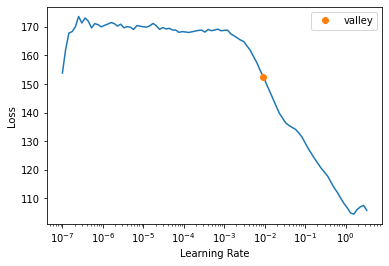

<Figure size 720x720 with 0 Axes>

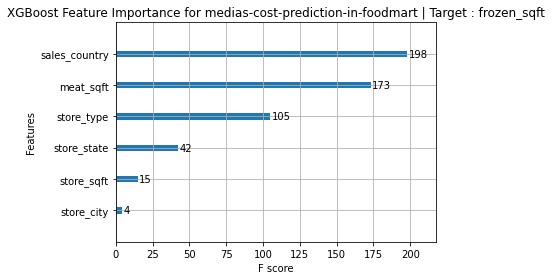

Target Variable: grocery_sqft
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_f

  2%|▏         | 1/42 [00:00<00:19,  2.13it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9851077315696666, 'Adjusted R-Squared': 0.9849572666196253, 'RMSE': 0.6245310605082659, 'Time taken': 0.46956729888916016}


  5%|▍         | 2/42 [00:00<00:19,  2.10it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.47848010063171387}
{'Model': 'BayesianRidge', 'R-Squared': 0.9851049149486604, 'Adjusted R-Squared': 0.9849544215407156, 'RMSE': 0.6245901174660992, 'Time taken': 0.08350276947021484}


 10%|▉         | 4/42 [00:01<00:09,  3.97it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1537494659423828}
{'Model': 'DummyRegressor', 'R-Squared': -2.966760737010965e-05, 'Adjusted R-Squared': -0.010133528861296481, 'RMSE': 5.117761664353373, 'Time taken': 0.027486324310302734}
{'Model': 'ElasticNet', 'R-Squared': 0.7112277023346332, 'Adjusted R-Squared': 0.7083100736641066, 'RMSE': 2.7501185, 'Time taken': 0.04131269454956055}


 17%|█▋        | 7/42 [00:01<00:07,  4.39it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9847052260915642, 'Adjusted R-Squared': 0.9845506944026686, 'RMSE': 0.63291466, 'Time taken': 0.5566322803497314}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0958247184753418}


 24%|██▍       | 10/42 [00:04<00:16,  1.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.4744441509246826}
{'Model': 'GammaRegressor', 'R-Squared': 0.6925737268500594, 'Adjusted R-Squared': 0.6894676265909037, 'RMSE': 2.8375538018989275, 'Time taken': 0.11885333061218262}


 29%|██▊       | 12/42 [01:51<09:15, 18.51s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.4176497054671637, 'Adjusted R-Squared': -3.4622837009757985, 'RMSE': 10.756457176842593, 'Time taken': 107.26380062103271}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7134407209770741, 'Adjusted R-Squared': 0.7105454516765142, 'RMSE': 2.7395602275530253, 'Time taken': 0.18330049514770508}


 31%|███       | 13/42 [01:56<07:14, 14.99s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999240553769, 'Adjusted R-Squared': 0.9999999232880656, 'RMSE': 0.0014103345014791326, 'Time taken': 4.789260625839233}


 33%|███▎      | 14/42 [01:58<05:20, 11.45s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999991289972, 'Adjusted R-Squared': 0.999999999120197, 'RMSE': 0.00015103701913850298, 'Time taken': 1.8018732070922852}


 36%|███▌      | 15/42 [02:00<03:56,  8.76s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9594984499606705, 'Adjusted R-Squared': 0.9590892400587828, 'RMSE': 1.0299340987875618, 'Time taken': 1.7611925601959229}


 38%|███▊      | 16/42 [02:06<03:28,  8.01s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9778406138366075, 'Adjusted R-Squared': 0.9776167251155831, 'RMSE': 0.7618201887584761, 'Time taken': 6.114832401275635}


 43%|████▎     | 18/42 [02:32<03:43,  9.32s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.54901901235123, 'Adjusted R-Squared': -2.584876744226463, 'RMSE': 9.641127, 'Time taken': 25.707237720489502}
{'Model': 'Lars', 'R-Squared': 0.9454079370950412, 'Adjusted R-Squared': 0.9448563628297726, 'RMSE': 1.1957444325412403, 'Time taken': 0.11923885345458984}


 45%|████▌     | 19/42 [02:32<02:33,  6.67s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9582799805938409, 'Adjusted R-Squared': 0.957858459811763, 'RMSE': 1.0453118302944517, 'Time taken': 0.28925228118896484}
{'Model': 'Lasso', 'R-Squared': 0.7641925734786368, 'Adjusted R-Squared': 0.7618100786413409, 'RMSE': 2.4851487, 'Time taken': 0.0618290901184082}


 50%|█████     | 21/42 [02:33<01:18,  3.75s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9850282133890618, 'Adjusted R-Squared': 0.9848769450221919, 'RMSE': 0.62619615, 'Time taken': 0.49512767791748047}
{'Model': 'LassoLars', 'R-Squared': -2.9667298809599174e-05, 'Adjusted R-Squared': -0.010133528549618465, 'RMSE': 5.117761663563827, 'Time taken': 0.06328487396240234}


 60%|█████▉    | 25/42 [02:33<00:25,  1.53s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9612483537013913, 'Adjusted R-Squared': 0.9608568240595766, 'RMSE': 1.0074388472400402, 'Time taken': 0.2730085849761963}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9612483536935992, 'Adjusted R-Squared': 0.9608568240517058, 'RMSE': 1.0074388473413276, 'Time taken': 0.07897090911865234}
{'Model': 'LinearRegression', 'R-Squared': 0.9851048448563446, 'Adjusted R-Squared': 0.9849543507402178, 'RMSE': 0.6245916, 'Time taken': 0.09317231178283691}


 62%|██████▏   | 26/42 [02:37<00:31,  1.94s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9672482236897338, 'Adjusted R-Squared': 0.966917314103371, 'RMSE': 0.926170713961862, 'Time taken': 3.5647761821746826}


 64%|██████▍   | 27/42 [02:52<01:13,  4.90s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9998845252108429, 'Adjusted R-Squared': 0.9998833585042084, 'RMSE': 0.05499423987309469, 'Time taken': 14.984206914901733}


 67%|██████▋   | 28/42 [04:17<05:42, 24.49s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9939109571666545, 'Adjusted R-Squared': 0.9938494361478786, 'RMSE': 0.39934488781322924, 'Time taken': 85.07655882835388}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9622376733211649, 'Adjusted R-Squared': 0.9618561393309771, 'RMSE': 0.9944958774196457, 'Time taken': 0.051305294036865234}


 74%|███████▍  | 31/42 [04:17<02:03, 11.21s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9652446625905213, 'Adjusted R-Squared': 0.9648935099013627, 'RMSE': 0.9540790711378466, 'Time taken': 0.1661980152130127}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9779611205464442, 'Adjusted R-Squared': 0.9777384493723744, 'RMSE': 0.7597459075364661, 'Time taken': 0.13576650619506836}


 79%|███████▊  | 33/42 [04:17<00:57,  6.35s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9026235393436447, 'Adjusted R-Squared': 0.9016396902842221, 'RMSE': 1.5969841553220971, 'Time taken': 0.23421239852905273}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9848842259836312, 'Adjusted R-Squared': 0.9847315028311546, 'RMSE': 0.62920016, 'Time taken': 0.12131381034851074}


 86%|████████▌ | 36/42 [04:22<00:20,  3.35s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 4.602984666824341}
{'Model': 'Ridge', 'R-Squared': 0.9851047512066262, 'Adjusted R-Squared': 0.9849542561443037, 'RMSE': 0.62459356, 'Time taken': 0.03899335861206055}
{'Model': 'RidgeCV', 'R-Squared': 0.9851049470021401, 'Adjusted R-Squared': 0.9849544539180496, 'RMSE': 0.6245894454223552, 'Time taken': 0.10637569427490234}


 88%|████████▊ | 37/42 [04:22<00:12,  2.59s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9849532063881189, 'Adjusted R-Squared': 0.9848011801834017, 'RMSE': 0.6277628289101085, 'Time taken': 0.16110467910766602}


 90%|█████████ | 38/42 [05:07<00:53, 13.30s/it]

{'Model': 'SVR', 'R-Squared': 0.9937941352540486, 'Adjusted R-Squared': 0.9937314339178934, 'RMSE': 0.4031575225118682, 'Time taken': 44.899094581604004}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9851048448563446, 'Adjusted R-Squared': 0.9849543507402178, 'RMSE': 0.6245916, 'Time taken': 0.074371337890625}


 95%|█████████▌| 40/42 [05:08<00:15,  7.78s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7134407209770741, 'Adjusted R-Squared': 0.7105454516765142, 'RMSE': 2.7395602275530253, 'Time taken': 0.19553375244140625}


 98%|█████████▊| 41/42 [05:10<00:06,  6.43s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999920022, 'Adjusted R-Squared': 0.9999999999919214, 'RMSE': 1.4473016e-05, 'Time taken': 1.9324491024017334}


100%|██████████| 42/42 [05:10<00:00,  7.40s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944711, 'Adjusted R-Squared': 0.9999999992873427, 'RMSE': 0.00013593491025994534, 'Time taken': 0.8580451011657715}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: grocery_sqft
grocery_sqft
Target Standard Deviation: 5.170018917699915
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.15
RandomForestRegressor                        1.00       1.00  0.00        4.60
ExtraTreeRegressor                           1.00       1.00  0.00        0.10
ExtraTreesRegressor                          1.00       1.00  0.00        2.47
BaggingRegressor                             1.00       1.00  0.00        0.48
XGBRegressor                                 1.00       1.00  0.00        1.93
LGBMRegressor                             

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,22.881636,16.960392,4.118299,00:13
1,4.893525,3.362107,1.833605,00:13
2,1.432307,1.734327,1.316939,00:13
3,1.369134,3.348870,1.829992,00:13


Better model found at epoch 0 with _rmse value: 4.11829948425293.
Better model found at epoch 1 with _rmse value: 1.8336045742034912.
Better model found at epoch 2 with _rmse value: 1.3169385194778442.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      11      11.00
1      13      13.00
2       2       2.00
3       7       7.00
4      18      18.00
XGBoost RMSE:  1.4473016e-05


<Figure size 432x288 with 0 Axes>

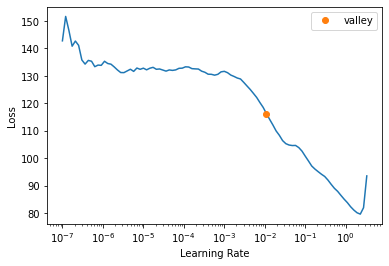

<Figure size 720x720 with 0 Axes>

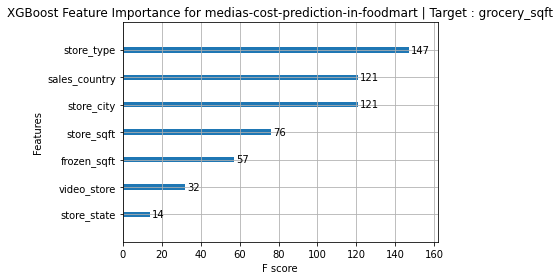

Target Variable: store_sqft
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_fam

  2%|▏         | 1/42 [00:00<00:23,  1.74it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9830896545495615, 'Adjusted R-Squared': 0.9829187998342249, 'RMSE': 0.7393261367705949, 'Time taken': 0.5755715370178223}


  7%|▋         | 3/42 [00:01<00:13,  2.99it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.4829897880554199}
{'Model': 'BayesianRidge', 'R-Squared': 0.9909550410011755, 'Adjusted R-Squared': 0.9908636547016167, 'RMSE': 0.5407084058560674, 'Time taken': 0.10950851440429688}


 10%|▉         | 4/42 [00:01<00:09,  3.81it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14952898025512695}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002693766888544058, 'Adjusted R-Squared': -0.01037565985822897, 'RMSE': 5.686149925270723, 'Time taken': 0.027694225311279297}
{'Model': 'ElasticNet', 'R-Squared': 0.8801542178832532, 'Adjusted R-Squared': 0.8789433486524703, 'RMSE': 1.9682089, 'Time taken': 0.040421247482299805}


 19%|█▉        | 8/42 [00:02<00:07,  4.85it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9905726806955901, 'Adjusted R-Squared': 0.9904774311951667, 'RMSE': 0.5520189, 'Time taken': 0.5607197284698486}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1252431869506836}


 24%|██▍       | 10/42 [00:04<00:18,  1.70it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.4393978118896484}
{'Model': 'GammaRegressor', 'R-Squared': 0.8356102254785994, 'Adjusted R-Squared': 0.8339493032808586, 'RMSE': 2.3051395377034885, 'Time taken': 0.1068112850189209}


 29%|██▊       | 12/42 [01:52<10:42, 21.43s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.8342027811013364, 'Adjusted R-Squared': -2.8729418847244865, 'RMSE': 11.132619325722036, 'Time taken': 107.62392449378967}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8716422319749995, 'Adjusted R-Squared': 0.8703453613710591, 'RMSE': 2.036905581586161, 'Time taken': 0.17600750923156738}


 31%|███       | 13/42 [01:57<08:03, 16.66s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.999999836702773, 'Adjusted R-Squared': 0.9999998350528895, 'RMSE': 0.0022974666975900766, 'Time taken': 4.718080997467041}


 33%|███▎      | 14/42 [01:59<05:52, 12.60s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999991287424, 'Adjusted R-Squared': 0.9999999991199395, 'RMSE': 0.00016781590185810293, 'Time taken': 2.6435017585754395}


 36%|███▌      | 15/42 [02:01<04:15,  9.47s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9886855714806311, 'Adjusted R-Squared': 0.9885712554561868, 'RMSE': 0.604750354256609, 'Time taken': 1.9191639423370361}


 38%|███▊      | 16/42 [02:07<03:39,  8.45s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9815800184656138, 'Adjusted R-Squared': 0.9813939110492522, 'RMSE': 0.771621668954417, 'Time taken': 5.998561382293701}


 43%|████▎     | 18/42 [02:33<03:50,  9.60s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.0060421277192937, 'Adjusted R-Squared': -2.036413859244621, 'RMSE': 9.8572855, 'Time taken': 25.795615196228027}
{'Model': 'Lars', 'R-Squared': 0.9909414597307907, 'Adjusted R-Squared': 0.9908499362120313, 'RMSE': 0.541114198325952, 'Time taken': 0.14944791793823242}


 45%|████▌     | 19/42 [02:34<02:37,  6.84s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9909603684222372, 'Adjusted R-Squared': 0.9908690359486049, 'RMSE': 0.5405491455633561, 'Time taken': 0.3427717685699463}
{'Model': 'Lasso', 'R-Squared': 0.9243865234549128, 'Adjusted R-Squared': 0.9236225580440001, 'RMSE': 1.5633615, 'Time taken': 0.0813286304473877}


 50%|█████     | 21/42 [02:34<01:20,  3.84s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9908797353474095, 'Adjusted R-Squared': 0.9907875881925462, 'RMSE': 0.5429546, 'Time taken': 0.5355794429779053}
{'Model': 'LassoLars', 'R-Squared': -0.0002693742220922779, 'Adjusted R-Squared': -0.010375657366543667, 'RMSE': 5.686149918259422, 'Time taken': 0.057847023010253906}


 57%|█████▋    | 24/42 [02:35<00:33,  1.88s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9909676554233509, 'Adjusted R-Squared': 0.9908763965743824, 'RMSE': 0.5403312286973811, 'Time taken': 0.3015899658203125}
{'Model': 'LassoLarsIC', 'R-Squared': 0.990861304896125, 'Adjusted R-Squared': 0.9907689715280636, 'RMSE': 0.5435029603808699, 'Time taken': 0.09840679168701172}
{'Model': 'LinearRegression', 'R-Squared': 0.9909554092551821, 'Adjusted R-Squared': 0.9908640266763004, 'RMSE': 0.5406974, 'Time taken': 0.07210898399353027}


 62%|██████▏   | 26/42 [02:38<00:30,  1.89s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9886903302297044, 'Adjusted R-Squared': 0.9885760622855742, 'RMSE': 0.604623164542749, 'Time taken': 3.706312894821167}


 64%|██████▍   | 27/42 [02:56<01:19,  5.31s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9999356657584177, 'Adjusted R-Squared': 0.999935015753451, 'RMSE': 0.04560168734946763, 'Time taken': 17.70795702934265}


 67%|██████▋   | 28/42 [04:22<05:39, 24.26s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9965748153447703, 'Adjusted R-Squared': 0.9965402087809387, 'RMSE': 0.332737550201926, 'Time taken': 85.54171204566956}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9817144190572353, 'Adjusted R-Squared': 0.9815296695655176, 'RMSE': 0.7688014632378555, 'Time taken': 0.06143927574157715}


 74%|███████▍  | 31/42 [04:22<02:04, 11.33s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9837326564034046, 'Adjusted R-Squared': 0.9835682982968464, 'RMSE': 0.7251337847652759, 'Time taken': 0.23061180114746094}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.981774941090291, 'Adjusted R-Squared': 0.9815908030866566, 'RMSE': 0.7675281104085064, 'Time taken': 0.14055347442626953}


 79%|███████▊  | 33/42 [04:22<00:58,  6.46s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9372015345494784, 'Adjusted R-Squared': 0.9365670463913525, 'RMSE': 1.4247357949269293, 'Time taken': 0.23936009407043457}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9909600437917234, 'Adjusted R-Squared': 0.9908687080381667, 'RMSE': 0.5405588, 'Time taken': 0.14212608337402344}


 81%|████████  | 34/42 [04:27<00:47,  5.92s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 4.424260854721069}
{'Model': 'Ridge', 'R-Squared': 0.9909548373968532, 'Adjusted R-Squared': 0.9908634490401657, 'RMSE': 0.5407145, 'Time taken': 0.055849552154541016}


 88%|████████▊ | 37/42 [04:27<00:13,  2.63s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9909548318944782, 'Adjusted R-Squared': 0.9908634434821971, 'RMSE': 0.5407146560278766, 'Time taken': 0.16758441925048828}
{'Model': 'SGDRegressor', 'R-Squared': 0.9909137938318076, 'Adjusted R-Squared': 0.9908219907889362, 'RMSE': 0.5419398831137988, 'Time taken': 0.13309359550476074}


 90%|█████████ | 38/42 [05:15<00:56, 14.05s/it]

{'Model': 'SVR', 'R-Squared': 0.9964732801525444, 'Adjusted R-Squared': 0.9964376477216532, 'RMSE': 0.3376333212513489, 'Time taken': 47.81668496131897}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9909554092551821, 'Adjusted R-Squared': 0.9908640266763004, 'RMSE': 0.5406974, 'Time taken': 0.07510089874267578}


 95%|█████████▌| 40/42 [05:15<00:16,  8.22s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.8716422319749995, 'Adjusted R-Squared': 0.8703453613710591, 'RMSE': 2.036905581586161, 'Time taken': 0.23618197441101074}


 98%|█████████▊| 41/42 [05:17<00:06,  6.78s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999949938, 'Adjusted R-Squared': 0.9999999999949432, 'RMSE': 1.2720833e-05, 'Time taken': 1.9634206295013428}


100%|██████████| 42/42 [05:18<00:00,  7.59s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999294302, 'Adjusted R-Squared': 0.999999999287172, 'RMSE': 0.0001510320961897415, 'Time taken': 0.879338264465332}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: store_sqft
store_sqft
Target Standard Deviation: 5.672137821390075
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.15
BaggingRegressor                             1.00       1.00  0.00        0.48
RandomForestRegressor                        1.00       1.00  0.00        4.42
ExtraTreeRegressor                           1.00       1.00  0.00        0.13
ExtraTreesRegressor                          1.00       1.00  0.00        2.44
XGBRegressor                                 1.00       1.00  0.00        1.96
LGBMRegressor                                1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,32.740112,31.210426,5.586629,00:13
1,10.909649,15.463798,3.932404,00:13
2,3.167997,8.275131,2.876653,00:13
3,2.379627,3.694843,1.922197,00:13
4,2.205459,7.634502,2.763060,00:13


Better model found at epoch 0 with _rmse value: 5.586629390716553.
Better model found at epoch 1 with _rmse value: 3.932403564453125.
Better model found at epoch 2 with _rmse value: 2.876652956008911.
Better model found at epoch 3 with _rmse value: 1.9221972227096558.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      15      15.00
1      10      10.00
2      13      13.00
3      20      20.00
4       5       5.00
XGBoost RMSE:  1.2720833e-05


<Figure size 432x288 with 0 Axes>

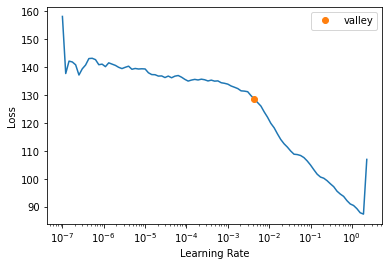

<Figure size 720x720 with 0 Axes>

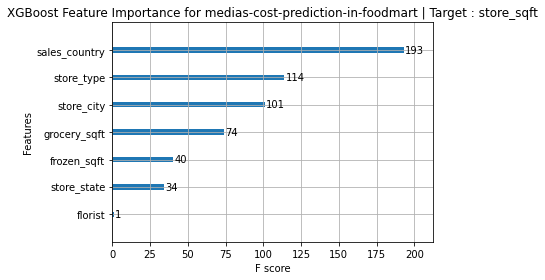

Target Variable: units_per_case
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food

  2%|▏         | 1/42 [00:00<00:28,  1.45it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06428632387769406, 'Adjusted R-Squared': 0.05483228319951983, 'RMSE': 9.51273833861912, 'Time taken': 0.6907913684844971}


  5%|▍         | 2/42 [00:02<00:44,  1.11s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9987109561029686, 'Adjusted R-Squared': 0.9986979321686718, 'RMSE': 0.3530757709047733, 'Time taken': 1.4059810638427734}
{'Model': 'BayesianRidge', 'R-Squared': 0.0011722505346791756, 'Adjusted R-Squared': -0.008919467065374498, 'RMSE': 9.828321674570496, 'Time taken': 0.08643770217895508}


 10%|▉         | 4/42 [00:02<00:20,  1.87it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9993382227260803, 'Adjusted R-Squared': 0.9993315364186903, 'RMSE': 0.25298221281347033, 'Time taken': 0.2975935935974121}
{'Model': 'DummyRegressor', 'R-Squared': -0.0008598982993999194, 'Adjusted R-Squared': -0.010972147840186963, 'RMSE': 9.838314620814126, 'Time taken': 0.027542829513549805}
{'Model': 'ElasticNet', 'R-Squared': -0.000859899970313549, 'Adjusted R-Squared': -0.010972149527982644, 'RMSE': 9.838315, 'Time taken': 0.03472328186035156}


 19%|█▉        | 8/42 [00:03<00:11,  2.95it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.0018668606167180357, 'Adjusted R-Squared': -0.008217838947649492, 'RMSE': 9.8249035, 'Time taken': 0.7608299255371094}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9888635293123202, 'Adjusted R-Squared': 0.9887510112957738, 'RMSE': 1.0377861051295685, 'Time taken': 0.16254067420959473}


 21%|██▏       | 9/42 [00:10<01:02,  1.90s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9984252322139132, 'Adjusted R-Squared': 0.9984093214507297, 'RMSE': 0.39024947149227507, 'Time taken': 6.993189573287964}
{'Model': 'GammaRegressor', 'R-Squared': 0.0009581940331779837, 'Adjusted R-Squared': -0.009135686299904133, 'RMSE': 9.829374760776039, 'Time taken': 0.0906836986541748}


 29%|██▊       | 12/42 [01:58<08:53, 17.77s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.721679531950895, 'Adjusted R-Squared': -3.7693853115108933, 'RMSE': 21.36890735768597, 'Time taken': 107.99389696121216}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0010516199897344647, 'Adjusted R-Squared': -0.009041316408449518, 'RMSE': 9.828915150275172, 'Time taken': 0.15443086624145508}


 31%|███       | 13/42 [02:03<07:05, 14.68s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.44148458475107943, 'Adjusted R-Squared': 0.4358415899013809, 'RMSE': 7.349395932379894, 'Time taken': 4.9512410163879395}


 33%|███▎      | 14/42 [02:05<05:15, 11.28s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9571651523829356, 'Adjusted R-Squared': 0.9567323678654609, 'RMSE': 2.035319884855245, 'Time taken': 1.426938772201538}


 36%|███▌      | 15/42 [02:06<03:50,  8.53s/it]

{'Model': 'HuberRegressor', 'R-Squared': -0.0026440887934546797, 'Adjusted R-Squared': -0.012774365012635736, 'RMSE': 9.847079889300346, 'Time taken': 1.0020546913146973}


 38%|███▊      | 16/42 [02:12<03:25,  7.91s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.12146472642695239, 'Adjusted R-Squared': -0.13279551426657799, 'RMSE': 10.414222966693195, 'Time taken': 6.284714937210083}


 43%|████▎     | 18/42 [02:38<03:43,  9.30s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.8517931529356355, 'Adjusted R-Squared': -3.9008135434679474, 'RMSE': 21.661333, 'Time taken': 25.94855237007141}
{'Model': 'Lars', 'R-Squared': 0.0008559921939479409, 'Adjusted R-Squared': -0.00923892074170296, 'RMSE': 9.82987751976082, 'Time taken': 0.10708284378051758}


 45%|████▌     | 19/42 [02:38<02:34,  6.70s/it]

{'Model': 'LarsCV', 'R-Squared': 0.0018004729017960797, 'Adjusted R-Squared': -0.008284897414932324, 'RMSE': 9.825230379463013, 'Time taken': 0.3916285037994385}
{'Model': 'Lasso', 'R-Squared': -0.000859899970313549, 'Adjusted R-Squared': -0.010972149527982644, 'RMSE': 9.838315, 'Time taken': 0.057298898696899414}


 50%|█████     | 21/42 [02:39<01:20,  3.85s/it]

{'Model': 'LassoCV', 'R-Squared': 0.0019335061858639646, 'Adjusted R-Squared': -0.008150520020896668, 'RMSE': 9.824575, 'Time taken': 0.7858197689056396}
{'Model': 'LassoLars', 'R-Squared': -0.0008598986633983063, 'Adjusted R-Squared': -0.010972148207862853, 'RMSE': 9.838314622603153, 'Time taken': 0.0657505989074707}


 60%|█████▉    | 25/42 [02:40<00:26,  1.57s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.0013606561243365567, 'Adjusted R-Squared': -0.008729157908254015, 'RMSE': 9.82739468887642, 'Time taken': 0.2761960029602051}
{'Model': 'LassoLarsIC', 'R-Squared': 0.002029716351216515, 'Adjusted R-Squared': -0.008053337790220993, 'RMSE': 9.824102098505488, 'Time taken': 0.09752917289733887}
{'Model': 'LinearRegression', 'R-Squared': -0.0011566816093595556, 'Adjusted R-Squared': -0.011271929718572382, 'RMSE': 9.839773, 'Time taken': 0.08012866973876953}


 62%|██████▏   | 26/42 [02:40<00:20,  1.30s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.01302151021071496, 'Adjusted R-Squared': -0.02325663534545308, 'RMSE': 9.897907619394047, 'Time taken': 0.25854969024658203}


 64%|██████▍   | 27/42 [03:14<02:08,  8.59s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.25272483321123895, 'Adjusted R-Squared': 0.24517469260210778, 'RMSE': 8.501084588762946, 'Time taken': 33.538365840911865}


 71%|███████▏  | 30/42 [03:39<01:30,  7.54s/it]

{'Model': 'NuSVR', 'R-Squared': 0.024456368050054134, 'Adjusted R-Squared': 0.014599902963416733, 'RMSE': 9.713089973226996, 'Time taken': 25.51988673210144}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0017557451513474653, 'Adjusted R-Squared': -0.008330077074958586, 'RMSE': 9.825450503555347, 'Time taken': 0.039494991302490234}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.001773451637113732, 'Adjusted R-Squared': -0.00831219169062436, 'RMSE': 9.825363363073386, 'Time taken': 0.14605927467346191}


 74%|███████▍  | 31/42 [03:39<01:04,  5.86s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.5505283867448703, 'Adjusted R-Squared': -1.5762978071716938, 'RMSE': 15.705405111436757, 'Time taken': 0.14829444885253906}


 76%|███████▌  | 32/42 [03:40<00:44,  4.49s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.0006713878949565766, 'Adjusted R-Squared': -0.009425390201583284, 'RMSE': 9.830785573966743, 'Time taken': 0.26389598846435547}


 79%|███████▊  | 33/42 [03:40<00:30,  3.44s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -2.26801509291986, 'Adjusted R-Squared': -2.301033684411851, 'RMSE': 17.777721, 'Time taken': 0.43837523460388184}


 81%|████████  | 34/42 [03:54<00:50,  6.33s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9983356464420171, 'Adjusted R-Squared': 0.9983188305434773, 'RMSE': 0.4011962425048371, 'Time taken': 14.140897750854492}
{'Model': 'Ridge', 'R-Squared': -0.001130929195388708, 'Adjusted R-Squared': -0.01124591711350309, 'RMSE': 9.839646, 'Time taken': 0.07344484329223633}


 86%|████████▌ | 36/42 [03:55<00:21,  3.64s/it]

{'Model': 'RidgeCV', 'R-Squared': -0.0009223410772098983, 'Adjusted R-Squared': -0.011035221512442961, 'RMSE': 9.838621517969926, 'Time taken': 0.21051454544067383}


 88%|████████▊ | 37/42 [03:55<00:14,  2.83s/it]

{'Model': 'SGDRegressor', 'R-Squared': -0.004405196535108846, 'Adjusted R-Squared': -0.014553266214675453, 'RMSE': 9.855724113334594, 'Time taken': 0.21495985984802246}


 90%|█████████ | 38/42 [04:19<00:32,  8.23s/it]

{'Model': 'SVR', 'R-Squared': 0.02884697578758655, 'Adjusted R-Squared': 0.019034871476271475, 'RMSE': 9.691207579005125, 'Time taken': 24.16803550720215}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.0011566816093595556, 'Adjusted R-Squared': -0.011271929718572382, 'RMSE': 9.839773, 'Time taken': 0.051488399505615234}


 95%|█████████▌| 40/42 [04:19<00:09,  4.82s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.0010516199897344647, 'Adjusted R-Squared': -0.009041316408449518, 'RMSE': 9.828915150275172, 'Time taken': 0.18395113945007324}


 98%|█████████▊| 41/42 [04:23<00:04,  4.53s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9964568133540842, 'Adjusted R-Squared': 0.996421014549882, 'RMSE': 0.58537084, 'Time taken': 3.5501163005828857}


100%|██████████| 42/42 [04:23<00:00,  6.28s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9543266501523326, 'Adjusted R-Squared': 0.9538651866529877, 'RMSE': 2.1016746953080077, 'Time taken': 0.7023546695709229}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: units_per_case
units_per_case
Target Standard Deviation: 9.810092723026374
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.25        0.30
BaggingRegressor                             1.00       1.00  0.35        1.41
ExtraTreesRegressor                          1.00       1.00  0.39        6.99
RandomForestRegressor                        1.00       1.00  0.40       14.14
XGBRegressor                                 1.00       1.00  0.59        3.55
ExtraTreeRegressor                           0.99       0.99  1.04        0.16
HistGradientBoostingRegressor             

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,102.545876,101.756424,10.087440,00:13
1,29.610111,26.249264,5.123403,00:13
2,11.008232,16.970730,4.119555,00:13
3,9.932398,26.933764,5.189775,00:13


Better model found at epoch 0 with _rmse value: 10.087440490722656.
Better model found at epoch 1 with _rmse value: 5.123403072357178.
Better model found at epoch 2 with _rmse value: 4.11955451965332.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      17      16.98
1       9       9.09
2       5       5.24
3      28      28.03
4      15      14.30
XGBoost RMSE:  0.58537084


<Figure size 432x288 with 0 Axes>

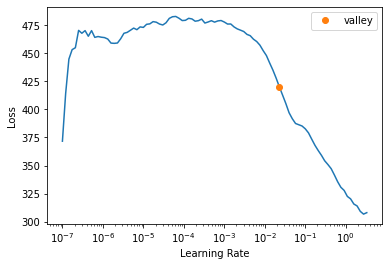

<Figure size 720x720 with 0 Axes>

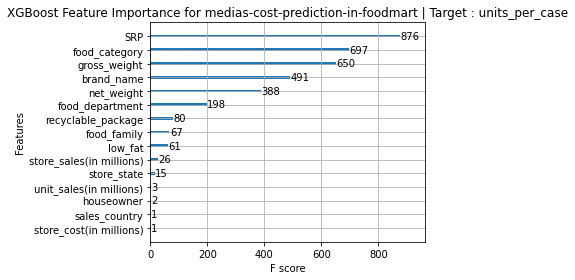

Target Variable: low_fat
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_family

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.1314588185386284, 'Adjusted R-Squared': 0.12268345929173408, 'RMSE': 0.4524735463635186, 'Time taken': 0.08644485473632812}


  7%|▋         | 3/42 [00:01<00:19,  1.99it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9995333441512644, 'Adjusted R-Squared': 0.9995286292651948, 'RMSE': 0.01048808848170152, 'Time taken': 1.4435703754425049}
{'Model': 'BayesianRidge', 'R-Squared': 0.05243620359964296, 'Adjusted R-Squared': 0.04286243450239269, 'RMSE': 0.47260924789570413, 'Time taken': 0.1286015510559082}


 10%|▉         | 4/42 [00:01<00:16,  2.36it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.28273749351501465}
{'Model': 'DummyRegressor', 'R-Squared': -1.6969303590075313e-05, 'Adjusted R-Squared': -0.010120702259423187, 'RMSE': 0.4855139029935188, 'Time taken': 0.029414653778076172}
{'Model': 'ElasticNet', 'R-Squared': -1.696473183931957e-05, 'Adjusted R-Squared': -0.01012069764148138, 'RMSE': 0.48551387, 'Time taken': 0.037285566329956055}


 19%|█▉        | 8/42 [00:02<00:09,  3.62it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.05334865893710872, 'Adjusted R-Squared': 0.0437841088884815, 'RMSE': 0.47238165, 'Time taken': 0.6566531658172607}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15398812294006348}


 24%|██▍       | 10/42 [00:08<00:40,  1.27s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9998326402433398, 'Adjusted R-Squared': 0.9998309493137449, 'RMSE': 0.006280923498976887, 'Time taken': 5.994076728820801}
{'Model': 'GammaRegressor', 'R-Squared': 0.03992857166744057, 'Adjusted R-Squared': 0.030228430941675932, 'RMSE': 0.4757181908112132, 'Time taken': 0.10816502571105957}


 29%|██▊       | 12/42 [01:56<10:51, 21.71s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.741169747175787, 'Adjusted R-Squared': -7.829486693345787, 'RMSE': 1.4354324601010806, 'Time taken': 107.78226232528687}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.04025791710211413, 'Adjusted R-Squared': 0.030561103938205325, 'RMSE': 0.47563658800093267, 'Time taken': 0.14861512184143066}


 31%|███       | 13/42 [02:01<08:10, 16.90s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.49906776094705574, 'Adjusted R-Squared': 0.4940065612597313, 'RMSE': 0.34362715573205255, 'Time taken': 4.78840708732605}


 33%|███▎      | 14/42 [02:03<05:49, 12.49s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9751250334642294, 'Adjusted R-Squared': 0.9748737077098897, 'RMSE': 0.07657363053342972, 'Time taken': 1.646481990814209}


 36%|███▌      | 15/42 [02:04<04:06,  9.12s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.05195302515833855, 'Adjusted R-Squared': 0.0423743742379884, 'RMSE': 0.47272972817238057, 'Time taken': 0.9508416652679443}


 38%|███▊      | 16/42 [02:10<03:33,  8.22s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.027745871951756262, 'Adjusted R-Squared': -0.03812976558097314, 'RMSE': 0.49219914668759845, 'Time taken': 6.077081680297852}


 43%|████▎     | 18/42 [02:35<03:43,  9.33s/it]

{'Model': 'KernelRidge', 'R-Squared': -8.051540116830466, 'Adjusted R-Squared': -8.142992909119736, 'RMSE': 1.460694, 'Time taken': 25.113219261169434}
{'Model': 'Lars', 'R-Squared': 0.05320413712868399, 'Adjusted R-Squared': 0.0436381268950764, 'RMSE': 0.47241770087186713, 'Time taken': 0.12358999252319336}


 45%|████▌     | 19/42 [02:36<02:33,  6.68s/it]

{'Model': 'LarsCV', 'R-Squared': 0.05334644103979291, 'Adjusted R-Squared': 0.04378186858250377, 'RMSE': 0.47238219722456765, 'Time taken': 0.4394502639770508}
{'Model': 'Lasso', 'R-Squared': -1.696473183931957e-05, 'Adjusted R-Squared': -0.01012069764148138, 'RMSE': 0.48551387, 'Time taken': 0.06596016883850098}


 50%|█████     | 21/42 [02:36<01:19,  3.80s/it]

{'Model': 'LassoCV', 'R-Squared': 0.053367560719315144, 'Adjusted R-Squared': 0.04380320164600693, 'RMSE': 0.4723769, 'Time taken': 0.7429013252258301}
{'Model': 'LassoLars', 'R-Squared': -1.6969562522062276e-05, 'Adjusted R-Squared': -0.010120702520971303, 'RMSE': 0.48551390305637526, 'Time taken': 0.06112384796142578}


 60%|█████▉    | 25/42 [02:37<00:26,  1.54s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.053521530358181635, 'Adjusted R-Squared': 0.04395872692658975, 'RMSE': 0.47233851022794243, 'Time taken': 0.2769942283630371}
{'Model': 'LassoLarsIC', 'R-Squared': 0.05319930973378095, 'Adjusted R-Squared': 0.043633250726292094, 'RMSE': 0.47241890522012414, 'Time taken': 0.09099841117858887}
{'Model': 'LinearRegression', 'R-Squared': 0.052946403927289776, 'Adjusted R-Squared': 0.043377789670429934, 'RMSE': 0.472482, 'Time taken': 0.09439778327941895}


 62%|██████▏   | 26/42 [02:38<00:21,  1.37s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.6141996354046304, 'Adjusted R-Squared': -0.6305088007029847, 'RMSE': 0.6168457947556024, 'Time taken': 0.7286314964294434}


 64%|██████▍   | 27/42 [03:11<02:10,  8.72s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.19720109911026207, 'Adjusted R-Squared': 0.18908997103863057, 'RMSE': 0.43501213341469436, 'Time taken': 33.77522540092468}


 67%|██████▋   | 28/42 [05:01<07:47, 33.38s/it]

{'Model': 'NuSVR', 'R-Squared': 0.09389289377531307, 'Adjusted R-Squared': 0.08473798489706419, 'RMSE': 0.46215510443195007, 'Time taken': 109.51648449897766}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.05217658757835142, 'Adjusted R-Squared': 0.0426001954346622, 'RMSE': 0.47267398682408784, 'Time taken': 0.06292009353637695}


 74%|███████▍  | 31/42 [05:01<02:47, 15.26s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.05398100134596773, 'Adjusted R-Squared': 0.04442284020776088, 'RMSE': 0.47222384719323407, 'Time taken': 0.21206116676330566}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.9017585690236445, 'Adjusted R-Squared': -0.9209731036942546, 'RMSE': 0.6695386877922823, 'Time taken': 0.11777949333190918}


 76%|███████▌  | 32/42 [05:01<01:55, 11.55s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.04115894141726295, 'Adjusted R-Squared': 0.03147123180794009, 'RMSE': 0.47541326718851484, 'Time taken': 0.13295745849609375}


 79%|███████▊  | 33/42 [05:02<01:17,  8.67s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [05:14<01:16,  9.53s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9997429150506056, 'Adjusted R-Squared': 0.9997403175770073, 'RMSE': 0.007784600182411428, 'Time taken': 11.857329845428467}
{'Model': 'Ridge', 'R-Squared': 0.052923568456809456, 'Adjusted R-Squared': 0.04335472348036917, 'RMSE': 0.4724877, 'Time taken': 0.05117034912109375}


 88%|████████▊ | 37/42 [05:14<00:20,  4.18s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.05294834893733691, 'Adjusted R-Squared': 0.04337975433200569, 'RMSE': 0.47248151119972753, 'Time taken': 0.20421504974365234}
{'Model': 'SGDRegressor', 'R-Squared': 0.04094361785745826, 'Adjusted R-Squared': 0.03125373271330534, 'RMSE': 0.47546664513354087, 'Time taken': 0.12923502922058105}


 90%|█████████ | 38/42 [05:48<00:46, 11.69s/it]

{'Model': 'SVR', 'R-Squared': 0.08572750677588192, 'Adjusted R-Squared': 0.07649009840786869, 'RMSE': 0.4642327902407001, 'Time taken': 33.86511206626892}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.052946403927289776, 'Adjusted R-Squared': 0.043377789670429934, 'RMSE': 0.472482, 'Time taken': 0.06300997734069824}


 95%|█████████▌| 40/42 [05:48<00:13,  6.83s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.04025791710211413, 'Adjusted R-Squared': 0.030561103938205325, 'RMSE': 0.47563658800093267, 'Time taken': 0.14582324028015137}


 98%|█████████▊| 41/42 [05:52<00:06,  6.03s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9996521677050154, 'Adjusted R-Squared': 0.9996486533600295, 'RMSE': 0.009054885, 'Time taken': 3.355677366256714}


100%|██████████| 42/42 [05:52<00:00,  8.40s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9748299907791683, 'Adjusted R-Squared': 0.9745756840429134, 'RMSE': 0.07702641287916848, 'Time taken': 0.7176225185394287}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: low_fat
low_fat
Target Standard Deviation: 0.4850131441517848
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.28
ExtraTreeRegressor                           1.00       1.00  0.00        0.15
ExtraTreesRegressor                          1.00       1.00  0.01        5.99
RandomForestRegressor                        1.00       1.00  0.01       11.86
XGBRegressor                                 1.00       1.00  0.01        3.36
BaggingRegressor                             1.00       1.00  0.01        1.44
HistGradientBoostingRegressor                0.97     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.492829,0.512249,0.715716,00:13
1,0.078387,0.031652,0.177911,00:13
2,0.023484,0.015032,0.122605,00:14
3,0.017309,0.016247,0.127464,00:13


Better model found at epoch 0 with _rmse value: 0.7157157063484192.
Better model found at epoch 1 with _rmse value: 0.17791114747524261.
Better model found at epoch 2 with _rmse value: 0.12260457128286362.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.01
1       2       1.98
2       2       1.99
3       1       0.99
4       2       2.00
XGBoost RMSE:  0.009054885


<Figure size 432x288 with 0 Axes>

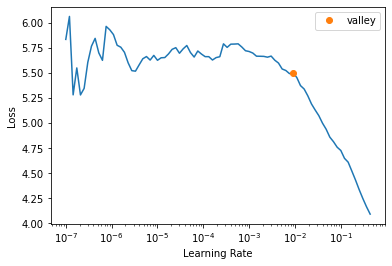

<Figure size 720x720 with 0 Axes>

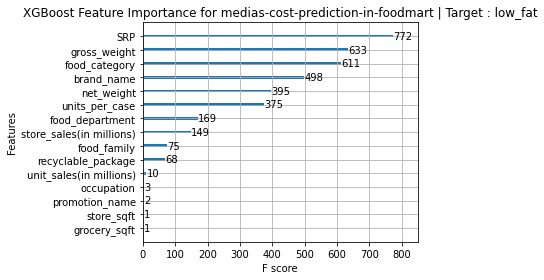

Target Variable: recyclable_package
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', '

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06560926978127057, 'Adjusted R-Squared': 0.05616859556840148, 'RMSE': 0.4783522170369043, 'Time taken': 0.08852052688598633}


  7%|▋         | 3/42 [00:01<00:19,  2.04it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9992547605994991, 'Adjusted R-Squared': 0.9992472310273799, 'RMSE': 0.0135092560861063, 'Time taken': 1.3847675323486328}
{'Model': 'BayesianRidge', 'R-Squared': 0.009431510890775097, 'Adjusted R-Squared': -0.0005767587642813155, 'RMSE': 0.49252217058611436, 'Time taken': 0.14031481742858887}


 10%|▉         | 4/42 [00:02<00:17,  2.21it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9959164964356119, 'Adjusted R-Squared': 0.9958752385061914, 'RMSE': 0.03162277660168379, 'Time taken': 0.386000394821167}
{'Model': 'DummyRegressor', 'R-Squared': -0.00011255156699352398, 'Adjusted R-Squared': -0.010217250244103804, 'RMSE': 0.49488919214304933, 'Time taken': 0.03949546813964844}
{'Model': 'ElasticNet', 'R-Squared': -0.00011255682555955104, 'Adjusted R-Squared': -0.010217255555799998, 'RMSE': 0.49488923, 'Time taken': 0.04460620880126953}


 17%|█▋        | 7/42 [00:03<00:15,  2.30it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.00877157139186202, 'Adjusted R-Squared': -0.0012433660025115145, 'RMSE': 0.49268624, 'Time taken': 1.1768419742584229}


 19%|█▉        | 8/42 [00:03<00:12,  2.62it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9969373723267089, 'Adjusted R-Squared': 0.9969064288796435, 'RMSE': 0.027386127875258306, 'Time taken': 0.19905734062194824}


 21%|██▏       | 9/42 [00:09<01:00,  1.83s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.999733857655191, 'Adjusted R-Squared': 0.999731168669641, 'RMSE': 0.008073103492461875, 'Time taken': 6.291121006011963}
{'Model': 'GammaRegressor', 'R-Squared': 0.009223223561796723, 'Adjusted R-Squared': -0.0007871505370988796, 'RMSE': 0.49257394930528403, 'Time taken': 0.09453487396240234}


 29%|██▊       | 12/42 [01:59<09:09, 18.33s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -9.693410446330452, 'Adjusted R-Squared': -9.801451976477765, 'RMSE': 1.6182352190050615, 'Time taken': 109.77781319618225}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.009120734346408699, 'Adjusted R-Squared': -0.0008906752585782218, 'RMSE': 0.49259942538289686, 'Time taken': 0.14661717414855957}


 31%|███       | 13/42 [02:04<07:17, 15.09s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.47574752624648686, 'Adjusted R-Squared': 0.47045070913354414, 'RMSE': 0.35830574755288513, 'Time taken': 5.088963031768799}


 33%|███▎      | 14/42 [02:06<05:22, 11.50s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9717768154197981, 'Adjusted R-Squared': 0.9714916607385129, 'RMSE': 0.08313550486813882, 'Time taken': 1.2597062587738037}


 36%|███▌      | 15/42 [02:06<03:51,  8.59s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0041803894955351195, 'Adjusted R-Squared': -0.00588093518751065, 'RMSE': 0.49382590436540963, 'Time taken': 0.7152581214904785}


 38%|███▊      | 16/42 [02:13<03:28,  8.03s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.09490981071940152, 'Adjusted R-Squared': -0.10597229933490437, 'RMSE': 0.5178127074531872, 'Time taken': 6.579078674316406}


 43%|████▎     | 18/42 [02:38<03:41,  9.22s/it]

{'Model': 'KernelRidge', 'R-Squared': -10.093820863506638, 'Adjusted R-Squared': -10.205907964931306, 'RMSE': 1.6482539, 'Time taken': 25.220881700515747}
{'Model': 'Lars', 'R-Squared': 0.008739236275872253, 'Adjusted R-Squared': -0.0012760278183345797, 'RMSE': 0.49269424402126233, 'Time taken': 0.11755585670471191}


 45%|████▌     | 19/42 [02:39<02:32,  6.63s/it]

{'Model': 'LarsCV', 'R-Squared': 0.01040343493982443, 'Adjusted R-Squared': 0.00040498517917608723, 'RMSE': 0.4922804853183954, 'Time taken': 0.3389558792114258}
{'Model': 'Lasso', 'R-Squared': -0.00011255682555955104, 'Adjusted R-Squared': -0.010217255555799998, 'RMSE': 0.49488923, 'Time taken': 0.07403039932250977}


 52%|█████▏    | 22/42 [02:40<00:58,  2.90s/it]

{'Model': 'LassoCV', 'R-Squared': 0.00881260139805784, 'Adjusted R-Squared': -0.0012019214471246098, 'RMSE': 0.49267602, 'Time taken': 0.7875096797943115}
{'Model': 'LassoLars', 'R-Squared': -0.00011255328440085144, 'Adjusted R-Squared': -0.010217251978863029, 'RMSE': 0.49488919256796465, 'Time taken': 0.12128090858459473}


 60%|█████▉    | 25/42 [02:40<00:22,  1.30s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.01040343493982443, 'Adjusted R-Squared': 0.00040498517917608723, 'RMSE': 0.4922804853183954, 'Time taken': 0.22851014137268066}
{'Model': 'LassoLarsIC', 'R-Squared': 0.009771517148539965, 'Adjusted R-Squared': -0.00023331723237896007, 'RMSE': 0.4924376357991005, 'Time taken': 0.08806324005126953}
{'Model': 'LinearRegression', 'R-Squared': 0.005729535713375089, 'Adjusted R-Squared': -0.004316137075577764, 'RMSE': 0.49344164, 'Time taken': 0.0702812671661377}


 62%|██████▏   | 26/42 [02:41<00:18,  1.16s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.7497719111950016, 'Adjusted R-Squared': -0.7674508393202351, 'RMSE': 0.6545973620064044, 'Time taken': 0.6716728210449219}


 64%|██████▍   | 27/42 [03:15<02:21,  9.43s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.25834697142129504, 'Adjusted R-Squared': 0.2508536344313612, 'RMSE': 0.42617102370917326, 'Time taken': 34.26599168777466}


 67%|██████▋   | 28/42 [06:10<12:23, 53.10s/it]

{'Model': 'NuSVR', 'R-Squared': 0.06161020455003774, 'Adjusted R-Squared': 0.05212912553564064, 'RMSE': 0.47937476532531564, 'Time taken': 175.42346382141113}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.009027934216206734, 'Adjusted R-Squared': -0.000984413000603368, 'RMSE': 0.49262249187653323, 'Time taken': 0.06412696838378906}


 74%|███████▍  | 31/42 [06:11<04:15, 23.27s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.008244197816956622, 'Adjusted R-Squared': -0.0017760679287674996, 'RMSE': 0.49281725512206903, 'Time taken': 0.19499707221984863}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.6537506313100752, 'Adjusted R-Squared': -0.6704594025281612, 'RMSE': 0.6363829595162049, 'Time taken': 0.1115412712097168}


 76%|███████▌  | 32/42 [06:11<02:54, 17.46s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.010056377254247573, 'Adjusted R-Squared': 5.442097492713849e-05, 'RMSE': 0.4923668006690297, 'Time taken': 0.1277329921722412}


 79%|███████▊  | 33/42 [06:11<01:56, 12.96s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [06:24<00:43,  7.31s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9993623609184208, 'Adjusted R-Squared': 0.9993559184927417, 'RMSE': 0.012495999359795118, 'Time taken': 12.984840869903564}
{'Model': 'Ridge', 'R-Squared': 0.00573100342682642, 'Adjusted R-Squared': -0.0043146545329932895, 'RMSE': 0.4934413, 'Time taken': 0.03791046142578125}
{'Model': 'RidgeCV', 'R-Squared': 0.006066699701852363, 'Adjusted R-Squared': -0.003975566530005636, 'RMSE': 0.49335797303792267, 'Time taken': 0.10474443435668945}


 88%|████████▊ | 37/42 [06:25<00:27,  5.60s/it]

{'Model': 'SGDRegressor', 'R-Squared': -0.017030769995938444, 'Adjusted R-Squared': -0.027306402933507723, 'RMSE': 0.4990574886173664, 'Time taken': 0.14784622192382812}


 90%|█████████ | 38/42 [07:00<00:52, 13.08s/it]

{'Model': 'SVR', 'R-Squared': 0.029582304306390084, 'Adjusted R-Squared': 0.01977762943199146, 'RMSE': 0.48748682654877223, 'Time taken': 35.00539040565491}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.005729535713375089, 'Adjusted R-Squared': -0.004316137075577764, 'RMSE': 0.49344164, 'Time taken': 0.09467864036560059}


 95%|█████████▌| 40/42 [07:00<00:15,  7.64s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.009120734346408699, 'Adjusted R-Squared': -0.0008906752585782218, 'RMSE': 0.49259942538289686, 'Time taken': 0.23444247245788574}


 98%|█████████▊| 41/42 [07:03<00:06,  6.69s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9993413653969166, 'Adjusted R-Squared': 0.9993347108416948, 'RMSE': 0.01270006, 'Time taken': 3.5232768058776855}


100%|██████████| 42/42 [07:04<00:00, 10.11s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9739894198376198, 'Adjusted R-Squared': 0.9737266203411572, 'RMSE': 0.0798102277415615, 'Time taken': 0.6969118118286133}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: recyclable_package
recyclable_package
Target Standard Deviation: 0.49407432386231115
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          1.00       1.00  0.01        6.29
RandomForestRegressor                        1.00       1.00  0.01       12.98
XGBRegressor                                 1.00       1.00  0.01        3.52
BaggingRegressor                             1.00       1.00  0.01        1.38
ExtraTreeRegressor                           1.00       1.00  0.03        0.20
DecisionTreeRegressor                        1.00       1.00  0.03        0.39
LGBMRegressor                   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.915277,0.449614,0.670533,00:13
1,0.144242,0.100529,0.317063,00:13
2,0.035739,0.079284,0.281575,00:12
3,0.018914,0.035738,0.189046,00:13
4,0.006937,0.000721,0.026854,00:13
5,0.002713,0.001800,0.042425,00:13


Better model found at epoch 0 with _rmse value: 0.670532763004303.
Better model found at epoch 1 with _rmse value: 0.31706273555755615.
Better model found at epoch 2 with _rmse value: 0.28157469630241394.
Better model found at epoch 3 with _rmse value: 0.18904602527618408.
Better model found at epoch 4 with _rmse value: 0.026854239404201508.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       2       1.99
2       1       1.01
3       2       2.01
4       1       1.00
XGBoost RMSE:  0.01270006


<Figure size 432x288 with 0 Axes>

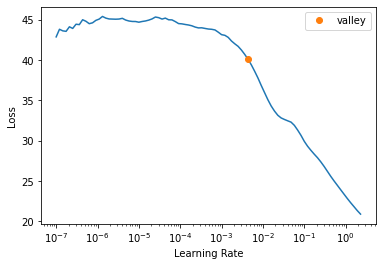

<Figure size 720x720 with 0 Axes>

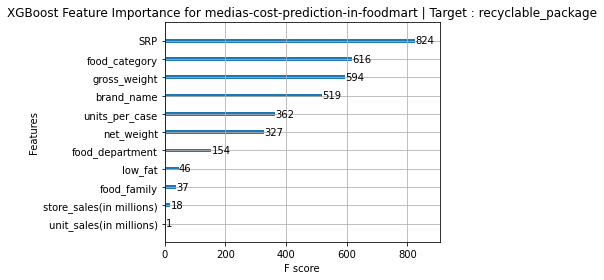

Target Variable: net_weight
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_fam

  2%|▏         | 1/42 [00:00<00:30,  1.33it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9678440269576114, 'Adjusted R-Squared': 0.9675191371062106, 'RMSE': 9.253795156596013, 'Time taken': 0.7540357112884521}


  7%|▋         | 3/42 [00:01<00:21,  1.82it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9999954638351721, 'Adjusted R-Squared': 0.9999954180037518, 'RMSE': 0.10990905331227273, 'Time taken': 1.0301239490509033}
{'Model': 'BayesianRidge', 'R-Squared': 0.9603561499615777, 'Adjusted R-Squared': 0.9599556058844024, 'RMSE': 10.274884910875757, 'Time taken': 0.10928654670715332}


 10%|▉         | 4/42 [00:02<00:16,  2.27it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9999897673434139, 'Adjusted R-Squared': 0.9999896639571387, 'RMSE': 0.1650757401921918, 'Time taken': 0.27199244499206543}
{'Model': 'DummyRegressor', 'R-Squared': -9.822160570882588e-05, 'Adjusted R-Squared': -0.01020277549917381, 'RMSE': 51.607210051056875, 'Time taken': 0.02734518051147461}
{'Model': 'ElasticNet', 'R-Squared': 0.849637144568978, 'Adjusted R-Squared': 0.8481179442109985, 'RMSE': 20.010565, 'Time taken': 0.03712129592895508}


 19%|█▉        | 8/42 [00:02<00:08,  4.18it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9581148992325637, 'Adjusted R-Squared': 0.9576917105407987, 'RMSE': 10.561336, 'Time taken': 0.4094054698944092}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9999991551017497, 'Adjusted R-Squared': 0.9999991465652683, 'RMSE': 0.04743416490252569, 'Time taken': 0.15584444999694824}


 24%|██▍       | 10/42 [00:09<00:42,  1.34s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999985931786991, 'Adjusted R-Squared': 0.9999985789647936, 'RMSE': 0.06120804685660218, 'Time taken': 6.429293394088745}
{'Model': 'GammaRegressor', 'R-Squared': 0.7345910874517733, 'Adjusted R-Squared': 0.7319095121797528, 'RMSE': 26.585620740694896, 'Time taken': 0.10060405731201172}


 29%|██▊       | 12/42 [01:55<10:47, 21.58s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.758038691440625, 'Adjusted R-Squared': -5.826318951015675, 'RMSE': 134.15269160090958, 'Time taken': 106.38739323616028}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7208424757168995, 'Adjusted R-Squared': 0.7180219905006016, 'RMSE': 27.26551610316299, 'Time taken': 0.17670774459838867}


 31%|███       | 13/42 [02:00<08:06, 16.76s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9856212873092377, 'Adjusted R-Squared': 0.9854760111011976, 'RMSE': 6.187982212885895, 'Time taken': 4.706695556640625}


 33%|███▎      | 14/42 [02:01<05:42, 12.24s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9993011376316572, 'Adjusted R-Squared': 0.9992940766327348, 'RMSE': 1.3642214743708705, 'Time taken': 1.1568543910980225}


 36%|███▌      | 15/42 [02:02<04:02,  8.99s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9601660659639751, 'Adjusted R-Squared': 0.9597636013614389, 'RMSE': 10.299488419698868, 'Time taken': 1.1195690631866455}


 38%|███▊      | 16/42 [02:09<03:38,  8.40s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5447004123084098, 'Adjusted R-Squared': 0.5401002649207707, 'RMSE': 34.8207148117324, 'Time taken': 7.001067161560059}


 43%|████▎     | 18/42 [02:34<03:44,  9.34s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.0803041360531696, 'Adjusted R-Squared': -5.141736862863507, 'RMSE': 127.248215, 'Time taken': 24.736555337905884}
{'Model': 'Lars', 'R-Squared': 0.9603711715652105, 'Adjusted R-Squared': 0.9599707792597314, 'RMSE': 10.272938078365643, 'Time taken': 0.10096168518066406}


 45%|████▌     | 19/42 [02:35<02:33,  6.66s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9604888888513198, 'Adjusted R-Squared': 0.9600896859096811, 'RMSE': 10.257668868649818, 'Time taken': 0.377335786819458}
{'Model': 'Lasso', 'R-Squared': 0.9599306077113734, 'Adjusted R-Squared': 0.9595257641419, 'RMSE': 10.329884, 'Time taken': 0.06532144546508789}


 52%|█████▏    | 22/42 [02:35<00:56,  2.82s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9604866179346542, 'Adjusted R-Squared': 0.9600873920486693, 'RMSE': 10.257963, 'Time taken': 0.41824793815612793}
{'Model': 'LassoLars', 'R-Squared': -9.822073829712785e-05, 'Adjusted R-Squared': -0.010202774622998234, 'RMSE': 51.607210028676725, 'Time taken': 0.12088918685913086}


 60%|█████▉    | 25/42 [02:36<00:21,  1.28s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9604888888513198, 'Adjusted R-Squared': 0.9600896859096811, 'RMSE': 10.257668868649818, 'Time taken': 0.2857363224029541}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9604226920923186, 'Adjusted R-Squared': 0.960022820327654, 'RMSE': 10.26625810144494, 'Time taken': 0.0823979377746582}
{'Model': 'LinearRegression', 'R-Squared': 0.9603553333042565, 'Adjusted R-Squared': 0.9599547809759338, 'RMSE': 10.274991, 'Time taken': 0.09498929977416992}


 62%|██████▏   | 26/42 [02:36<00:17,  1.11s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9602356508546935, 'Adjusted R-Squared': 0.9598338893073806, 'RMSE': 10.290488529799248, 'Time taken': 0.5634570121765137}


 64%|██████▍   | 27/42 [03:10<02:18,  9.21s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9647472353447639, 'Adjusted R-Squared': 0.9643910568688333, 'RMSE': 9.689149223105545, 'Time taken': 33.43793797492981}


 71%|███████▏  | 30/42 [03:35<01:32,  7.74s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9175722539813047, 'Adjusted R-Squared': 0.9167394401796508, 'RMSE': 14.81582248307302, 'Time taken': 25.450963497161865}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9604669075127659, 'Adjusted R-Squared': 0.9600674824813212, 'RMSE': 10.260521812217101, 'Time taken': 0.04065060615539551}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.960469050724527, 'Adjusted R-Squared': 0.9600696473471543, 'RMSE': 10.260243681065568, 'Time taken': 0.1435408592224121}


 74%|███████▍  | 31/42 [03:35<01:05,  5.95s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9407731257187206, 'Adjusted R-Squared': 0.9401747233516453, 'RMSE': 12.558809137905618, 'Time taken': 0.11963582038879395}


 76%|███████▌  | 32/42 [03:36<00:45,  4.58s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9075512062065536, 'Adjusted R-Squared': 0.9066171441323586, 'RMSE': 15.690604595721686, 'Time taken': 0.49215197563171387}


 79%|███████▊  | 33/42 [03:36<00:31,  3.45s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.959323573785884, 'Adjusted R-Squared': 0.9589125970118085, 'RMSE': 10.407836, 'Time taken': 0.30106210708618164}


 81%|████████  | 34/42 [03:47<00:43,  5.50s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999971443659551, 'Adjusted R-Squared': 0.9999971155138809, 'RMSE': 0.08720478771260208, 'Time taken': 10.922686576843262}
{'Model': 'Ridge', 'R-Squared': 0.9603559018401862, 'Adjusted R-Squared': 0.9599553552561011, 'RMSE': 10.274917, 'Time taken': 0.0672292709350586}


 86%|████████▌ | 36/42 [03:47<00:18,  3.15s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9603602436530079, 'Adjusted R-Squared': 0.9599597409366958, 'RMSE': 10.274354396127883, 'Time taken': 0.21564698219299316}


 88%|████████▊ | 37/42 [03:48<00:12,  2.45s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9599839560530502, 'Adjusted R-Squared': 0.9595796514918282, 'RMSE': 10.323004802433875, 'Time taken': 0.21844959259033203}


 95%|█████████▌| 40/42 [04:11<00:09,  4.54s/it]

{'Model': 'SVR', 'R-Squared': 0.92139631603618, 'Adjusted R-Squared': 0.9206021388806981, 'RMSE': 14.46806676243005, 'Time taken': 23.398024797439575}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9603553333042565, 'Adjusted R-Squared': 0.9599547809759338, 'RMSE': 10.274991, 'Time taken': 0.047163963317871094}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7208424757168995, 'Adjusted R-Squared': 0.7180219905006016, 'RMSE': 27.26551610316299, 'Time taken': 0.1196293830871582}


 98%|█████████▊| 41/42 [04:15<00:04,  4.36s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999962183931346, 'Adjusted R-Squared': 0.999996180185437, 'RMSE': 0.10035227, 'Time taken': 3.7781832218170166}


100%|██████████| 42/42 [04:16<00:00,  6.10s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9993031286006542, 'Adjusted R-Squared': 0.9992960877176095, 'RMSE': 1.3622768426270873, 'Time taken': 0.7480473518371582}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: net_weight
net_weight
Target Standard Deviation: 51.49799432650114
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreeRegressor                           1.00       1.00   0.05   
ExtraTreesRegressor                          1.00       1.00   0.06   
RandomForestRegressor                        1.00       1.00   0.09   
XGBRegressor                                 1.00       1.00   0.10   
BaggingRegressor                             1.00       1.00   0.11   
DecisionTreeRegressor                        1.00       1.00   0.17   
LGBMRegressor                                1.00       1.00   1.36   
HistGradientBoostingRegressor              

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3247.999023,3851.750244,62.062466,00:13
1,2203.507324,2130.946045,46.162174,00:13
2,767.534485,836.126038,28.915840,00:13
3,322.359924,867.667358,29.456194,00:13


Better model found at epoch 0 with _rmse value: 62.06246566772461.
Better model found at epoch 1 with _rmse value: 46.162174224853516.
Better model found at epoch 2 with _rmse value: 28.91584014892578.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     166     165.95
1      78      77.96
2     141     140.97
3     105     105.01
4     153     153.01
XGBoost RMSE:  0.10035227


<Figure size 432x288 with 0 Axes>

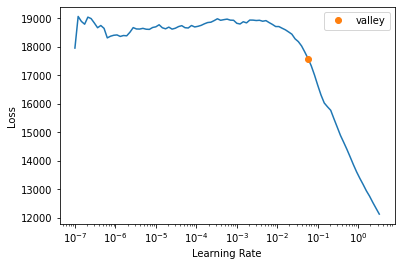

<Figure size 720x720 with 0 Axes>

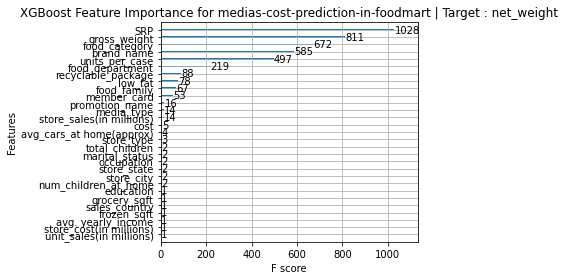

Target Variable: gross_weight
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_f

  2%|▏         | 1/42 [00:00<00:36,  1.14it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9644453474952249, 'Adjusted R-Squared': 0.9640861188768387, 'RMSE': 11.151820134918884, 'Time taken': 0.8784298896789551}


  7%|▋         | 3/42 [00:02<00:24,  1.60it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.999998889302104, 'Adjusted R-Squared': 0.9999988780800995, 'RMSE': 0.06232976816898947, 'Time taken': 1.0503590106964111}
{'Model': 'BayesianRidge', 'R-Squared': 0.9591953901457885, 'Adjusted R-Squared': 0.9587831182604214, 'RMSE': 11.946815366012569, 'Time taken': 0.19643616676330566}


 14%|█▍        | 6/42 [00:02<00:09,  3.82it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9999997141060757, 'Adjusted R-Squared': 0.9999997112175288, 'RMSE': 0.03162277660168379, 'Time taken': 0.2917189598083496}
{'Model': 'DummyRegressor', 'R-Squared': -0.00016116395438658948, 'Adjusted R-Squared': -0.010266353789742722, 'RMSE': 59.14697396452464, 'Time taken': 0.038626909255981445}
{'Model': 'ElasticNet', 'R-Squared': 0.8495121912080007, 'Adjusted R-Squared': 0.8479917283760533, 'RMSE': 22.942894, 'Time taken': 0.06864523887634277}


 19%|█▉        | 8/42 [00:03<00:09,  3.45it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9563914473541362, 'Adjusted R-Squared': 0.9559508456603159, 'RMSE': 12.350467, 'Time taken': 0.5305449962615967}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9999825604706163, 'Adjusted R-Squared': 0.9999823842692586, 'RMSE': 0.2469817807045694, 'Time taken': 0.16820287704467773}


 21%|██▏       | 9/42 [00:09<01:06,  2.02s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999988236537116, 'Adjusted R-Squared': 0.9999988117684245, 'RMSE': 0.06414534277716513, 'Time taken': 6.314976453781128}
{'Model': 'GammaRegressor', 'R-Squared': 0.7366120522038475, 'Adjusted R-Squared': 0.7339508958734999, 'RMSE': 30.35257117741054, 'Time taken': 0.09807085990905762}


 29%|██▊       | 12/42 [01:57<09:39, 19.32s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.6320825231150815, 'Adjusted R-Squared': -5.6990901767964655, 'RMSE': 152.3079236930264, 'Time taken': 108.03517413139343}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7207005582452561, 'Adjusted R-Squared': 0.7178786391570546, 'RMSE': 31.255940451895956, 'Time taken': 0.1952526569366455}


 31%|███       | 13/42 [02:02<07:30, 15.55s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9858550206126386, 'Adjusted R-Squared': 0.9857121059434054, 'RMSE': 7.033940599337594, 'Time taken': 4.712206840515137}


 33%|███▎      | 14/42 [02:05<05:37, 12.05s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9992719469556938, 'Adjusted R-Squared': 0.9992645910269814, 'RMSE': 1.5958021581371222, 'Time taken': 2.549225330352783}


 36%|███▌      | 15/42 [02:06<04:03,  9.00s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9591375248301182, 'Adjusted R-Squared': 0.9587246682989752, 'RMSE': 11.955283298090519, 'Time taken': 1.0790796279907227}


 38%|███▊      | 16/42 [02:12<03:31,  8.15s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5381855377535196, 'Adjusted R-Squared': 0.5335195669301149, 'RMSE': 40.19123038673984, 'Time taken': 6.017538070678711}


 43%|████▎     | 18/42 [02:37<03:43,  9.33s/it]

{'Model': 'KernelRidge', 'R-Squared': -4.922788413827367, 'Adjusted R-Squared': -4.982629670850123, 'RMSE': 143.93309, 'Time taken': 25.37749934196472}
{'Model': 'Lars', 'R-Squared': 0.9591615713568387, 'Adjusted R-Squared': 0.9587489577812573, 'RMSE': 11.951765090436105, 'Time taken': 0.1250290870666504}


 45%|████▌     | 19/42 [02:38<02:33,  6.69s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9593907262177278, 'Adjusted R-Squared': 0.9589804279223777, 'RMSE': 11.918185714234827, 'Time taken': 0.3364381790161133}
{'Model': 'Lasso', 'R-Squared': 0.9591120631737009, 'Adjusted R-Squared': 0.9586989493891462, 'RMSE': 11.959007, 'Time taken': 0.08245062828063965}


 50%|█████     | 21/42 [02:38<01:18,  3.76s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9593880137477139, 'Adjusted R-Squared': 0.9589776880467562, 'RMSE': 11.918584, 'Time taken': 0.4821004867553711}
{'Model': 'LassoLars', 'R-Squared': -0.00016116227741647116, 'Adjusted R-Squared': -0.010266352095829268, 'RMSE': 59.14697391493878, 'Time taken': 0.062104225158691406}


 60%|█████▉    | 25/42 [02:39<00:26,  1.54s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9593907262177278, 'Adjusted R-Squared': 0.9589804279223777, 'RMSE': 11.918185714234827, 'Time taken': 0.3226938247680664}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9592983976977018, 'Adjusted R-Squared': 0.9588871665554709, 'RMSE': 11.931726509231648, 'Time taken': 0.09099388122558594}
{'Model': 'LinearRegression', 'R-Squared': 0.9591934744045673, 'Adjusted R-Squared': 0.9587811831633909, 'RMSE': 11.947096, 'Time taken': 0.09297871589660645}


 62%|██████▏   | 26/42 [02:39<00:21,  1.32s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9587417356457265, 'Adjusted R-Squared': 0.9583248802342158, 'RMSE': 12.013042515002493, 'Time taken': 0.47303318977355957}


 64%|██████▍   | 27/42 [03:12<02:07,  8.49s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9607923728567731, 'Adjusted R-Squared': 0.9603962361844495, 'RMSE': 11.710698953092217, 'Time taken': 32.99908089637756}


 71%|███████▏  | 30/42 [03:37<01:28,  7.34s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9038124542627997, 'Adjusted R-Squared': 0.9028406174783874, 'RMSE': 18.342433736215174, 'Time taken': 24.456379413604736}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9593072505057725, 'Adjusted R-Squared': 0.9588961088084325, 'RMSE': 11.930428832689246, 'Time taken': 0.03963470458984375}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9593275828940482, 'Adjusted R-Squared': 0.9589166466262437, 'RMSE': 11.927447903373466, 'Time taken': 0.1428680419921875}


 74%|███████▍  | 31/42 [03:37<01:02,  5.70s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9372681527935265, 'Adjusted R-Squared': 0.9366343377169266, 'RMSE': 14.812950616130339, 'Time taken': 0.12124228477478027}


 79%|███████▊  | 33/42 [03:38<00:29,  3.32s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9132819797935597, 'Adjusted R-Squared': 0.9124058189427748, 'RMSE': 17.41615231036992, 'Time taken': 0.4745340347290039}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9587214711080305, 'Adjusted R-Squared': 0.9583044109525168, 'RMSE': 12.015992, 'Time taken': 0.17652177810668945}


 81%|████████  | 34/42 [03:48<00:42,  5.34s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999979023390985, 'Adjusted R-Squared': 0.9999978811452526, 'RMSE': 0.08565745735194322, 'Time taken': 10.79879379272461}
{'Model': 'Ridge', 'R-Squared': 0.9591947958345914, 'Adjusted R-Squared': 0.9587825179445646, 'RMSE': 11.946902, 'Time taken': 0.0668342113494873}


 88%|████████▊ | 37/42 [03:49<00:11,  2.39s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9592054594141028, 'Adjusted R-Squared': 0.9587932892642075, 'RMSE': 11.94534122973179, 'Time taken': 0.19532346725463867}
{'Model': 'SGDRegressor', 'R-Squared': 0.958839127218505, 'Adjusted R-Squared': 0.9584232558087399, 'RMSE': 11.998855534805397, 'Time taken': 0.19802427291870117}


 90%|█████████ | 38/42 [04:13<00:31,  7.79s/it]

{'Model': 'SVR', 'R-Squared': 0.9151990696976748, 'Adjusted R-Squared': 0.9143422782826476, 'RMSE': 17.22256550804862, 'Time taken': 23.713562488555908}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9591934744045673, 'Adjusted R-Squared': 0.9587811831633909, 'RMSE': 11.947096, 'Time taken': 0.07518601417541504}


 95%|█████████▌| 40/42 [04:13<00:09,  4.58s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7207005582452561, 'Adjusted R-Squared': 0.7178786391570546, 'RMSE': 31.255940451895956, 'Time taken': 0.20374274253845215}


 98%|█████████▊| 41/42 [04:17<00:04,  4.35s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999880161605386, 'Adjusted R-Squared': 0.9999878950810795, 'RMSE': 0.2047366, 'Time taken': 3.5752975940704346}


100%|██████████| 42/42 [04:17<00:00,  6.14s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9993144721042115, 'Adjusted R-Squared': 0.9993075458309527, 'RMSE': 1.5484960539165566, 'Time taken': 0.7341833114624023}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: gross_weight
gross_weight
Target Standard Deviation: 59.63159087914177
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
DecisionTreeRegressor                        1.00       1.00   0.03   
BaggingRegressor                             1.00       1.00   0.06   
ExtraTreesRegressor                          1.00       1.00   0.06   
RandomForestRegressor                        1.00       1.00   0.09   
XGBRegressor                                 1.00       1.00   0.20   
ExtraTreeRegressor                           1.00       1.00   0.25   
LGBMRegressor                                1.00       1.00   1.55   
HistGradientBoostingRegressor          

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4316.345703,4991.547363,70.650887,00:12
1,3587.178955,3357.547607,57.944355,00:13
2,456.761261,131.463226,11.465741,00:12
3,219.404877,815.624695,28.559141,00:12


Better model found at epoch 0 with _rmse value: 70.65088653564453.
Better model found at epoch 1 with _rmse value: 57.94435501098633.
Better model found at epoch 2 with _rmse value: 11.465741157531738.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      99      98.71
1      44      44.19
2     165     164.93
3     167     166.94
4     141     140.69
XGBoost RMSE:  0.2047369


<Figure size 432x288 with 0 Axes>

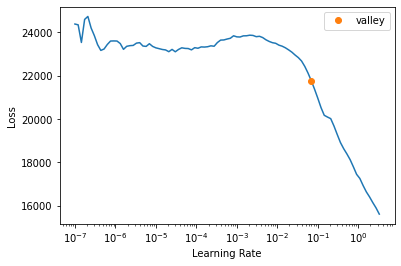

<Figure size 720x720 with 0 Axes>

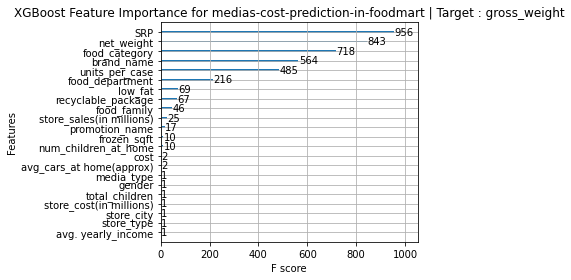

Target Variable: SRP
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food_family', '

  2%|▏         | 1/42 [00:02<01:53,  2.77s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9004746417359484, 'Adjusted R-Squared': 0.8994690811573776, 'RMSE': 22.416698402490894, 'Time taken': 2.7671823501586914}


  5%|▍         | 2/42 [00:03<01:11,  1.78s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9774937097455588, 'Adjusted R-Squared': 0.977266316057714, 'RMSE': 10.659988391175666, 'Time taken': 1.0880458354949951}
{'Model': 'BayesianRidge', 'R-Squared': 0.8990996898141127, 'Adjusted R-Squared': 0.8980802373242326, 'RMSE': 22.571011636507407, 'Time taken': 0.0837857723236084}


 10%|▉         | 4/42 [00:04<00:29,  1.29it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9775020979595875, 'Adjusted R-Squared': 0.977274789022579, 'RMSE': 10.658001688872075, 'Time taken': 0.2660181522369385}
{'Model': 'DummyRegressor', 'R-Squared': -3.0791885752279313e-06, 'Adjusted R-Squared': -0.010106671804776868, 'RMSE': 71.05676682350638, 'Time taken': 0.028272151947021484}
{'Model': 'ElasticNet', 'R-Squared': 0.8194264828413438, 'Adjusted R-Squared': 0.8176020472044794, 'RMSE': 30.194777, 'Time taken': 0.0381770133972168}


 19%|█▉        | 8/42 [00:04<00:12,  2.69it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.919215709002796, 'Adjusted R-Squared': 0.9183994999500332, 'RMSE': 20.196135, 'Time taken': 0.4104914665222168}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.98414770644835, 'Adjusted R-Squared': 0.9839875418254488, 'RMSE': 8.946451810634203, 'Time taken': 0.18787646293640137}


 24%|██▍       | 10/42 [00:12<00:51,  1.61s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9829548865787969, 'Adjusted R-Squared': 0.9827826702269787, 'RMSE': 9.276939444127034, 'Time taken': 7.778242111206055}
{'Model': 'GammaRegressor', 'R-Squared': 0.7009004569873807, 'Adjusted R-Squared': 0.6978784863583065, 'RMSE': 38.860881594114375, 'Time taken': 0.12149977684020996}


 29%|██▊       | 12/42 [01:59<10:38, 21.30s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.958242676294265, 'Adjusted R-Squared': -2.998235024627624, 'RMSE': 141.36958478555, 'Time taken': 106.34218287467957}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7157451639414909, 'Adjusted R-Squared': 0.7128731777221577, 'RMSE': 37.88425097498474, 'Time taken': 0.19562745094299316}


 31%|███       | 13/42 [02:04<08:05, 16.75s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9641405248391474, 'Adjusted R-Squared': 0.9637782164263072, 'RMSE': 13.455713715087184, 'Time taken': 5.114931106567383}


 33%|███▎      | 14/42 [02:05<05:45, 12.34s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9768203073580283, 'Adjusted R-Squared': 0.9765861099077431, 'RMSE': 10.818289784344385, 'Time taken': 1.3720567226409912}


 36%|███▌      | 15/42 [02:06<04:04,  9.05s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8961791777037333, 'Adjusted R-Squared': 0.8951302176401186, 'RMSE': 22.895335196796882, 'Time taken': 0.9973092079162598}


 38%|███▊      | 16/42 [02:13<03:35,  8.27s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5743840859175002, 'Adjusted R-Squared': 0.5700838493518776, 'RMSE': 46.3568271131664, 'Time taken': 6.402180433273315}


 40%|████      | 17/42 [02:38<05:33, 13.33s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.2300977255739047, 'Adjusted R-Squared': -2.262733216612792, 'RMSE': 127.70638, 'Time taken': 25.409040689468384}
{'Model': 'Lars', 'R-Squared': 0.8992414866505235, 'Adjusted R-Squared': 0.8982234668137014, 'RMSE': 22.555146356918875, 'Time taken': 0.06980657577514648}


 45%|████▌     | 19/42 [02:39<02:48,  7.34s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8993330960581236, 'Adjusted R-Squared': 0.8983160018025856, 'RMSE': 22.544890481749935, 'Time taken': 0.39930129051208496}
{'Model': 'Lasso', 'R-Squared': 0.9010435622770542, 'Adjusted R-Squared': 0.9000437498221621, 'RMSE': 22.352535, 'Time taken': 0.08533406257629395}


 52%|█████▏    | 22/42 [02:39<01:11,  3.58s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8992659676220194, 'Adjusted R-Squared': 0.8982481951301984, 'RMSE': 22.552406, 'Time taken': 0.4933328628540039}
{'Model': 'LassoLars', 'R-Squared': -3.0793182026478405e-06, 'Adjusted R-Squared': -0.010106671935714129, 'RMSE': 71.0567668281118, 'Time taken': 0.11080598831176758}


 55%|█████▍    | 23/42 [02:40<00:52,  2.78s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8992702893035311, 'Adjusted R-Squared': 0.8982525604760851, 'RMSE': 22.551922339086993, 'Time taken': 0.2572791576385498}
{'Model': 'LassoLarsIC', 'R-Squared': 0.899909485278226, 'Adjusted R-Squared': 0.8988982146066243, 'RMSE': 22.480255106866196, 'Time taken': 0.08918118476867676}


 60%|█████▉    | 25/42 [02:40<00:28,  1.70s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.899021528415189, 'Adjusted R-Squared': 0.8980012862168075, 'RMSE': 22.579752, 'Time taken': 0.1247260570526123}


 62%|██████▏   | 26/42 [02:40<00:22,  1.38s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8924701018382704, 'Adjusted R-Squared': 0.8913836668985207, 'RMSE': 23.300722691530225, 'Time taken': 0.27052831649780273}


 64%|██████▍   | 27/42 [03:12<02:12,  8.83s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9651942473326747, 'Adjusted R-Squared': 0.9648425852698576, 'RMSE': 13.256543121761636, 'Time taken': 32.03527522087097}


 71%|███████▏  | 30/42 [03:37<01:30,  7.52s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8613892264981622, 'Adjusted R-Squared': 0.859988764022771, 'RMSE': 26.45472598544589, 'Time taken': 24.981221199035645}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.898368739609753, 'Adjusted R-Squared': 0.8973419019195258, 'RMSE': 22.652619481537894, 'Time taken': 0.039208173751831055}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8983797452544908, 'Adjusted R-Squared': 0.897353018760472, 'RMSE': 22.651392922745078, 'Time taken': 0.1425018310546875}


 74%|███████▍  | 31/42 [03:37<01:03,  5.80s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.861626321549982, 'Adjusted R-Squared': 0.8602282545790295, 'RMSE': 26.432090771144075, 'Time taken': 0.13421010971069336}


 79%|███████▊  | 33/42 [03:38<00:29,  3.32s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.910455479520394, 'Adjusted R-Squared': 0.909550760950254, 'RMSE': 21.26298738608475, 'Time taken': 0.40963006019592285}
{'Model': 'RANSACRegressor', 'R-Squared': 0.8937101475265753, 'Adjusted R-Squared': 0.8926362414647069, 'RMSE': 23.16598, 'Time taken': 0.13523268699645996}


 81%|████████  | 34/42 [03:49<00:44,  5.55s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9775578236961118, 'Adjusted R-Squared': 0.9773310777875097, 'RMSE': 10.64479394117143, 'Time taken': 11.46876859664917}
{'Model': 'Ridge', 'R-Squared': 0.8991065038795436, 'Adjusted R-Squared': 0.8980871202359927, 'RMSE': 22.57025, 'Time taken': 0.06089353561401367}


 86%|████████▌ | 36/42 [03:50<00:19,  3.17s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8991057046264996, 'Adjusted R-Squared': 0.8980863129076464, 'RMSE': 22.570338881273027, 'Time taken': 0.1949920654296875}


 88%|████████▊ | 37/42 [03:50<00:12,  2.47s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8989652028543684, 'Adjusted R-Squared': 0.8979443915672188, 'RMSE': 22.586048735588644, 'Time taken': 0.21607446670532227}


 95%|█████████▌| 40/42 [04:14<00:09,  4.70s/it]

{'Model': 'SVR', 'R-Squared': 0.8830890616249181, 'Adjusted R-Squared': 0.8819078447683878, 'RMSE': 24.295863960142448, 'Time taken': 24.416678190231323}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.899021528415189, 'Adjusted R-Squared': 0.8980012862168075, 'RMSE': 22.579752, 'Time taken': 0.04713606834411621}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7157451639414909, 'Adjusted R-Squared': 0.7128731777221577, 'RMSE': 37.88425097498474, 'Time taken': 0.12060666084289551}


 98%|█████████▊| 41/42 [04:18<00:04,  4.38s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9753830223365898, 'Adjusted R-Squared': 0.9751343031886898, 'RMSE': 11.148646, 'Time taken': 3.3428847789764404}


100%|██████████| 42/42 [04:19<00:00,  6.17s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9771353149257646, 'Adjusted R-Squared': 0.9769043001738147, 'RMSE': 10.744529089279984, 'Time taken': 0.7368199825286865}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: SRP
SRP
Target Standard Deviation: 70.34558460376951
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreeRegressor                           0.98       0.98   8.95   
ExtraTreesRegressor                          0.98       0.98   9.28   
RandomForestRegressor                        0.98       0.98  10.64   
DecisionTreeRegressor                        0.98       0.98  10.66   
BaggingRegressor                             0.98       0.98  10.66   
LGBMRegressor                                0.98       0.98  10.74   
HistGradientBoostingRegressor                0.98       0.98  10.82   
XGBRegressor                                 0.98       0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5598.857422,4614.370605,67.929161,00:13
1,2279.459717,1941.024048,44.057053,00:13
2,1916.126465,1851.642456,43.030716,00:13
3,1187.164795,1513.654785,38.905712,00:13
4,903.039673,5811.441895,76.232811,00:13


Better model found at epoch 0 with _rmse value: 67.92916107177734.
Better model found at epoch 1 with _rmse value: 44.05705261230469.
Better model found at epoch 2 with _rmse value: 43.03071594238281.
Better model found at epoch 3 with _rmse value: 38.90571212768555.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     139     138.86
1     200     199.56
2     205     204.98
3     101     101.03
4     147     146.62
XGBoost RMSE:  11.148945


<Figure size 432x288 with 0 Axes>

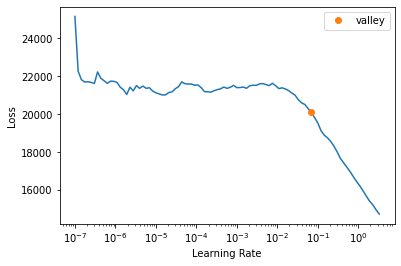

<Figure size 720x720 with 0 Axes>

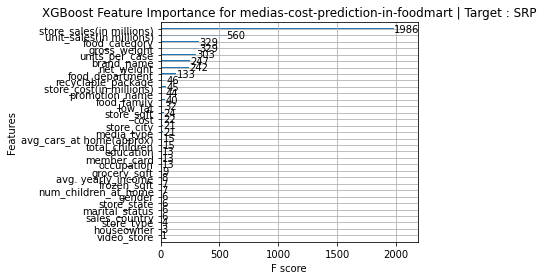

Target Variable: avg_cars_at home(approx).1
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_depart

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07355237007141113}


 10%|▉         | 4/42 [00:00<00:04,  7.71it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.28139805793762207}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999999505126518, 'Adjusted R-Squared': 0.9999999500126533, 'RMSE': 0.00024411314912155618, 'Time taken': 0.0773613452911377}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11349296569824219}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005138519570724309, 'Adjusted R-Squared': -0.010622605197355917, 'RMSE': 1.0976291566940994, 'Time taken': 0.03606128692626953}
{'Model': 'ElasticNet', 'R-Squared': 0.597549776408933, 'Adjusted R-Squared': 0.5934835958220064, 'RMSE': 0.6961457, 'Time taken': 0.03663897514343262}


 19%|█▉        | 8/42 [00:01<00:04,  7.22it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999955837451452, 'Adjusted R-Squared': 0.9999955391252426, 'RMSE': 0.002306063, 'Time taken': 0.407336950302124}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10288262367248535}


 24%|██▍       | 10/42 [00:02<00:11,  2.75it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.4742870330810547}
{'Model': 'GammaRegressor', 'R-Squared': 0.7650876864776955, 'Adjusted R-Squared': 0.7627142354696399, 'RMSE': 0.5318595636880725, 'Time taken': 0.10799145698547363}


 29%|██▊       | 12/42 [01:49<10:18, 20.62s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -8.122377375674496, 'Adjusted R-Squared': -8.214545876565372, 'RMSE': 3.3143479429358855, 'Time taken': 107.08304405212402}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7653011388394584, 'Adjusted R-Squared': 0.7629298444604684, 'RMSE': 0.531617872482247, 'Time taken': 0.16408157348632812}


 31%|███       | 13/42 [01:54<07:45, 16.06s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992941295, 'Adjusted R-Squared': 0.9999999992869977, 'RMSE': 2.9154565861755204e-05, 'Time taken': 4.295351266860962}


 33%|███▎      | 14/42 [01:54<05:26, 11.67s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999794455074, 'Adjusted R-Squared': 0.9999999792378339, 'RMSE': 0.0001573248990150292, 'Time taken': 0.6809329986572266}


 36%|███▌      | 15/42 [01:57<04:00,  8.91s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999999993716336, 'Adjusted R-Squared': 0.9999999993652849, 'RMSE': 2.750746273167597e-05, 'Time taken': 2.135664463043213}


 38%|███▊      | 16/42 [02:03<03:29,  8.04s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7222404459167344, 'Adjusted R-Squared': 0.7194340851783332, 'RMSE': 0.5783338136405306, 'Time taken': 5.963037490844727}


 43%|████▎     | 18/42 [02:28<03:42,  9.25s/it]

{'Model': 'KernelRidge', 'R-Squared': -7.515605748944772, 'Adjusted R-Squared': -7.601643695385233, 'RMSE': 3.2022252, 'Time taken': 25.144914150238037}
{'Model': 'Lars', 'R-Squared': 0.9999999999999438, 'Adjusted R-Squared': 0.9999999999999433, 'RMSE': 2.6019118336922887e-07, 'Time taken': 0.14392709732055664}


 48%|████▊     | 20/42 [02:28<01:42,  4.66s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999999999999438, 'Adjusted R-Squared': 0.9999999999999433, 'RMSE': 2.6019118336922887e-07, 'Time taken': 0.27161073684692383}
{'Model': 'Lasso', 'R-Squared': 0.18474940297863984, 'Adjusted R-Squared': 0.17651246842929558, 'RMSE': 0.9908083, 'Time taken': 0.116912841796875}


 50%|█████     | 21/42 [02:29<01:12,  3.47s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999989999533552, 'Adjusted R-Squared': 0.9999989898493223, 'RMSE': 0.0010973728, 'Time taken': 0.669663667678833}
{'Model': 'LassoLars', 'R-Squared': -0.0005138507750492849, 'Adjusted R-Squared': -0.010622604003390101, 'RMSE': 1.097629156045721, 'Time taken': 0.07993817329406738}


 60%|█████▉    | 25/42 [02:29<00:20,  1.18s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999999999999438, 'Adjusted R-Squared': 0.9999999999999433, 'RMSE': 2.6019118336922887e-07, 'Time taken': 0.12919020652770996}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999999999999438, 'Adjusted R-Squared': 0.9999999999999433, 'RMSE': 2.6019118336922887e-07, 'Time taken': 0.0678555965423584}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999995519, 'Adjusted R-Squared': 0.9999999999995474, 'RMSE': 7.3457977e-07, 'Time taken': 0.06949043273925781}


 62%|██████▏   | 26/42 [02:29<00:15,  1.05it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999999359, 'Adjusted R-Squared': 0.9999999999999353, 'RMSE': 2.7781738362587854e-07, 'Time taken': 0.15105175971984863}


 64%|██████▍   | 27/42 [02:37<00:38,  2.55s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9968408932918942, 'Adjusted R-Squared': 0.9968089750629666, 'RMSE': 0.061677424425850516, 'Time taken': 7.573643207550049}


 67%|██████▋   | 28/42 [16:54<51:27, 220.54s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9980440332087983, 'Adjusted R-Squared': 0.9980242709780208, 'RMSE': 0.04853162357605714, 'Time taken': 856.8066785335541}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999999999995492, 'Adjusted R-Squared': 0.9999999999995447, 'RMSE': 7.367414595584606e-07, 'Time taken': 0.06272411346435547}


 74%|███████▍  | 31/42 [16:54<17:59, 98.10s/it] 

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999999999995492, 'Adjusted R-Squared': 0.9999999999995447, 'RMSE': 7.367414595584606e-07, 'Time taken': 0.216217041015625}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9990732388176505, 'Adjusted R-Squared': 0.9990638752290438, 'RMSE': 0.03340627096386254, 'Time taken': 0.11785221099853516}


 79%|███████▊  | 33/42 [16:55<08:10, 54.47s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9231145986547196, 'Adjusted R-Squared': 0.9223377822733578, 'RMSE': 0.30427482745594925, 'Time taken': 0.15624666213989258}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999999999994518, 'Adjusted R-Squared': 0.9999999999994462, 'RMSE': 8.1253614e-07, 'Time taken': 0.1070868968963623}


 81%|████████  | 34/42 [16:57<05:23, 40.38s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.732435941696167}
{'Model': 'Ridge', 'R-Squared': 0.9999999947001414, 'Adjusted R-Squared': 0.999999994646594, 'RMSE': 7.9887024e-05, 'Time taken': 0.05642247200012207}


 88%|████████▊ | 37/42 [16:58<01:26, 17.38s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9999999999444089, 'Adjusted R-Squared': 0.9999999999438473, 'RMSE': 8.181760435516724e-06, 'Time taken': 0.2002241611480713}
{'Model': 'SGDRegressor', 'R-Squared': 0.999998830199887, 'Adjusted R-Squared': 0.9999988183807396, 'RMSE': 0.0011868611426211853, 'Time taken': 0.13564515113830566}


 90%|█████████ | 38/42 [17:05<00:59, 14.80s/it]

{'Model': 'SVR', 'R-Squared': 0.9938741990983571, 'Adjusted R-Squared': 0.9938123066921772, 'RMSE': 0.08588662176108888, 'Time taken': 7.203620910644531}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999995519, 'Adjusted R-Squared': 0.9999999999995474, 'RMSE': 7.3457977e-07, 'Time taken': 0.05120205879211426}


 95%|█████████▌| 40/42 [17:05<00:17,  8.62s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7653011388394584, 'Adjusted R-Squared': 0.7629298444604684, 'RMSE': 0.531617872482247, 'Time taken': 0.17409896850585938}


 98%|█████████▊| 41/42 [17:07<00:06,  6.97s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999147675, 'Adjusted R-Squared': 0.9999999999139063, 'RMSE': 1.0130868e-05, 'Time taken': 1.4412493705749512}


100%|██████████| 42/42 [17:07<00:00, 24.47s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992941295, 'Adjusted R-Squared': 0.9999999992869977, 'RMSE': 2.915456607030212e-05, 'Time taken': 0.5377311706542969}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: avg_cars_at home(approx).1
avg_cars_at home(approx).1
Target Standard Deviation: 1.1078115744001775
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
BaggingRegressor                             1.00       1.00  0.00        0.28
DecisionTreeRegressor                        1.00       1.00  0.00        0.11
RandomForestRegressor                        1.00       1.00  0.00        2.73
ExtraTreeRegressor                           1.00       1.00  0.00        0.10
ExtraTreesRegressor                          1.00       1.00  0.00        1.47
Lars          

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.533629,1.191528,1.091571,00:13
1,0.430341,0.210879,0.459216,00:12
2,0.109335,0.116982,0.342027,00:13
3,0.075651,0.034057,0.184546,00:13
4,0.050488,0.057178,0.239120,00:13


Better model found at epoch 0 with _rmse value: 1.0915710926055908.
Better model found at epoch 1 with _rmse value: 0.4592161774635315.
Better model found at epoch 2 with _rmse value: 0.34202685952186584.
Better model found at epoch 3 with _rmse value: 0.1845458745956421.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.00
1       3       3.00
2       4       4.00
3       3       3.00
4       3       3.00
XGBoost RMSE:  1.0130868e-05


<Figure size 432x288 with 0 Axes>

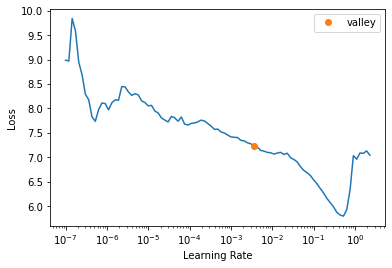

<Figure size 720x720 with 0 Axes>

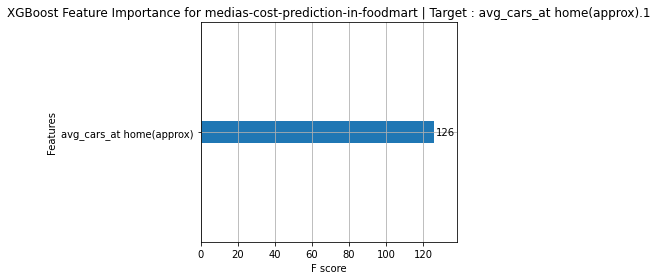

Target Variable: num_children_at_home
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department',

  2%|▏         | 1/42 [00:00<00:38,  1.06it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6953609422815565, 'Adjusted R-Squared': 0.6922830028249418, 'RMSE': 0.707968626588521, 'Time taken': 0.9435617923736572}


  7%|▋         | 3/42 [00:01<00:20,  1.95it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9044362963533896, 'Adjusted R-Squared': 0.9034707625959093, 'RMSE': 0.39652238272258983, 'Time taken': 0.7830679416656494}
{'Model': 'BayesianRidge', 'R-Squared': 0.5592343561724019, 'Adjusted R-Squared': 0.5547810533805091, 'RMSE': 0.851579284967205, 'Time taken': 0.11079692840576172}


 10%|▉         | 4/42 [00:02<00:15,  2.50it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8553446449920927, 'Adjusted R-Squared': 0.8538831107156805, 'RMSE': 0.4878524367060187, 'Time taken': 0.21930766105651855}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002461667185640337, 'Adjusted R-Squared': -0.010352215384576313, 'RMSE': 1.2828464261652681, 'Time taken': 0.02752399444580078}
{'Model': 'ElasticNet', 'R-Squared': 0.198079427672037, 'Adjusted R-Squared': 0.18997717384705137, 'RMSE': 1.1486478, 'Time taken': 0.037156105041503906}


 17%|█▋        | 7/42 [00:02<00:09,  3.61it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5593483668892381, 'Adjusted R-Squared': 0.5548962160116351, 'RMSE': 0.8514691, 'Time taken': 0.5457000732421875}


 19%|█▉        | 8/42 [00:02<00:09,  3.64it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.910957943240931, 'Adjusted R-Squared': 0.9100583013438958, 'RMSE': 0.38275318418009274, 'Time taken': 0.26551127433776855}


 24%|██▍       | 10/42 [00:06<00:28,  1.12it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9643465728058037, 'Adjusted R-Squared': 0.9639863462112678, 'RMSE': 0.24219873038478132, 'Time taken': 3.8871734142303467}
{'Model': 'GammaRegressor', 'R-Squared': 0.43013082212822673, 'Adjusted R-Squared': 0.4243731138395501, 'RMSE': 0.9682974873683327, 'Time taken': 0.11188650131225586}


 29%|██▊       | 12/42 [01:53<10:40, 21.36s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.9051152678379286, 'Adjusted R-Squared': -1.9344672786268946, 'RMSE': 2.186265518515846, 'Time taken': 106.44622945785522}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4386352465161648, 'Adjusted R-Squared': 0.43296346320236, 'RMSE': 0.961045149914468, 'Time taken': 0.1745607852935791}


 31%|███       | 13/42 [01:58<08:00, 16.58s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7900348878780141, 'Adjusted R-Squared': 0.787913492453695, 'RMSE': 0.5877529125409441, 'Time taken': 4.602316856384277}


 33%|███▎      | 14/42 [01:59<05:36, 12.03s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8626133379633383, 'Adjusted R-Squared': 0.8612252433734251, 'RMSE': 0.4754375801255436, 'Time taken': 0.8876028060913086}


 36%|███▌      | 15/42 [02:00<03:59,  8.87s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5109013797456112, 'Adjusted R-Squared': 0.5059597417536498, 'RMSE': 0.8970557610035619, 'Time taken': 1.2287919521331787}


 38%|███▊      | 16/42 [02:06<03:33,  8.22s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5412966536787076, 'Adjusted R-Squared': 0.5366621162064036, 'RMSE': 0.8687347120957007, 'Time taken': 6.657570123672485}


 43%|████▎     | 18/42 [02:32<03:44,  9.36s/it]

{'Model': 'KernelRidge', 'R-Squared': -1.4548357678532526, 'Adjusted R-Squared': -1.4796383520194887, 'RMSE': 2.0097055, 'Time taken': 25.17110800743103}
{'Model': 'Lars', 'R-Squared': 0.5523100855195144, 'Adjusted R-Squared': 0.5477868229331999, 'RMSE': 0.8582422218785198, 'Time taken': 0.19467735290527344}


 48%|████▊     | 20/42 [02:32<01:44,  4.75s/it]

{'Model': 'LarsCV', 'R-Squared': 0.5597390405612942, 'Adjusted R-Squared': 0.5552908368791654, 'RMSE': 0.8510916087229378, 'Time taken': 0.536923885345459}
{'Model': 'Lasso', 'R-Squared': -0.00024610886332165904, 'Adjusted R-Squared': -0.010352156944789748, 'RMSE': 1.2828463, 'Time taken': 0.10509228706359863}


 52%|█████▏    | 22/42 [02:33<00:49,  2.48s/it]

{'Model': 'LassoCV', 'R-Squared': 0.5593210861902101, 'Adjusted R-Squared': 0.5548686596803867, 'RMSE': 0.8514955, 'Time taken': 0.5119569301605225}
{'Model': 'LassoLars', 'R-Squared': -0.00024616716184278076, 'Adjusted R-Squared': -0.0103522158323337, 'RMSE': 1.2828464264495274, 'Time taken': 0.10997843742370605}


 60%|█████▉    | 25/42 [02:34<00:17,  1.02s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5581956745603622, 'Adjusted R-Squared': 0.5537318773849176, 'RMSE': 0.8525820846052369, 'Time taken': 0.2536177635192871}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5597377261849579, 'Adjusted R-Squared': 0.5552895092229468, 'RMSE': 0.8510928791669911, 'Time taken': 0.09376072883605957}
{'Model': 'LinearRegression', 'R-Squared': 0.5592063024998927, 'Adjusted R-Squared': 0.5547527162659942, 'RMSE': 0.85160637, 'Time taken': 0.09019851684570312}


 62%|██████▏   | 26/42 [02:34<00:15,  1.04it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.28614404390724424, 'Adjusted R-Squared': 0.27893155634884315, 'RMSE': 1.0837435219570417, 'Time taken': 0.7590577602386475}


 64%|██████▍   | 27/42 [03:08<02:21,  9.43s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8220524935957524, 'Adjusted R-Squared': 0.8202545900200591, 'RMSE': 0.5410870925185015, 'Time taken': 33.346436977386475}


 67%|██████▋   | 28/42 [04:02<05:01, 21.52s/it]

{'Model': 'NuSVR', 'R-Squared': 0.7468639313220948, 'Adjusted R-Squared': 0.7443063554829648, 'RMSE': 0.645354341903784, 'Time taken': 53.90967798233032}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.557966483681106, 'Adjusted R-Squared': 0.5535003708615163, 'RMSE': 0.8528031991246389, 'Time taken': 0.06353306770324707}


 74%|███████▍  | 31/42 [04:02<01:42,  9.32s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5590258193478348, 'Adjusted R-Squared': 0.5545704095913088, 'RMSE': 0.8517807124631988, 'Time taken': 0.25899648666381836}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.24610274987979142, 'Adjusted R-Squared': 0.23848570264442692, 'RMSE': 1.1137232867870277, 'Time taken': 0.1508028507232666}


 76%|███████▌  | 32/42 [04:02<01:09,  6.99s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.553132674605799, 'Adjusted R-Squared': 0.5486177230989113, 'RMSE': 0.857453388744028, 'Time taken': 0.13218283653259277}


 79%|███████▊  | 33/42 [04:03<00:47,  5.24s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [04:11<00:20,  3.40s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.913847889803921, 'Adjusted R-Squared': 0.9129774466597322, 'RMSE': 0.3764906373337855, 'Time taken': 8.063673734664917}
{'Model': 'Ridge', 'R-Squared': 0.5592066403765048, 'Adjusted R-Squared': 0.5547530575563635, 'RMSE': 0.8516061, 'Time taken': 0.0359339714050293}
{'Model': 'RidgeCV', 'R-Squared': 0.5592158208701581, 'Adjusted R-Squared': 0.554762330805699, 'RMSE': 0.851597190302743, 'Time taken': 0.1078341007232666}


 88%|████████▊ | 37/42 [04:11<00:13,  2.62s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.5570233082218417, 'Adjusted R-Squared': 0.5525476659709889, 'RMSE': 0.8537125356521613, 'Time taken': 0.14006710052490234}


 90%|█████████ | 38/42 [04:41<00:38,  9.68s/it]

{'Model': 'SVR', 'R-Squared': 0.7469455783301042, 'Adjusted R-Squared': 0.7443888274165413, 'RMSE': 0.6452502565775248, 'Time taken': 30.348644495010376}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5592063024998927, 'Adjusted R-Squared': 0.5547527162659942, 'RMSE': 0.85160637, 'Time taken': 0.06676220893859863}


 95%|█████████▌| 40/42 [04:42<00:11,  5.66s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.4386352465161648, 'Adjusted R-Squared': 0.43296346320236, 'RMSE': 0.961045149914468, 'Time taken': 0.1834402084350586}


 98%|█████████▊| 41/42 [04:45<00:05,  5.17s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.8643968190845301, 'Adjusted R-Squared': 0.8630267440058187, 'RMSE': 0.47234154, 'Time taken': 3.5684432983398438}


100%|██████████| 42/42 [04:46<00:00,  6.82s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8673785110511826, 'Adjusted R-Squared': 0.8660385616806464, 'RMSE': 0.46711968623015315, 'Time taken': 0.608142614364624}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: num_children_at_home
num_children_at_home
Target Standard Deviation: 1.3125349459633449
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.96       0.96  0.24        3.89
RandomForestRegressor                        0.91       0.91  0.38        8.06
ExtraTreeRegressor                           0.91       0.91  0.38        0.27
BaggingRegressor                             0.90       0.90  0.40        0.78
LGBMRegressor                                0.87       0.87  0.47        0.61
XGBRegressor                                 0.86       0.86  0.47        3.57
HistGradientBoostingRegressor

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.822585,1.535316,1.239079,00:12
1,0.447835,0.293233,0.541510,00:13
2,0.209443,0.094422,0.307282,00:13
3,0.110166,0.413154,0.642771,00:13


Better model found at epoch 0 with _rmse value: 1.2390787601470947.
Better model found at epoch 1 with _rmse value: 0.5415099263191223.
Better model found at epoch 2 with _rmse value: 0.307282418012619.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       4.22
1       2       1.61
2       1       0.91
3       1       0.97
4       4       3.96
XGBoost RMSE:  0.47235325


<Figure size 432x288 with 0 Axes>

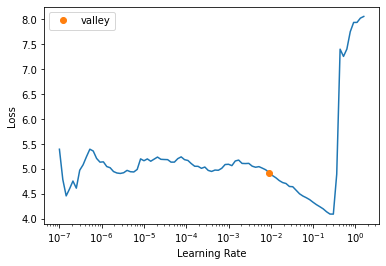

<Figure size 720x720 with 0 Axes>

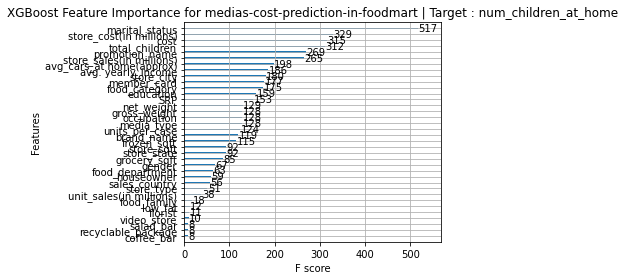

Target Variable: avg_cars_at home(approx)
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_departme

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07424640655517578}


 10%|▉         | 4/42 [00:00<00:04,  7.62it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2863800525665283}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999999825571775, 'Adjusted R-Squared': 0.9999999823809429, 'RMSE': 0.00014568455788869578, 'Time taken': 0.07823348045349121}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11432266235351562}
{'Model': 'DummyRegressor', 'R-Squared': -0.00042069456144355755, 'Adjusted R-Squared': -0.01052850658025073, 'RMSE': 1.1033072512337623, 'Time taken': 0.03539156913757324}
{'Model': 'ElasticNet', 'R-Squared': 0.5970998916335111, 'Adjusted R-Squared': 0.5930291656080856, 'RMSE': 0.7001705, 'Time taken': 0.03783106803894043}


 19%|█▉        | 8/42 [00:01<00:04,  6.99it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999955666220449, 'Adjusted R-Squared': 0.9999955218291381, 'RMSE': 0.0023225897, 'Time taken': 0.4187302589416504}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11477279663085938}


 21%|██▏       | 9/42 [00:02<00:15,  2.19it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.5034213066101074}
{'Model': 'GammaRegressor', 'R-Squared': 0.7649016149465956, 'Adjusted R-Squared': 0.7625262839533811, 'RMSE': 0.5348474899196556, 'Time taken': 0.09772849082946777}


 29%|██▊       | 12/42 [01:49<08:22, 16.76s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -8.224716222556358, 'Adjusted R-Squared': -8.3179187102811, 'RMSE': 3.3502841792452487, 'Time taken': 106.61065244674683}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7670781013702257, 'Adjusted R-Squared': 0.7647247606414581, 'RMSE': 0.532365986146038, 'Time taken': 0.1728661060333252}


 31%|███       | 13/42 [01:53<06:39, 13.79s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992941953, 'Adjusted R-Squared': 0.9999999992870641, 'RMSE': 2.9305383995580553e-05, 'Time taken': 4.386267185211182}


 33%|███▎      | 14/42 [01:54<04:55, 10.54s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999794452431, 'Adjusted R-Squared': 0.9999999792375669, 'RMSE': 0.00015814712868646876, 'Time taken': 1.0361108779907227}


 36%|███▌      | 15/42 [01:56<03:42,  8.25s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.999999999238881, 'Adjusted R-Squared': 0.9999999992311911, 'RMSE': 3.0432063589877548e-05, 'Time taken': 1.9734504222869873}


 38%|███▊      | 16/42 [02:03<03:21,  7.76s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7182716607425366, 'Adjusted R-Squared': 0.715425201139026, 'RMSE': 0.5854912467321779, 'Time taken': 6.464741468429565}


 43%|████▎     | 18/42 [02:27<03:33,  8.91s/it]

{'Model': 'KernelRidge', 'R-Squared': -7.383447615704656, 'Adjusted R-Squared': -7.468150294317482, 'RMSE': 3.1938643, 'Time taken': 24.3790864944458}
{'Model': 'Lars', 'R-Squared': 0.9999999999999831, 'Adjusted R-Squared': 0.9999999999999829, 'RMSE': 1.431738513578107e-07, 'Time taken': 0.11208891868591309}


 48%|████▊     | 20/42 [02:28<01:39,  4.54s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999999999999831, 'Adjusted R-Squared': 0.9999999999999829, 'RMSE': 1.431738513578107e-07, 'Time taken': 0.25156188011169434}
{'Model': 'Lasso', 'R-Squared': 0.1827425447399722, 'Adjusted R-Squared': 0.17448533377498088, 'RMSE': 0.9972053, 'Time taken': 0.10721373558044434}


 52%|█████▏    | 22/42 [02:29<00:48,  2.41s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999990000447229, 'Adjusted R-Squared': 0.9999989899416132, 'RMSE': 0.0011030505, 'Time taken': 0.6194119453430176}
{'Model': 'LassoLars', 'R-Squared': -0.0004206966184558958, 'Adjusted R-Squared': -0.01052850865804622, 'RMSE': 1.1033072523680434, 'Time taken': 0.10078811645507812}


 60%|█████▉    | 25/42 [02:29<00:16,  1.03it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999999999999831, 'Adjusted R-Squared': 0.9999999999999829, 'RMSE': 1.431738513578107e-07, 'Time taken': 0.14004158973693848}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999999999999831, 'Adjusted R-Squared': 0.9999999999999829, 'RMSE': 1.431738513578107e-07, 'Time taken': 0.06639838218688965}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999997413, 'Adjusted R-Squared': 0.9999999999997387, 'RMSE': 5.6109155e-07, 'Time taken': 0.07544875144958496}


 62%|██████▏   | 26/42 [02:29<00:12,  1.30it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999999307, 'Adjusted R-Squared': 0.9999999999999301, 'RMSE': 2.9040033716292876e-07, 'Time taken': 0.15046191215515137}


 64%|██████▍   | 27/42 [02:37<00:40,  2.67s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9967871156540256, 'Adjusted R-Squared': 0.9967546540794262, 'RMSE': 0.0625248538588699, 'Time taken': 8.051842212677002}


 67%|██████▋   | 28/42 [16:36<53:37, 229.84s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9978554494843277, 'Adjusted R-Squared': 0.9978337818862911, 'RMSE': 0.05108263358233604, 'Time taken': 839.1177093982697}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999999999992217, 'Adjusted R-Squared': 0.9999999999992139, 'RMSE': 9.731534127279709e-07, 'Time taken': 0.0544741153717041}


 74%|███████▍  | 31/42 [16:37<18:05, 98.71s/it] 

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999999999992217, 'Adjusted R-Squared': 0.9999999999992139, 'RMSE': 9.731534127279709e-07, 'Time taken': 0.16913414001464844}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9977576780756017, 'Adjusted R-Squared': 0.9977350226381235, 'RMSE': 0.05223410054322503, 'Time taken': 0.14888334274291992}


 79%|███████▊  | 33/42 [16:37<08:07, 54.14s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9256137104479576, 'Adjusted R-Squared': 0.9248621439963077, 'RMSE': 0.30085108853000087, 'Time taken': 0.18038105964660645}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999999999995737, 'Adjusted R-Squared': 0.9999999999995693, 'RMSE': 7.202106e-07, 'Time taken': 0.1041402816772461}


 86%|████████▌ | 36/42 [16:40<02:14, 22.39s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.5554637908935547}
{'Model': 'Ridge', 'R-Squared': 0.9999999944088885, 'Adjusted R-Squared': 0.9999999943523984, 'RMSE': 8.2481056e-05, 'Time taken': 0.03691506385803223}
{'Model': 'RidgeCV', 'R-Squared': 0.9999999999450626, 'Adjusted R-Squared': 0.9999999999445075, 'RMSE': 8.17596567141998e-06, 'Time taken': 0.10340046882629395}


 88%|████████▊ | 37/42 [16:40<01:25, 17.06s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.99999943707624, 'Adjusted R-Squared': 0.9999994313887051, 'RMSE': 0.0008276180025302851, 'Time taken': 0.11620020866394043}


 90%|█████████ | 38/42 [16:47<00:58, 14.58s/it]

{'Model': 'SVR', 'R-Squared': 0.9935013590165881, 'Adjusted R-Squared': 0.9934356995977105, 'RMSE': 0.08892347205654451, 'Time taken': 7.334985733032227}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999997413, 'Adjusted R-Squared': 0.9999999999997387, 'RMSE': 5.6109155e-07, 'Time taken': 0.053035736083984375}


 95%|█████████▌| 40/42 [16:47<00:16,  8.49s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7670781013702257, 'Adjusted R-Squared': 0.7647247606414581, 'RMSE': 0.532365986146038, 'Time taken': 0.17311310768127441}


 98%|█████████▊| 41/42 [16:49<00:06,  6.85s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999141852, 'Adjusted R-Squared': 0.9999999999133181, 'RMSE': 1.0218482e-05, 'Time taken': 1.4226887226104736}


100%|██████████| 42/42 [16:49<00:00, 24.04s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992941953, 'Adjusted R-Squared': 0.9999999992870641, 'RMSE': 2.9305383946080446e-05, 'Time taken': 0.5311262607574463}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: avg_cars_at home(approx)
avg_cars_at home(approx)
Target Standard Deviation: 1.1063981468598907
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
BaggingRegressor                             1.00       1.00  0.00        0.29
DecisionTreeRegressor                        1.00       1.00  0.00        0.11
RandomForestRegressor                        1.00       1.00  0.00        2.56
ExtraTreeRegressor                           1.00       1.00  0.00        0.11
ExtraTreesRegressor                          1.00       1.00  0.00        1.50
LarsCV           

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.790097,1.649121,1.284181,00:13
1,0.387865,0.505185,0.710764,00:12
2,0.209001,0.515952,0.718298,00:13


Better model found at epoch 0 with _rmse value: 1.284180998802185.
Better model found at epoch 1 with _rmse value: 0.7107639908790588.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       1       1.00
2       1       1.00
3       4       4.00
4       2       2.00
XGBoost RMSE:  1.0218482e-05


<Figure size 432x288 with 0 Axes>

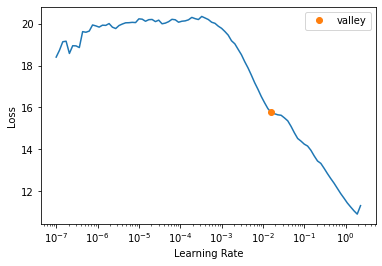

<Figure size 720x720 with 0 Axes>

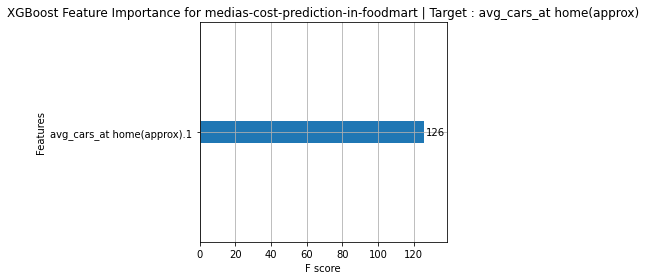

Target Variable: total_children
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_department', 'food

  2%|▏         | 1/42 [00:00<00:10,  3.94it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.2186245326183307, 'Adjusted R-Squared': 0.21072985752480544, 'RMSE': 1.315157873636692, 'Time taken': 0.25362396240234375}


  5%|▍         | 2/42 [00:02<00:45,  1.15s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.40808209672639484, 'Adjusted R-Squared': 0.4021016177845045, 'RMSE': 1.1446658901181601, 'Time taken': 1.7674496173858643}
{'Model': 'BayesianRidge', 'R-Squared': 0.2362998480833267, 'Adjusted R-Squared': 0.22858375662672992, 'RMSE': 1.3001978453605887, 'Time taken': 0.07569432258605957}


 10%|▉         | 4/42 [00:02<00:21,  1.78it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.07062483285025545, 'Adjusted R-Squared': 0.061234833687338175, 'RMSE': 1.434311681608987, 'Time taken': 0.3525252342224121}
{'Model': 'DummyRegressor', 'R-Squared': -1.6603800104375566e-05, 'Adjusted R-Squared': -0.010120333063050602, 'RMSE': 1.4878241676711164, 'Time taken': 0.027596712112426758}
{'Model': 'ElasticNet', 'R-Squared': 0.026950183859449472, 'Adjusted R-Squared': 0.01711891519422548, 'RMSE': 1.4676265, 'Time taken': 0.03915143013000488}


 17%|█▋        | 7/42 [00:03<00:14,  2.47it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.23624665895904273, 'Adjusted R-Squared': 0.22853003010285733, 'RMSE': 1.3002431, 'Time taken': 0.79085373878479}


 19%|█▉        | 8/42 [00:03<00:12,  2.77it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.43846720973769227, 'Adjusted R-Squared': 0.43279372865396104, 'RMSE': 1.1148990985734988, 'Time taken': 0.1983630657196045}


 21%|██▏       | 9/42 [00:12<01:18,  2.36s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.7083160724869713, 'Adjusted R-Squared': 0.7053690259851978, 'RMSE': 0.8035339911914119, 'Time taken': 8.901964902877808}
{'Model': 'GammaRegressor', 'R-Squared': 0.145182037551281, 'Adjusted R-Squared': 0.13654533169173355, 'RMSE': 1.3755767388950297, 'Time taken': 0.09609675407409668}


 29%|██▊       | 12/42 [01:58<08:50, 17.67s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.517773183121553, 'Adjusted R-Squared': -5.583625905355667, 'RMSE': 3.7983731298790193, 'Time taken': 105.88797163963318}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.1474571383090617, 'Adjusted R-Squared': 0.13884341906995157, 'RMSE': 1.3737449683086282, 'Time taken': 0.18748736381530762}


 31%|███       | 13/42 [02:03<07:01, 14.55s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.2774591913235629, 'Adjusted R-Squared': 0.27015895582291694, 'RMSE': 1.2646757582215382, 'Time taken': 4.727580785751343}


 33%|███▎      | 14/42 [02:04<05:14, 11.23s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.41362919252681707, 'Adjusted R-Squared': 0.40770475900852277, 'RMSE': 1.1392897074448263, 'Time taken': 1.594592809677124}


 36%|███▌      | 15/42 [02:05<03:47,  8.44s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.22416350788302297, 'Adjusted R-Squared': 0.2163247961667616, 'RMSE': 1.310488170708254, 'Time taken': 0.8169541358947754}


 38%|███▊      | 16/42 [02:11<03:22,  7.80s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.2277772155924509, 'Adjusted R-Squared': 0.2199750151942944, 'RMSE': 1.3074325986451463, 'Time taken': 6.14726185798645}


 43%|████▎     | 18/42 [02:36<03:36,  9.00s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.496763329422553, 'Adjusted R-Squared': -5.562403777307599, 'RMSE': 3.792246, 'Time taken': 24.72390341758728}
{'Model': 'Lars', 'R-Squared': 0.23207196025352483, 'Adjusted R-Squared': 0.2243131520722016, 'RMSE': 1.3037918629651595, 'Time taken': 0.12053251266479492}


 45%|████▌     | 19/42 [02:37<02:30,  6.52s/it]

{'Model': 'LarsCV', 'R-Squared': 0.23706515338966372, 'Adjusted R-Squared': 0.22935679424229993, 'RMSE': 1.2995462167614873, 'Time taken': 0.495006799697876}
{'Model': 'Lasso', 'R-Squared': -1.657461505089053e-05, 'Adjusted R-Squared': -0.010120303583124102, 'RMSE': 1.4878243, 'Time taken': 0.05102276802062988}


 50%|█████     | 21/42 [02:37<01:18,  3.72s/it]

{'Model': 'LassoCV', 'R-Squared': 0.23620934949811323, 'Adjusted R-Squared': 0.22849234368349458, 'RMSE': 1.3002748, 'Time taken': 0.6723966598510742}
{'Model': 'LassoLars', 'R-Squared': -1.6604385174145975e-05, 'Adjusted R-Squared': -0.010120333654031644, 'RMSE': 1.4878241681063495, 'Time taken': 0.07239317893981934}


 60%|█████▉    | 25/42 [02:38<00:25,  1.52s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.23560449365498704, 'Adjusted R-Squared': 0.22788137664215546, 'RMSE': 1.3007896303850284, 'Time taken': 0.2934103012084961}
{'Model': 'LassoLarsIC', 'R-Squared': 0.23573534758652426, 'Adjusted R-Squared': 0.22801355266443823, 'RMSE': 1.3006782870287454, 'Time taken': 0.09163999557495117}
{'Model': 'LinearRegression', 'R-Squared': 0.23594588546623319, 'Adjusted R-Squared': 0.22822621772656393, 'RMSE': 1.3004991, 'Time taken': 0.08756113052368164}


 62%|██████▏   | 26/42 [02:39<00:21,  1.37s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.2045523111369587, 'Adjusted R-Squared': 0.19651545648817836, 'RMSE': 1.3269477295297678, 'Time taken': 0.766516923904419}


 64%|██████▍   | 27/42 [03:11<02:05,  8.36s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.2881499972972309, 'Adjusted R-Squared': 0.28095777701228253, 'RMSE': 1.2552847391659019, 'Time taken': 32.257570028305054}


 71%|███████▏  | 30/42 [03:39<01:33,  7.75s/it]

{'Model': 'NuSVR', 'R-Squared': 0.29305222813098264, 'Adjusted R-Squared': 0.285909537836777, 'RMSE': 1.2509549458893021, 'Time taken': 27.75811219215393}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2313669056459844, 'Adjusted R-Squared': 0.22360097390206912, 'RMSE': 1.3043902481744254, 'Time taken': 0.04056882858276367}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.23238924378103887, 'Adjusted R-Squared': 0.2246336412933505, 'RMSE': 1.3035224924005695, 'Time taken': 0.1461195945739746}


 76%|███████▌  | 32/42 [03:39<00:45,  4.59s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.45726999771245413, 'Adjusted R-Squared': -0.47199361476436064, 'RMSE': 1.7960483152232638, 'Time taken': 0.13357162475585938}
{'Model': 'PoissonRegressor', 'R-Squared': 0.21023633827820853, 'Adjusted R-Squared': 0.2022569125472483, 'RMSE': 1.322198247377741, 'Time taken': 0.15817046165466309}


 79%|███████▊  | 33/42 [03:40<00:31,  3.52s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.9787220657096238, 'Adjusted R-Squared': -0.9987142058026737, 'RMSE': 2.092861, 'Time taken': 0.44442248344421387}


 81%|████████  | 34/42 [03:57<00:58,  7.29s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.4816439877592176, 'Adjusted R-Squared': 0.47640674590783316, 'RMSE': 1.071179058327785, 'Time taken': 17.473073959350586}
{'Model': 'Ridge', 'R-Squared': 0.23595881505596183, 'Adjusted R-Squared': 0.2282392779511977, 'RMSE': 1.3004881, 'Time taken': 0.06525278091430664}


 88%|████████▊ | 37/42 [03:58<00:16,  3.22s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.23605920691851456, 'Adjusted R-Squared': 0.22834068412910835, 'RMSE': 1.3004026747559723, 'Time taken': 0.18642258644104004}
{'Model': 'SGDRegressor', 'R-Squared': 0.23317485606071497, 'Adjusted R-Squared': 0.22542719105501374, 'RMSE': 1.3028552757009115, 'Time taken': 0.1862943172454834}


 95%|█████████▌| 40/42 [04:23<00:10,  5.10s/it]

{'Model': 'SVR', 'R-Squared': 0.26868947186012393, 'Adjusted R-Squared': 0.26130063095949374, 'RMSE': 1.272327506627904, 'Time taken': 24.971492290496826}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.23594588546623319, 'Adjusted R-Squared': 0.22822621772656393, 'RMSE': 1.3004991, 'Time taken': 0.04639148712158203}
{'Model': 'TweedieRegressor', 'R-Squared': 0.1474571383090617, 'Adjusted R-Squared': 0.13884341906995157, 'RMSE': 1.3737449683086282, 'Time taken': 0.09848380088806152}


 98%|█████████▊| 41/42 [04:27<00:04,  4.81s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.40485607719564765, 'Adjusted R-Squared': 0.39884300396701067, 'RMSE': 1.1477809, 'Time taken': 3.8355555534362793}


100%|██████████| 42/42 [04:27<00:00,  6.38s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.4215853220729594, 'Adjusted R-Squared': 0.4157412737988797, 'RMSE': 1.131534125170094, 'Time taken': 0.7553231716156006}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: total_children
total_children
Target Standard Deviation: 1.4910405749320674
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.71       0.71  0.80        8.90
RandomForestRegressor                        0.48       0.48  1.07       17.47
ExtraTreeRegressor                           0.43       0.44  1.11        0.20
LGBMRegressor                                0.42       0.42  1.13        0.76
HistGradientBoostingRegressor                0.41       0.41  1.14        1.59
BaggingRegressor                             0.40       0.41  1.14        1.77
XGBRegressor                              

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.159703,2.597953,1.611817,00:13
1,0.740249,0.556501,0.745990,00:12
2,0.145205,0.193106,0.439438,00:13
3,0.187783,0.483319,0.695211,00:12


Better model found at epoch 0 with _rmse value: 1.6118167638778687.
Better model found at epoch 1 with _rmse value: 0.7459895610809326.
Better model found at epoch 2 with _rmse value: 0.4394383430480957.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       3.39
1       5       5.60
2       2       2.47
3       2       2.58
4       4       4.27
XGBoost RMSE:  1.147728


<Figure size 432x288 with 0 Axes>

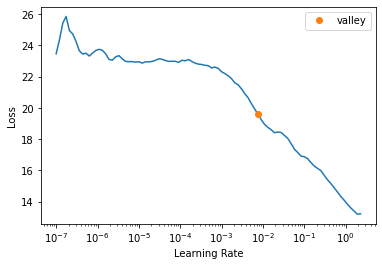

<Figure size 720x720 with 0 Axes>

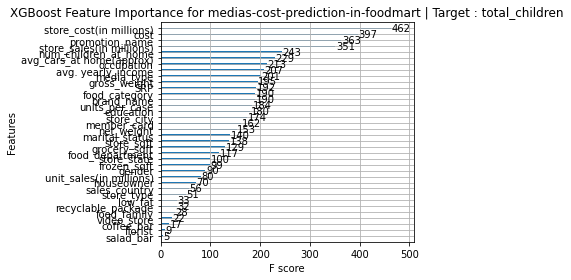

Target Variable: unit_sales(in millions)
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_departmen

  2%|▏         | 1/42 [00:02<01:45,  2.57s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7282729866542428, 'Adjusted R-Squared': 0.725527576062217, 'RMSE': 0.42857742930637377, 'Time taken': 2.572225332260132}


  5%|▍         | 2/42 [00:03<01:02,  1.56s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9111828519106736, 'Adjusted R-Squared': 0.9102854823922162, 'RMSE': 0.24502550887611682, 'Time taken': 0.8427152633666992}
{'Model': 'BayesianRidge', 'R-Squared': 0.7190114380611263, 'Adjusted R-Squared': 0.7161724528432545, 'RMSE': 0.43582005252240336, 'Time taken': 0.0895531177520752}


 10%|▉         | 4/42 [00:03<00:25,  1.49it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9090192861545938, 'Adjusted R-Squared': 0.9081000569164488, 'RMSE': 0.24799193535274489, 'Time taken': 0.19743943214416504}
{'Model': 'DummyRegressor', 'R-Squared': -0.00047599024509237253, 'Adjusted R-Squared': -0.010584360947240246, 'RMSE': 0.822368038901227, 'Time taken': 0.029207706451416016}
{'Model': 'ElasticNet', 'R-Squared': -0.0004759907789311235, 'Adjusted R-Squared': -0.010584361486472682, 'RMSE': 0.822368, 'Time taken': 0.03491401672363281}


 19%|█▉        | 8/42 [00:04<00:11,  2.97it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7211511923770658, 'Adjusted R-Squared': 0.7183338262985315, 'RMSE': 0.4341575, 'Time taken': 0.4895772933959961}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9718921371859721, 'Adjusted R-Squared': 0.9716081476652444, 'RMSE': 0.13784048752090222, 'Time taken': 0.12942838668823242}


 24%|██▍       | 10/42 [00:09<00:34,  1.07s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9461429678704013, 'Adjusted R-Squared': 0.9455988200337799, 'RMSE': 0.19080251570668558, 'Time taken': 4.7453858852386475}
{'Model': 'GammaRegressor', 'R-Squared': 0.3425528944307138, 'Adjusted R-Squared': 0.3359103371630272, 'RMSE': 0.6666429593444022, 'Time taken': 0.15281438827514648}


 29%|██▊       | 12/42 [01:58<10:43, 21.44s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -13.841365600622584, 'Adjusted R-Squared': -13.991316250793057, 'RMSE': 3.167377444204195, 'Time taken': 108.6868269443512}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.34409647194781867, 'Adjusted R-Squared': 0.33746951031051453, 'RMSE': 0.6658599155262632, 'Time taken': 0.14766430854797363}


 31%|███       | 13/42 [02:02<08:05, 16.74s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8494176245580395, 'Adjusted R-Squared': 0.8478962062661278, 'RMSE': 0.31904354320400374, 'Time taken': 4.712467908859253}


 33%|███▎      | 14/42 [02:04<05:47, 12.40s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9077996204551155, 'Adjusted R-Squared': 0.9068680682495598, 'RMSE': 0.24964866171778877, 'Time taken': 1.59627366065979}


 36%|███▌      | 15/42 [02:05<04:05,  9.09s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.711247551292702, 'Adjusted R-Squared': 0.7083301231673441, 'RMSE': 0.44180001451394546, 'Time taken': 0.9916584491729736}


 38%|███▊      | 16/42 [02:11<03:34,  8.25s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.19377773282163457, 'Adjusted R-Squared': 0.18563201655815031, 'RMSE': 0.7382276071781656, 'Time taken': 6.243922233581543}


 43%|████▎     | 18/42 [02:37<03:46,  9.43s/it]

{'Model': 'KernelRidge', 'R-Squared': -13.695503607356645, 'Adjusted R-Squared': -13.84398053190685, 'RMSE': 3.1517744, 'Time taken': 25.57617974281311}
{'Model': 'Lars', 'R-Squared': 0.7193954068871282, 'Adjusted R-Squared': 0.7165603011219059, 'RMSE': 0.4355221782610365, 'Time taken': 0.1048271656036377}


 45%|████▌     | 19/42 [02:37<02:35,  6.76s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7196404074524121, 'Adjusted R-Squared': 0.7168077770654702, 'RMSE': 0.435332005890834, 'Time taken': 0.4323766231536865}
{'Model': 'Lasso', 'R-Squared': -0.0004759907789311235, 'Adjusted R-Squared': -0.010584361486472682, 'RMSE': 0.822368, 'Time taken': 0.05872297286987305}


 52%|█████▏    | 22/42 [02:38<00:57,  2.87s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7190585834149215, 'Adjusted R-Squared': 0.7162200745330314, 'RMSE': 0.43578348, 'Time taken': 0.4876067638397217}
{'Model': 'LassoLars', 'R-Squared': -0.0004759928769970667, 'Adjusted R-Squared': -0.010584363605736558, 'RMSE': 0.8223680399829093, 'Time taken': 0.117218017578125}


 60%|█████▉    | 25/42 [02:38<00:22,  1.29s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7196406742987611, 'Adjusted R-Squared': 0.7168080466079176, 'RMSE': 0.43533179871621414, 'Time taken': 0.26079225540161133}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7230018180794373, 'Adjusted R-Squared': 0.7202031499115105, 'RMSE': 0.4327143991422074, 'Time taken': 0.088623046875}
{'Model': 'LinearRegression', 'R-Squared': 0.7189328318943984, 'Adjusted R-Squared': 0.7160930524742862, 'RMSE': 0.435881, 'Time taken': 0.09050583839416504}


 62%|██████▏   | 26/42 [02:41<00:25,  1.62s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7019063478386588, 'Adjusted R-Squared': 0.6988945402896682, 'RMSE': 0.44888929836488434, 'Time taken': 2.6978843212127686}


 64%|██████▍   | 27/42 [02:55<01:10,  4.73s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8101875169633822, 'Adjusted R-Squared': 0.8082697348665232, 'RMSE': 0.3581997456221525, 'Time taken': 14.011918067932129}


 71%|███████▏  | 30/42 [05:01<04:11, 20.97s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8167070883972838, 'Adjusted R-Squared': 0.8148551771913963, 'RMSE': 0.3519943746255075, 'Time taken': 126.009117603302}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.713878248095738, 'Adjusted R-Squared': 0.7109873993773317, 'RMSE': 0.43978288671540505, 'Time taken': 0.04972672462463379}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.713878248095738, 'Adjusted R-Squared': 0.7109873993773317, 'RMSE': 0.43978288671540505, 'Time taken': 0.14012503623962402}


 76%|███████▌  | 32/42 [05:02<02:00, 12.09s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6557821921989714, 'Adjusted R-Squared': 0.6523043664065893, 'RMSE': 0.48236918380129634, 'Time taken': 0.15290451049804688}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5537727167265504, 'Adjusted R-Squared': 0.549264231924596, 'RMSE': 0.5492131764778958, 'Time taken': 0.1803598403930664}


 79%|███████▊  | 33/42 [05:02<01:20,  8.95s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.6993503928933723, 'Adjusted R-Squared': 0.696312761096387, 'RMSE': 0.45080966, 'Time taken': 0.21460294723510742}


 86%|████████▌ | 36/42 [05:08<00:27,  4.66s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9108688944798469, 'Adjusted R-Squared': 0.909968352873177, 'RMSE': 0.24545819399645227, 'Time taken': 6.407672166824341}
{'Model': 'Ridge', 'R-Squared': 0.7190948306190456, 'Adjusted R-Squared': 0.7162566879630117, 'RMSE': 0.43575537, 'Time taken': 0.03509926795959473}
{'Model': 'RidgeCV', 'R-Squared': 0.7190950687778459, 'Adjusted R-Squared': 0.7162569285280641, 'RMSE': 0.4357551910641492, 'Time taken': 0.09900379180908203}


 88%|████████▊ | 37/42 [05:09<00:17,  3.59s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7207693183518935, 'Adjusted R-Squared': 0.7179480939856586, 'RMSE': 0.43445465625891133, 'Time taken': 0.14698100090026855}


 90%|█████████ | 38/42 [06:02<01:05, 16.32s/it]

{'Model': 'SVR', 'R-Squared': 0.8156646614344711, 'Adjusted R-Squared': 0.8138022180036499, 'RMSE': 0.35299389010411414, 'Time taken': 53.6601037979126}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7189328318943984, 'Adjusted R-Squared': 0.7160930524742862, 'RMSE': 0.435881, 'Time taken': 0.07202982902526855}


 95%|█████████▌| 40/42 [06:03<00:19,  9.51s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.34409647194781867, 'Adjusted R-Squared': 0.33746951031051453, 'RMSE': 0.6658599155262632, 'Time taken': 0.19617724418640137}


 98%|█████████▊| 41/42 [06:06<00:08,  8.12s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.8783993150336656, 'Adjusted R-Squared': 0.8771707150340058, 'RMSE': 0.2867021, 'Time taken': 3.5067837238311768}


100%|██████████| 42/42 [06:07<00:00,  8.74s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9094904883373444, 'Adjusted R-Squared': 0.9085760199194343, 'RMSE': 0.24734890876650684, 'Time taken': 0.7159340381622314}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: unit_sales(in millions)
unit_sales(in millions)
Target Standard Deviation: 0.8255106161302531
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreeRegressor                           0.97       0.97  0.14        0.13
ExtraTreesRegressor                          0.95       0.95  0.19        4.75
BaggingRegressor                             0.91       0.91  0.25        0.84
RandomForestRegressor                        0.91       0.91  0.25        6.41
LGBMRegressor                                0.91       0.91  0.25        0.72
DecisionTreeRegressor                        0.91       0.91  0.25        0.20
HistGradientBoostingRe

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.334792,1.044132,1.021828,00:12
1,0.324465,0.229223,0.478772,00:13
2,0.160409,0.339980,0.583078,00:13


Better model found at epoch 0 with _rmse value: 1.0218275785446167.
Better model found at epoch 1 with _rmse value: 0.47877204418182373.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       5       0.30
1       4       4.00
2       3       3.00
3       3       3.00
4       3       3.00
XGBoost RMSE:  0.2867019


<Figure size 432x288 with 0 Axes>

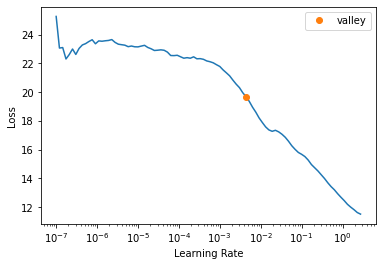

<Figure size 720x720 with 0 Axes>

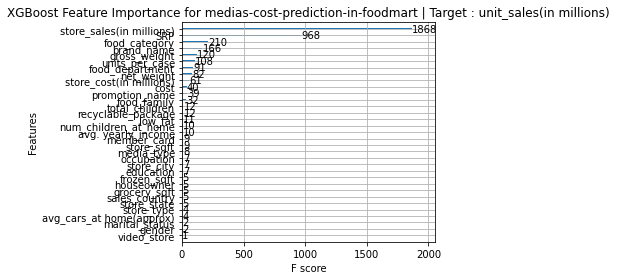

Target Variable: store_cost(in millions)
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
[]
40
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'un

  2%|▏         | 1/42 [00:01<00:52,  1.28s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8623347397956319, 'Adjusted R-Squared': 0.860943830371996, 'RMSE': 0.5379656457866117, 'Time taken': 1.281982660293579}


  5%|▍         | 2/42 [00:03<01:05,  1.63s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8401102102206883, 'Adjusted R-Squared': 0.8384947538955627, 'RMSE': 0.5797659808405357, 'Time taken': 1.8743619918823242}
{'Model': 'BayesianRidge', 'R-Squared': 0.8313551163974747, 'Adjusted R-Squared': 0.8296512024434204, 'RMSE': 0.5954275807938677, 'Time taken': 0.08755111694335938}


 10%|▉         | 4/42 [00:03<00:29,  1.31it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7577516779974655, 'Adjusted R-Squared': 0.7553041071765255, 'RMSE': 0.7136294291514933, 'Time taken': 0.41292262077331543}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002690402786698076, 'Adjusted R-Squared': -0.010375320049103465, 'RMSE': 1.4501094, 'Time taken': 0.027483463287353516}
{'Model': 'ElasticNet', 'R-Squared': 0.59309937917411, 'Adjusted R-Squared': 0.5889882337249978, 'RMSE': 0.9248824507622153, 'Time taken': 0.039275169372558594}


 17%|█▋        | 7/42 [00:04<00:17,  2.01it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8333013986126893, 'Adjusted R-Squared': 0.8316171490407033, 'RMSE': 0.5919817807590899, 'Time taken': 0.8307263851165771}


 19%|█▉        | 8/42 [00:04<00:15,  2.17it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.801348480752496, 'Adjusted R-Squared': 0.7993413929096316, 'RMSE': 0.6462317747321162, 'Time taken': 0.313718318939209}


 21%|██▏       | 9/42 [00:19<02:04,  3.76s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8684801059687758, 'Adjusted R-Squared': 0.8671512866302435, 'RMSE': 0.5258211950571663, 'Time taken': 14.549535751342773}
{'Model': 'GammaRegressor', 'R-Squared': 0.771387014132976, 'Adjusted R-Squared': 0.7690772087693283, 'RMSE': 0.6932546809891544, 'Time taken': 0.08116292953491211}


 26%|██▌       | 11/42 [02:04<12:04, 23.37s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.2299157295651435, 'Adjusted R-Squared': -3.272652943301593, 'RMSE': 2.982003990979902, 'Time taken': 105.19130992889404}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.764276577846077, 'Adjusted R-Squared': 0.7618949317520743, 'RMSE': 0.7039531091892709, 'Time taken': 0.09800291061401367}


 31%|███       | 13/42 [02:09<07:35, 15.72s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8569507950333148, 'Adjusted R-Squared': 0.855505488592631, 'RMSE': 0.5483843938499134, 'Time taken': 4.622716665267944}


 33%|███▎      | 14/42 [02:10<05:53, 12.61s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8570758638973979, 'Adjusted R-Squared': 0.8556318210976747, 'RMSE': 0.5481446133804938, 'Time taken': 0.6836421489715576}


 36%|███▌      | 15/42 [02:10<04:27,  9.91s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8203938502123249, 'Adjusted R-Squared': 0.8185791884311916, 'RMSE': 0.6144732257297313, 'Time taken': 0.7264084815979004}


 38%|███▊      | 16/42 [02:18<04:01,  9.27s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6432248956943261, 'Adjusted R-Squared': 0.6396201964843673, 'RMSE': 0.8660434, 'Time taken': 7.312027931213379}


 40%|████      | 17/42 [03:05<08:00, 19.20s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.5099572063718383, 'Adjusted R-Squared': -2.5454202748878454, 'RMSE': 2.71639719612974, 'Time taken': 47.51283526420593}
{'Model': 'Lars', 'R-Squared': 0.8302039817625112, 'Adjusted R-Squared': 0.8284884372488716, 'RMSE': 0.597456256797511, 'Time taken': 0.08158445358276367}


 45%|████▌     | 19/42 [03:06<04:15, 11.11s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8291480829949374, 'Adjusted R-Squared': 0.8274218701431559, 'RMSE': 0.5993110576593546, 'Time taken': 0.31722354888916016}
{'Model': 'Lasso', 'R-Squared': 0.3891882549907989, 'Adjusted R-Squared': 0.38301688095685904, 'RMSE': 1.1331725676847773, 'Time taken': 0.0954127311706543}


 50%|█████     | 21/42 [03:06<02:27,  7.01s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8291624874559701, 'Adjusted R-Squared': 0.8274364201405467, 'RMSE': 0.599285793281607, 'Time taken': 0.4687333106994629}
{'Model': 'LassoLars', 'R-Squared': -0.0002690397094435859, 'Adjusted R-Squared': -0.010375319474125844, 'RMSE': 1.4501094278609141, 'Time taken': 0.08395218849182129}


 60%|█████▉    | 25/42 [03:07<00:52,  3.10s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8291480829949374, 'Adjusted R-Squared': 0.8274218701431559, 'RMSE': 0.5993110576593546, 'Time taken': 0.25893139839172363}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8289730951241767, 'Adjusted R-Squared': 0.8272451142716803, 'RMSE': 0.599617888653002, 'Time taken': 0.08433842658996582}
{'Model': 'LinearRegression', 'R-Squared': 0.8303763044097888, 'Adjusted R-Squared': 0.8286625009686147, 'RMSE': 0.5971530065212362, 'Time taken': 0.07042455673217773}


 62%|██████▏   | 26/42 [03:08<00:45,  2.84s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8145228288692878, 'Adjusted R-Squared': 0.8126488488629154, 'RMSE': 0.6244355131725318, 'Time taken': 1.744126796722412}


 64%|██████▍   | 27/42 [03:37<02:04,  8.30s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8774861041458599, 'Adjusted R-Squared': 0.8762482774638277, 'RMSE': 0.507498821299997, 'Time taken': 28.14053988456726}


 67%|██████▋   | 28/42 [04:19<03:48, 16.36s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8643911635001966, 'Adjusted R-Squared': 0.863021031279941, 'RMSE': 0.5339325010589289, 'Time taken': 42.50318217277527}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8293241079524705, 'Adjusted R-Squared': 0.827599673579674, 'RMSE': 0.5990022496246307, 'Time taken': 0.04642820358276367}


 74%|███████▍  | 31/42 [04:19<01:24,  7.67s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8292017852483683, 'Adjusted R-Squared': 0.8274761149806075, 'RMSE': 0.5992168623927331, 'Time taken': 0.20147180557250977}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7543240858617783, 'Adjusted R-Squared': 0.75184188415288, 'RMSE': 0.7186602978898476, 'Time taken': 0.15589642524719238}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8559136957531512, 'Adjusted R-Squared': 0.854457910916103, 'RMSE': 0.5503686829833756, 'Time taken': 0.09447145462036133}


 79%|███████▊  | 33/42 [04:20<00:43,  4.78s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7941624931584257, 'Adjusted R-Squared': 0.7920828012479273, 'RMSE': 0.657816282685393, 'Time taken': 0.4266164302825928}


 81%|████████  | 34/42 [04:39<01:03,  7.92s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8499021804859911, 'Adjusted R-Squared': 0.8483856579347002, 'RMSE': 0.5617325037604248, 'Time taken': 19.203461408615112}
{'Model': 'Ridge', 'R-Squared': 0.830591186020317, 'Adjusted R-Squared': 0.8288795536487112, 'RMSE': 0.5967746458694942, 'Time taken': 0.05466198921203613}


 88%|████████▊ | 37/42 [04:40<00:19,  3.90s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8305911860191225, 'Adjusted R-Squared': 0.8288795536475047, 'RMSE': 0.5967746458715982, 'Time taken': 0.1739215850830078}
{'Model': 'SGDRegressor', 'R-Squared': 0.8413622823153717, 'Adjusted R-Squared': 0.8397594763776639, 'RMSE': 0.5774914906479808, 'Time taken': 0.11941885948181152}


 95%|█████████▌| 40/42 [05:18<00:14,  7.26s/it]

{'Model': 'SVR', 'R-Squared': 0.8621011882981975, 'Adjusted R-Squared': 0.8607079191726426, 'RMSE': 0.5384217864221057, 'Time taken': 38.72474789619446}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8303763044097888, 'Adjusted R-Squared': 0.8286625009686147, 'RMSE': 0.5971530065212362, 'Time taken': 0.0690770149230957}
{'Model': 'TweedieRegressor', 'R-Squared': 0.764276577846077, 'Adjusted R-Squared': 0.7618949317520743, 'RMSE': 0.7039531091892709, 'Time taken': 0.09199953079223633}


 98%|█████████▊| 41/42 [05:22<00:06,  6.40s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.8431486529411332, 'Adjusted R-Squared': 0.8415638957089142, 'RMSE': 0.5742308, 'Time taken': 3.409738302230835}


100%|██████████| 42/42 [05:23<00:00,  7.69s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8555416192974898, 'Adjusted R-Squared': 0.8540820751630871, 'RMSE': 0.5510788379115564, 'Time taken': 0.6873331069946289}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: store_cost(in millions)
store_cost(in millions)
Target Standard Deviation: 1.4417641162872314
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 0.88       0.88  0.51       28.14
ExtraTreesRegressor                          0.87       0.87  0.53       14.55
NuSVR                                        0.86       0.86  0.53       42.50
AdaBoostRegressor                            0.86       0.86  0.54        1.28
SVR                                          0.86       0.86  0.54       38.72
HistGradientBoostingRegressor                0.86       0.86  0.55        0.68
GradientBoostingRegress

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.017568,2.812247,1.676976,00:13
1,2.062438,2.039598,1.428145,00:13
2,1.786732,1.953407,1.397643,00:13
3,1.486668,1.504185,1.226452,00:13
4,1.031857,1.277755,1.130378,00:13
5,0.606139,0.894285,0.945667,00:12
6,0.563418,7.660204,2.767707,00:13


Better model found at epoch 0 with _rmse value: 1.6769757270812988.
Better model found at epoch 1 with _rmse value: 1.4281448125839233.
Better model found at epoch 2 with _rmse value: 1.3976434469223022.
Better model found at epoch 3 with _rmse value: 1.2264522314071655.
Better model found at epoch 4 with _rmse value: 1.130378246307373.
Better model found at epoch 5 with _rmse value: 0.9456666111946106.
No improvement since epoch 5: early stopping


,food_category,food_department,food_family,store_sales(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,avg. yearly_income_no_dollar,store_cost(in millions),store_cost(in millions)_pred
0,18.00,10.00,2.00,74.00,3.00,27.00,3.00,1.00,2.00,5.00,5.00,3.00,5.00,2.00,3.00,1.00,5.00,3.00,70.00,6.00,202.00,176.00,1.00,1.00,16.00,5.00,12.00,6.00,1.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00,43.00,1.00,0.73,1.26
1,18.00,10.00,2.00,323.00,4.00,30.00,2.00,1.00,1.00,5.00,5.00,2.00,2.00,2.00,4.00,2.00,4.00,4.00,39.00,58.00,158.00,147.00,2.00,1.00,2.00,1.00,7.00,10.00,13.00,12.00,13.00,13.00,2.00,2.00,2.00,2.00,2.00,7.00,118.00,2.00,1.89,2.13
2,4.00,13.00,2.00,0.00,1.00,25.00,3.00,2.00,2.00,2.00,1.00,1.00,4.00,1.00,4.00,6.00,1.00,4.00,67.00,153.00,129.00,119.00,2.00,2.00,26.00,4.00,14.00,2.00,3.00,4.00,7.00,7.00,2.00,1.00,1.00,1.00,1.00,8.00,268.00,6.00,0.82,1.98
3,12.00,2.00,2.00,441.00,2.00,27.00,3.00,1.00,1.00,3.00,3.00,1.00,2.00,1.00,4.00,2.00,3.00,4.00,3.00,236.00,225.00,188.00,2.00,2.00,25.00,5.00,12.00,6.00,1.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00,43.00,2.00,2.45,3.87
4,16.00,10.00,2.00,516.00,3.00,1.00,3.00,2.00,1.00,4.00,3.00,1.00,5.00,2.00,4.00,5.00,1.00,4.00,66.00,188.00,127.00,117.00,1.00,2.00,30.00,1.00,17.00,8.00,15.00,14.00,18.00,18.00,2.00,1.00,2.00,2.00,2.00,3.00,76.00,5.00,3.51,3.98
5,17.00,14.00,2.00,391.00,4.00,37.00,3.00,2.00,1.00,2.00,3.00,3.00,4.00,1.00,2.00,7.00,1.00,2.00,22.00,85.00,172.00,150.00,2.00,1.00,7.00,5.00,4.00,8.00,20.00,17.00,20.00,20.00,1.00,1.00,2.00,2.00,1.00,10.00,174.00,7.00,2.90,2.43
6,14.00,11.00,2.00,106.00,4.00,44.00,2.00,2.00,2.00,5.00,1.00,4.00,4.00,1.00,4.00,6.00,1.00,4.00,23.00,3.00,198.00,172.00,2.00,1.00,33.00,3.00,10.00,3.00,18.00,16.00,19.00,19.00,1.00,1.00,1.00,1.00,1.00,5.00,150.00,6.00,0.81,1.99
7,12.00,2.00,2.00,109.00,4.00,46.00,3.00,1.00,1.00,2.00,3.00,1.00,5.00,2.00,4.00,5.00,1.00,4.00,65.00,4.00,122.00,113.00,1.00,2.00,22.00,5.00,15.00,8.00,2.00,1.00,8.00,8.00,2.00,1.00,1.00,1.00,1.00,1.00,56.00,5.00,0.89,2.18
8,18.00,10.00,2.00,294.00,2.00,48.00,3.00,2.00,2.00,3.00,5.00,3.00,3.00,1.00,3.00,1.00,1.00,3.00,39.00,145.00,21.00,22.00,2.00,1.00,29.00,5.00,15.00,8.00,2.00,1.00,8.00,8.00,2.00,1.00,1.00,1.00,1.00,4.00,74.00,1.00,2.35,2.26


<Figure size 432x288 with 0 Axes>

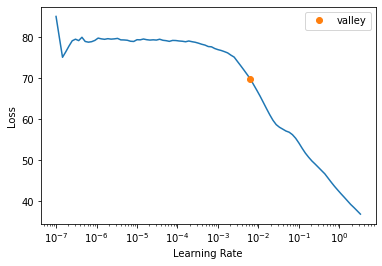

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    1.20       1.19
1    1.62       2.10
2    2.66       2.54
3    3.51       3.97
4    2.67       2.96
XGBoost RMSE:  0.57433933


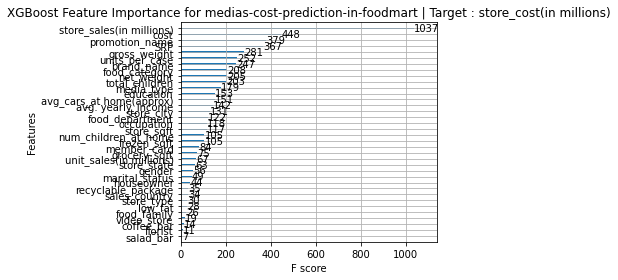

Target Variable: store_sales(in millions)
CATS=====================
['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost', 'avg. yearly_income_no_dollar']
CONTS=====================
['store_cost(in millions)']
41
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['store_cost(in millions)']
Categorical variables that made the cut : ['food_category', 'food_departme

  2%|▏         | 1/42 [00:02<01:47,  2.63s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9071832551061605, 'Adjusted R-Squared': 0.9062454754153917, 'RMSE': 57.45749720491692, 'Time taken': 2.6264920234680176}


  7%|▋         | 3/42 [00:04<00:42,  1.10s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9561118726493756, 'Adjusted R-Squared': 0.9556684462553304, 'RMSE': 39.51000303720566, 'Time taken': 1.4297959804534912}
{'Model': 'BayesianRidge', 'R-Squared': 0.9231002219157343, 'Adjusted R-Squared': 0.922323260278106, 'RMSE': 52.29932468782827, 'Time taken': 0.11187338829040527}


 10%|▉         | 4/42 [00:04<00:30,  1.26it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9555766352021884, 'Adjusted R-Squared': 0.9551278010036756, 'RMSE': 39.75019496807531, 'Time taken': 0.32059168815612793}
{'Model': 'DummyRegressor', 'R-Squared': -0.0018232305165595264, 'Adjusted R-Squared': -0.011945213143652822, 'RMSE': 188.76830962420283, 'Time taken': 0.0297701358795166}
{'Model': 'ElasticNet', 'R-Squared': 0.8823059099447748, 'Adjusted R-Squared': 0.8811167804670761, 'RMSE': 64.70098, 'Time taken': 0.043215036392211914}


 17%|█▋        | 7/42 [00:05<00:14,  2.45it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9139217377147321, 'Adjusted R-Squared': 0.9130520406974523, 'RMSE': 55.3325, 'Time taken': 0.47168445587158203}


 19%|█▉        | 8/42 [00:05<00:12,  2.70it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9558459315278861, 'Adjusted R-Squared': 0.9553998181813631, 'RMSE': 39.62952813244185, 'Time taken': 0.23789501190185547}


 24%|██▍       | 10/42 [00:14<01:00,  1.90s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9558002930029549, 'Adjusted R-Squared': 0.9553537185447882, 'RMSE': 39.65000377774257, 'Time taken': 9.036747217178345}
{'Model': 'GammaRegressor', 'R-Squared': 0.7843788971328782, 'Adjusted R-Squared': 0.7822003560581915, 'RMSE': 87.57480306489364, 'Time taken': 0.15563011169433594}


 26%|██▌       | 11/42 [02:02<15:52, 30.72s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.7570616423808687, 'Adjusted R-Squared': -3.8051249072697884, 'RMSE': 411.3418788065908, 'Time taken': 107.94071292877197}


 29%|██▊       | 12/42 [02:02<11:05, 22.20s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8178575238485197, 'Adjusted R-Squared': 0.8160172361379718, 'RMSE': 80.48948636625454, 'Time taken': 0.24538540840148926}


 31%|███       | 13/42 [02:07<08:23, 17.36s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9473303281066716, 'Adjusted R-Squared': 0.9467981768372266, 'RMSE': 43.28265015017664, 'Time taken': 5.252751350402832}


 33%|███▎      | 14/42 [02:09<05:54, 12.67s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9551608151417551, 'Adjusted R-Squared': 0.9547077796796865, 'RMSE': 39.935800327051176, 'Time taken': 1.1789493560791016}


 36%|███▌      | 15/42 [02:10<04:10,  9.27s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9211250046902417, 'Adjusted R-Squared': 0.9203280863238891, 'RMSE': 52.96673600878246, 'Time taken': 1.0374164581298828}


 38%|███▊      | 16/42 [02:16<03:37,  8.35s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7044084207688744, 'Adjusted R-Squared': 0.7014218930676255, 'RMSE': 102.5367544346904, 'Time taken': 6.1522300243377686}


 43%|████▎     | 18/42 [02:42<03:49,  9.58s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.087084160493842, 'Adjusted R-Squared': -3.128378266687263, 'RMSE': 381.27676, 'Time taken': 26.00020170211792}
{'Model': 'Lars', 'R-Squared': 0.9230571976274168, 'Adjusted R-Squared': 0.9222798012912452, 'RMSE': 52.31395299130366, 'Time taken': 0.11856698989868164}


 45%|████▌     | 19/42 [02:42<02:37,  6.83s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9230750162294044, 'Adjusted R-Squared': 0.9222977999245738, 'RMSE': 52.30789514409566, 'Time taken': 0.3757174015045166}
{'Model': 'Lasso', 'R-Squared': 0.922707031867908, 'Adjusted R-Squared': 0.9219260976104482, 'RMSE': 52.432858, 'Time taken': 0.06753396987915039}


 50%|█████     | 21/42 [02:43<01:20,  3.81s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9230190628745328, 'Adjusted R-Squared': 0.92224128124154, 'RMSE': 52.326916, 'Time taken': 0.4678514003753662}
{'Model': 'LassoLars', 'R-Squared': 0.42035811446969473, 'Adjusted R-Squared': 0.41450166702811553, 'RMSE': 143.5864367272565, 'Time taken': 0.056806087493896484}


 60%|█████▉    | 25/42 [02:43<00:26,  1.54s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9230356010218731, 'Adjusted R-Squared': 0.9222579864830691, 'RMSE': 52.321294318263654, 'Time taken': 0.2606048583984375}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9227078698750948, 'Adjusted R-Squared': 0.921926944084492, 'RMSE': 52.432573705392514, 'Time taken': 0.08388400077819824}
{'Model': 'LinearRegression', 'R-Squared': 0.9230993223169681, 'Adjusted R-Squared': 0.9223223515901883, 'RMSE': 52.29963, 'Time taken': 0.0702981948852539}


 62%|██████▏   | 26/42 [02:44<00:20,  1.26s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9201987696408438, 'Adjusted R-Squared': 0.919392493001701, 'RMSE': 53.276824515732336, 'Time taken': 0.18682360649108887}


 64%|██████▍   | 27/42 [03:17<02:07,  8.53s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9475643042596722, 'Adjusted R-Squared': 0.9470345169826797, 'RMSE': 43.1864051988264, 'Time taken': 33.31811809539795}


 67%|██████▋   | 28/42 [03:41<02:53, 12.41s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8116279445584496, 'Adjusted R-Squared': 0.8097247159103915, 'RMSE': 81.85435226459533, 'Time taken': 24.397260904312134}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9225481501706794, 'Adjusted R-Squared': 0.9217656106422194, 'RMSE': 52.48672018358037, 'Time taken': 0.05147218704223633}


 74%|███████▍  | 31/42 [03:42<01:02,  5.72s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9226022246789374, 'Adjusted R-Squared': 0.9218202314955976, 'RMSE': 52.46839467458212, 'Time taken': 0.17624282836914062}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9143614315190868, 'Adjusted R-Squared': 0.9134961769752028, 'RMSE': 55.19099673534427, 'Time taken': 0.16021347045898438}


 79%|███████▊  | 33/42 [03:42<00:30,  3.37s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.830527585048936, 'Adjusted R-Squared': 0.8288153100810041, 'RMSE': 77.63955667701295, 'Time taken': 0.6957566738128662}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9228063696677662, 'Adjusted R-Squared': 0.922026439075877, 'RMSE': 52.39915, 'Time taken': 0.1550464630126953}


 86%|████████▌ | 36/42 [03:57<00:21,  3.58s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9560971078432792, 'Adjusted R-Squared': 0.9556535322721075, 'RMSE': 39.51664843898075, 'Time taken': 14.092867374420166}
{'Model': 'Ridge', 'R-Squared': 0.9231000892752913, 'Adjusted R-Squared': 0.9223231262975221, 'RMSE': 52.29937, 'Time taken': 0.04931807518005371}
{'Model': 'RidgeCV', 'R-Squared': 0.9231000516656164, 'Adjusted R-Squared': 0.9223230883078555, 'RMSE': 52.29938258111152, 'Time taken': 0.1474437713623047}


 88%|████████▊ | 37/42 [03:57<00:13,  2.78s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9227912292399634, 'Adjusted R-Squared': 0.9220111456758306, 'RMSE': 52.40429187947463, 'Time taken': 0.23088407516479492}


 95%|█████████▌| 40/42 [04:21<00:09,  4.76s/it]

{'Model': 'SVR', 'R-Squared': 0.8644119203697777, 'Adjusted R-Squared': 0.8630419978678305, 'RMSE': 69.44552935537405, 'Time taken': 23.92634630203247}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9230993223169681, 'Adjusted R-Squared': 0.9223223515901883, 'RMSE': 52.29963, 'Time taken': 0.046816110610961914}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8178575238485197, 'Adjusted R-Squared': 0.8160172361379718, 'RMSE': 80.48948636625454, 'Time taken': 0.12891316413879395}


 98%|█████████▊| 41/42 [04:25<00:04,  4.45s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9555080542977162, 'Adjusted R-Squared': 0.9550585271878169, 'RMSE': 39.780865, 'Time taken': 3.4297871589660645}


100%|██████████| 42/42 [04:25<00:00,  6.33s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9552051035710747, 'Adjusted R-Squared': 0.9547525155798756, 'RMSE': 39.91607281824596, 'Time taken': 0.777338981628418}
Project: medias-cost-prediction-in-foodmart
medias-cost-prediction-in-foodmart
Target: store_sales(in millions)
store_sales(in millions)
Target Standard Deviation: 187.69912250892676
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
BaggingRegressor                             0.96       0.96  39.51   
RandomForestRegressor                        0.96       0.96  39.52   
ExtraTreeRegressor                           0.96       0.96  39.63   
ExtraTreesRegressor                          0.96       0.96  39.65   
DecisionTreeRegressor                        0.96       0.96  39.75   
XGBRegressor                                 0.96       0.96  39.78   
LGBMRegressor                                0.95       0.96  39.92   
HistGradientBoos

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,47090.042969,42956.621094,207.259781,00:12
1,8339.168945,8828.248047,93.958755,00:13
2,3760.495605,4676.344238,68.383797,00:13
3,4030.905273,9234.403320,96.095802,00:13


Better model found at epoch 0 with _rmse value: 207.25978088378906.
Better model found at epoch 1 with _rmse value: 93.95875549316406.
Better model found at epoch 2 with _rmse value: 68.38379669189453.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      74      74.23
1     246     247.02
2     380     373.23
3     590     590.62
4     625     614.79
XGBoost RMSE:  39.776096


<Figure size 432x288 with 0 Axes>

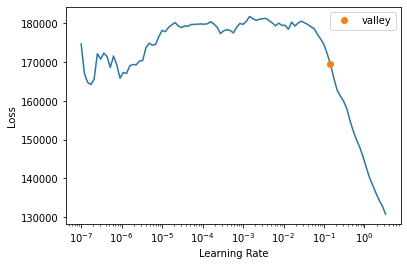

<Figure size 720x720 with 0 Axes>

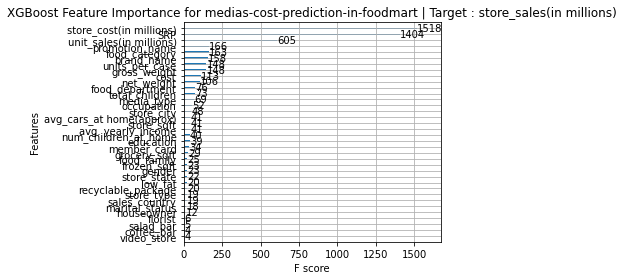

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

         feature  importance
0     store_type          35
1     store_sqft          30
2    frozen_sqft          23
3  sales_country          23
4    store_state           4


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

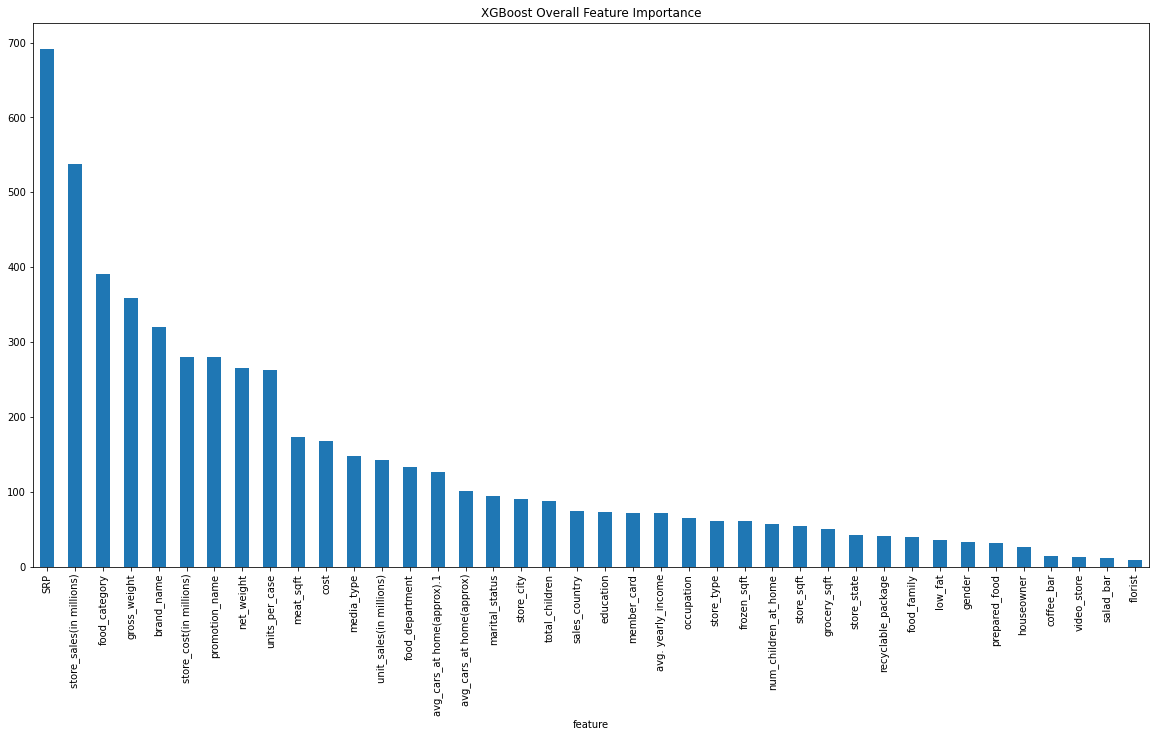

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

food_category                   0
food_department                 0
food_family                     0
store_sales(in millions)        0
store_cost(in millions)         0
unit_sales(in millions)         0
promotion_name                  0
sales_country                   0
marital_status                  0
gender                          0
total_children                  0
education                       0
member_card                     0
occupation                      0
houseowner                      0
avg_cars_at home(approx)        0
avg. yearly_income              0
num_children_at_home            0
avg_cars_at home(approx).1      0
brand_name                      0
SRP                             0
gross_weight                    0
net_weight                      0
recyclable_package              0
low_fat                         0
units_per_case                  0
store_type                      0
store_city                      0
store_state                     0
store_sqft    

# **To Be Continued...**